# # 6 seaborn两大类绘图函数figure-level和axes-level

# ## 6.1 axes-level

<class 'matplotlib.axes._axes.Axes'>


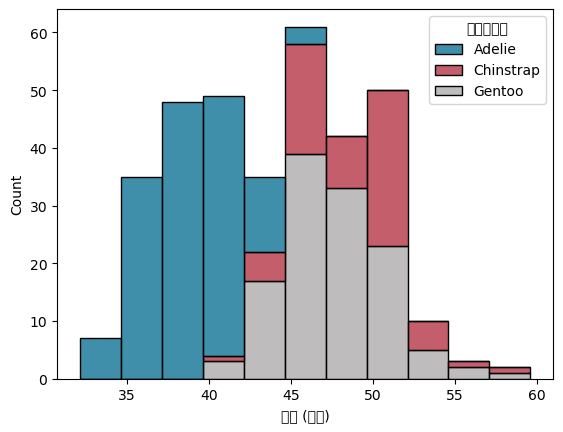

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

penguins = pd.read_csv(
    './Documents/01SeanBornDoc/sns_data/penguins.csv')  #使用pandas读取章节3.2.2 penguins数据集数据

g = sns.histplot(
    data=penguins,  #使用axes-level函数histplot
    x="喙长 (毫米)",
    hue="企鹅的种类",
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    multiple="stack")
print(type(g))

# ## 6.2 figure-level

<class 'seaborn.axisgrid.FacetGrid'>


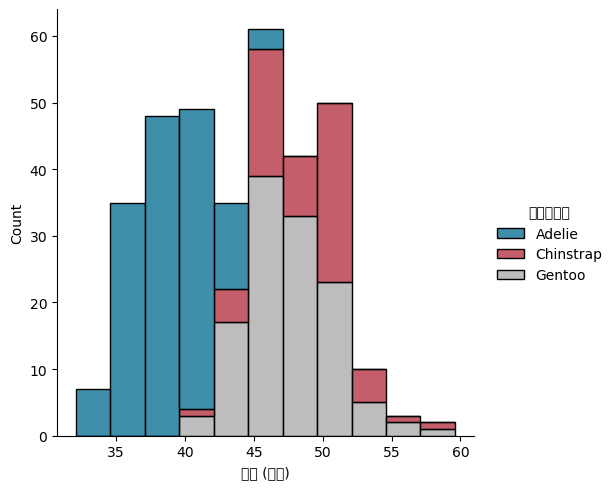

In [30]:

g = sns.displot(
    data=penguins,  ##使用figure-level函数displot
    x="喙长 (毫米)",
    hue="企鹅的种类",
    multiple="stack",
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    kind="hist")  #kind="hist"等价于axes-level函数histplot
print(type(g))

# ## 6.3 figure-level VS axes-level

# ### 6.3.1 figure-level多子图

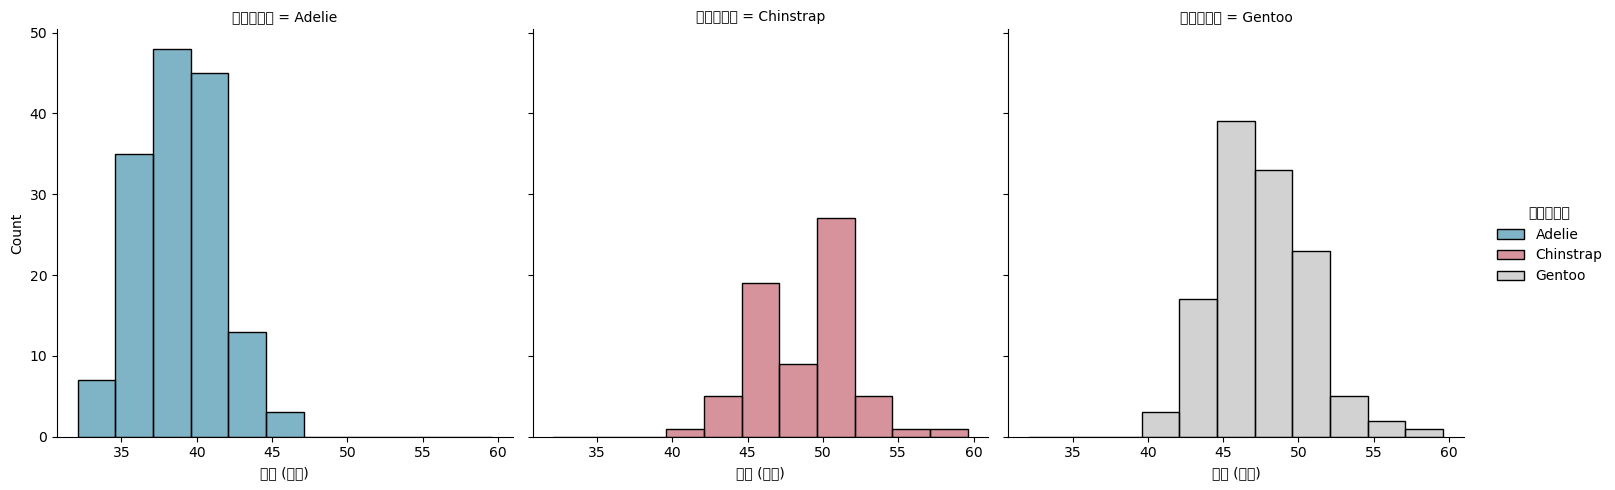

In [32]:
sns.displot(
    data=penguins,
    x="喙长 (毫米)",
    hue="企鹅的种类",  #按照"企鹅的种类"facet
    col="企鹅的种类",  #图形按照"企鹅的种类"按行绘制
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

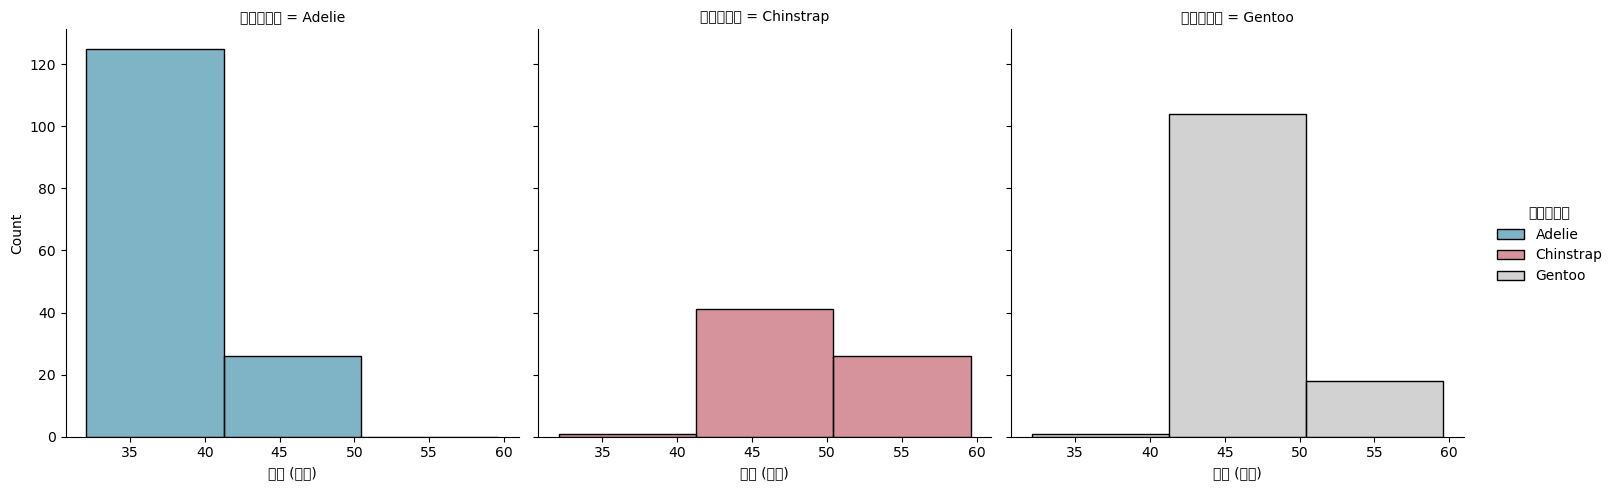

In [34]:
sns.displot(
    data=penguins,
    x="喙长 (毫米)",
    hue="企鹅的种类",
    col="企鹅的种类",
    binwidth=10,  #设置柱子的宽度
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

# ### 6.3.2 axes-level多子图个性化

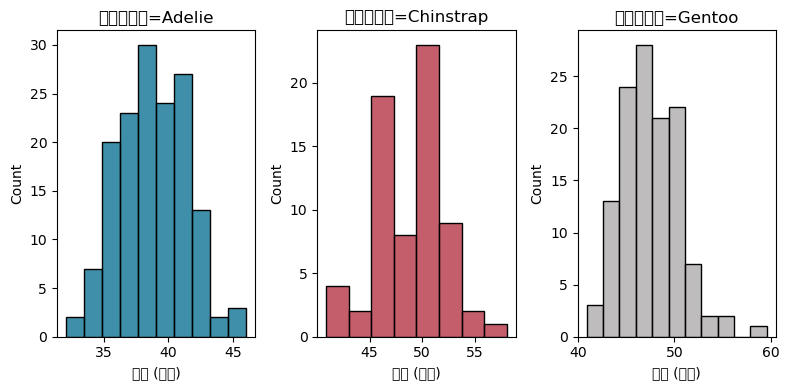

In [26]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(  #subplots添加两个子图
    1,
    3,
    figsize=(8, 4),
    gridspec_kw=dict(width_ratios=[1, 1, 1]))

colormaps = ["#006a8e", "#b1283a", "#a8a6a7"]
for i, species in enumerate(penguins['企鹅的种类'].unique()):
    data = penguins[penguins['企鹅的种类'] == species]
    sns.histplot(
        data=data,
        x='喙长 (毫米)',
        ax=axs[i],  # 参数ax激活当前子图axs[i]为需要绘图的对象
        color=colormaps[i])
    axs[i].set_title("企鹅的种类=%s" % species)

plt.tight_layout()

# ### 6.3.3 figure-level擅长全局个性化设置

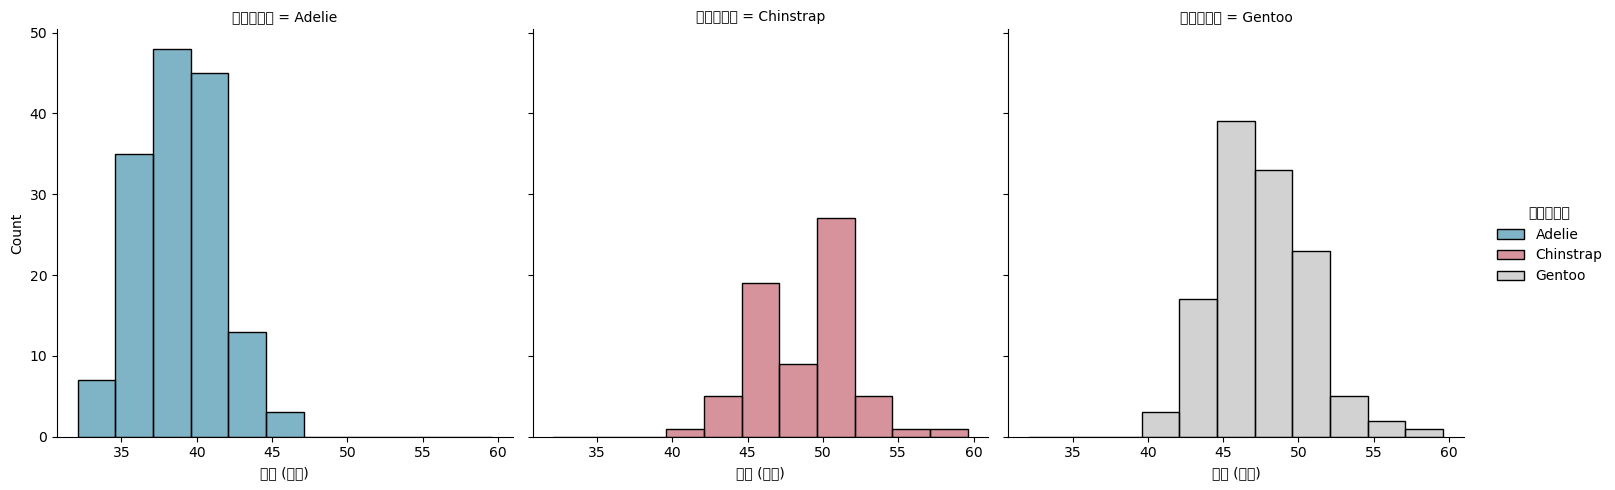

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

g = sns.displot(
    data=penguins,
    x="喙长 (毫米)",  #修改前，多个子图x坐标轴上的标签取x变量名
    hue="企鹅的种类",
    col="企鹅的种类",
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

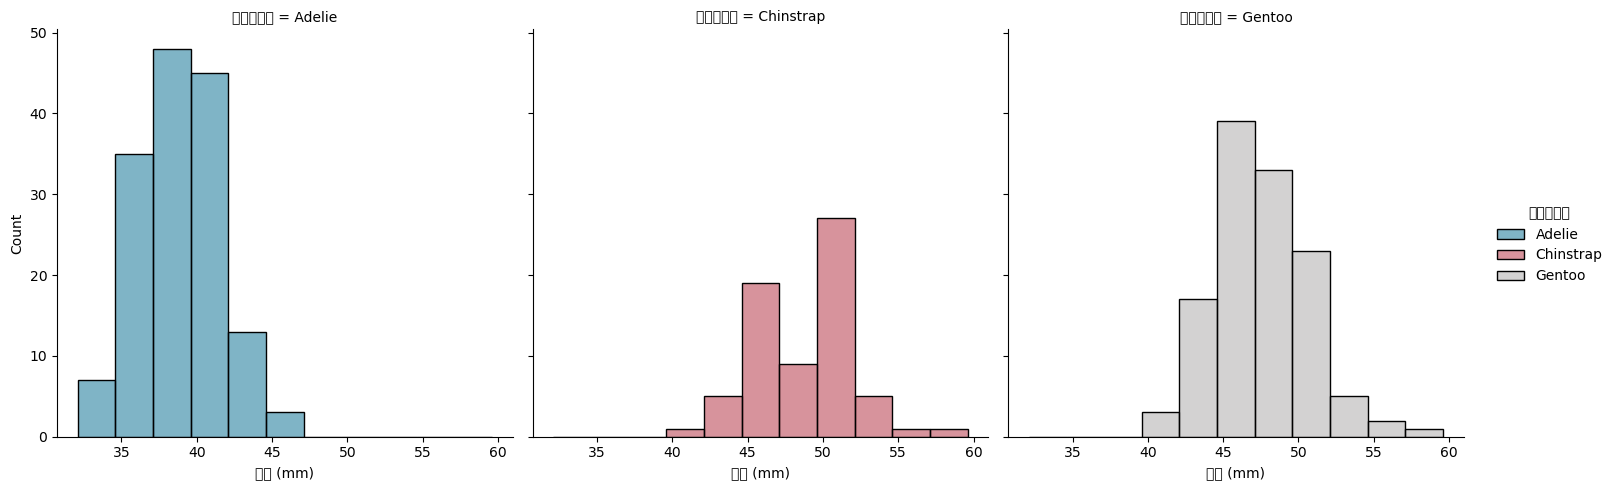

In [36]:
g = sns.displot(data=penguins,
                x="喙长 (毫米)",
                hue="企鹅的种类",
                col="企鹅的种类",
                palette=["#006a8e", "#b1283a", "#a8a6a7"])
g.set_axis_labels("喙长 (mm)")  #一行代码修改多个子图x坐标轴上的标签，


In [38]:
tips = pd.read_csv(
    './Documents/01SeanBornDoc/sns_data/tips.csv')  #使用pandas读取章节3.2.2 penguins数据集数据

消费金额 ($)  小费金额 ($)    客人性别 是否吸烟    周几    就餐时间  一起就餐人数 (个)
0       16.99      1.01  Female   No   Sun  Dinner           2
1       10.34      1.66    Male   No   Sun  Dinner           3
2       21.01      3.50    Male   No   Sun  Dinner           3
3       23.68      3.31    Male   No   Sun  Dinner           2
4       24.59      3.61  Female   No   Sun  Dinner           4
..        ...       ...     ...  ...   ...     ...         ...
239     29.03      5.92    Male   No   Sat  Dinner           3
240     27.18      2.00  Female  Yes   Sat  Dinner           2
241     22.67      2.00    Male  Yes   Sat  Dinner           2
242     17.82      1.75    Male   No   Sat  Dinner           2
243     18.78      3.00  Female   No  Thur  Dinner           2

[244 rows x 7 columns]

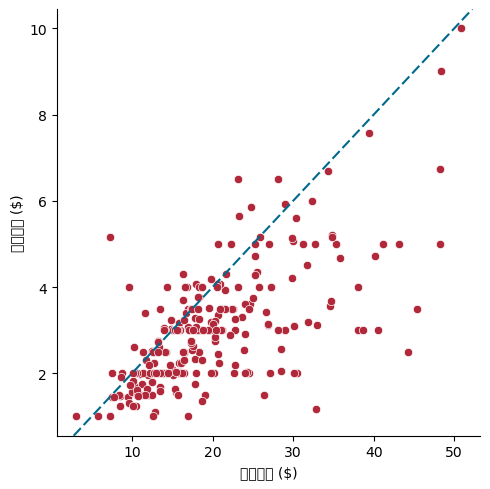

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl

g = sns.relplot(data=tips, x="消费金额 ($)", y="小费金额 ($)", color="#b1283a")

#调用axes-level方法matplotlib.lines._AxLine添加趋势线
g.ax.axline(xy1=(10, 2), slope=.2, color="#006a8e", dashes=(5, 2))


# ### 6.3.4 figure-level设置图形大小

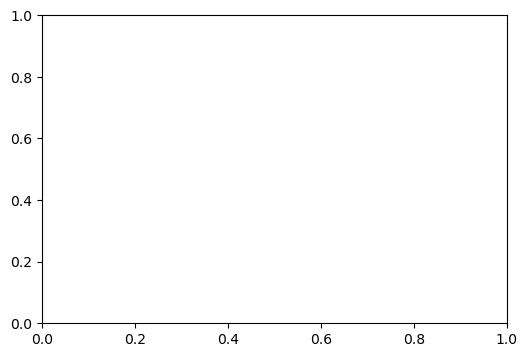

In [43]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(6, 4))  #figsize设置整个图形宽6、高4


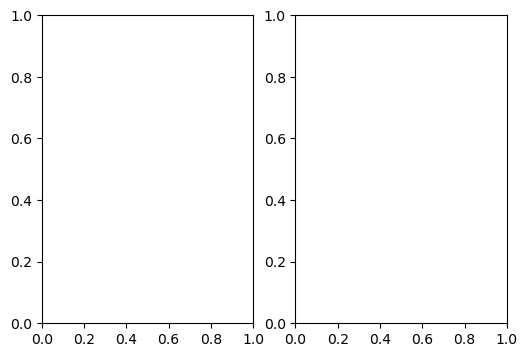

In [45]:
f, ax = plt.subplots(1, 2, figsize=(6, 4))  #两个子图均分整个图形大小


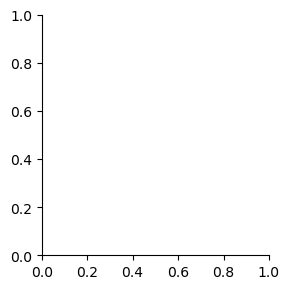

In [47]:
sns.FacetGrid(data=penguins, height=3, aspect=1)

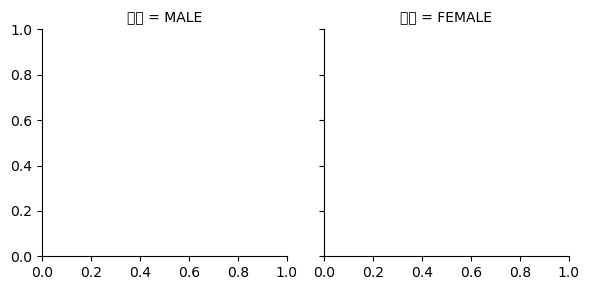

In [49]:
sns.FacetGrid(data=penguins, height=3, aspect=1, col='性别')  #设置每个子图大小


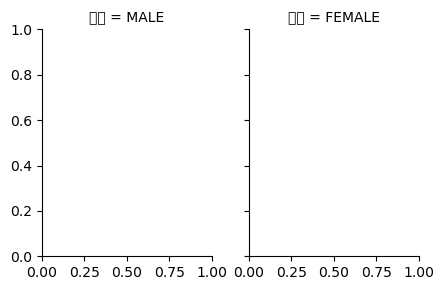

In [51]:
sns.FacetGrid(
    data=penguins,
    col='性别',
    height=3,  #通过height设置每个子图高度
    aspect=0.75)  #通过height * aspect设置每个图形宽度

# # 7 相关关系图（25种）

# ## 7.1 散点图（13种）

# ### 7.1.1 两个变量散点图

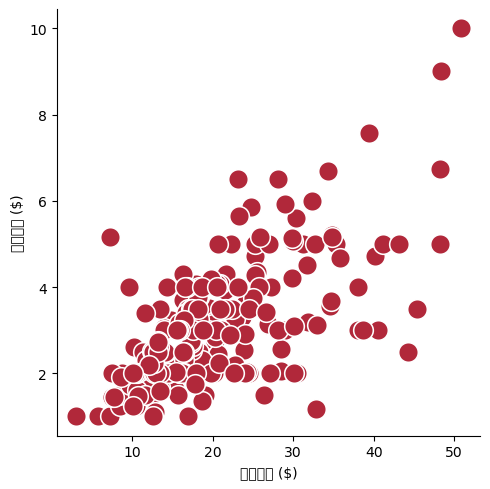

In [54]:
# 方法1
sns.relplot(
    data=tips,
    x="消费金额 ($)",  #变量1
    y="小费金额 ($)",  #变量2
    color="#b1283a",
    kind='scatter',  #通过kind参数指定具体的图表类别，默认kind='scatter'
    s=200)

<Axes: xlabel='消费金额 ($)', ylabel='小费金额 ($)'>

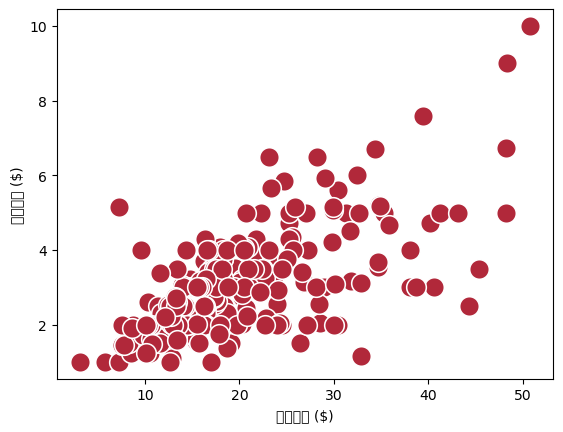

In [56]:
# 方法2
sns.scatterplot(
    data=tips,
    x="消费金额 ($)",  #变量1
    y="小费金额 ($)",  #变量2
    color="#b1283a",
    s=200)

# ### 7.1.2 三个变量散点图-点颜色变化

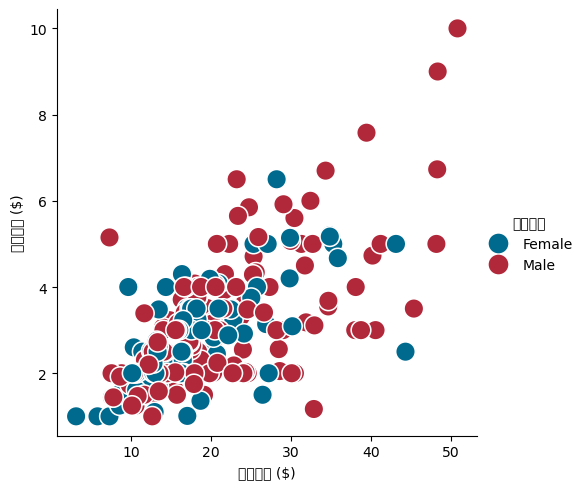

In [59]:
# 方法1
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",  #变量3
    palette=["#006a8e", "#b1283a"],
    kind='scatter',
    s=200)

<Axes: xlabel='消费金额 ($)', ylabel='小费金额 ($)'>

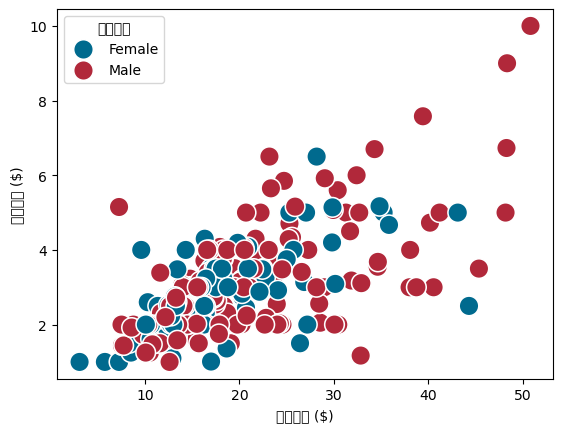

In [61]:
# 方法2
sns.scatterplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",  #变量3
    palette=["#006a8e", "#b1283a"],
    s=200)

# ### 7.1.3 三个变量散点图-点marker变化

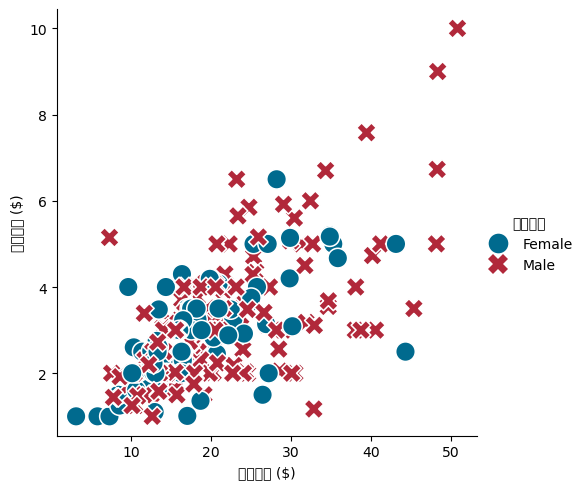

In [64]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    style="客人性别",  #设置marker样式
    palette=["#006a8e", "#b1283a"],
    kind='scatter',
    s=200)

# ### 7.1.4 三个变量散点图-点size渐变

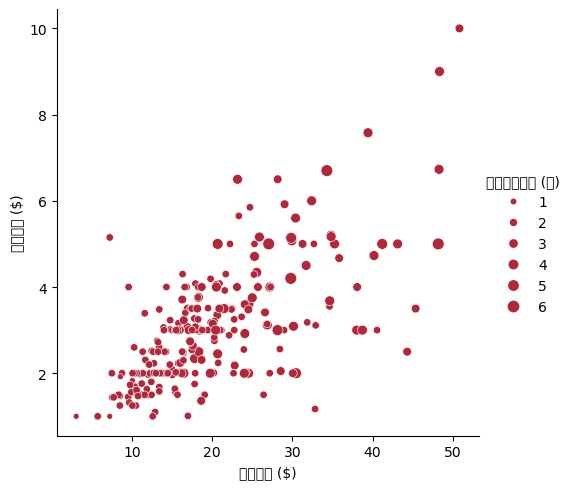

In [67]:
sns.relplot(data=tips,
            x="消费金额 ($)",
            y="小费金额 ($)",
            size="一起就餐人数 (个)", #点大小按照变量"一起就餐人数 (个)"渐变
            color="#b1283a",
            kind='scatter')

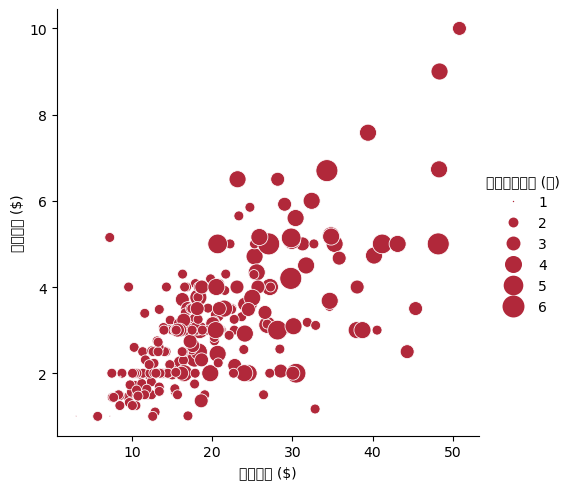

In [69]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    size="一起就餐人数 (个)",
    sizes=(1, 250),  #设置点相对大小
    color="#b1283a",
    kind='scatter')

### 7.1.5 四个变量散点图-点颜色+marker变化

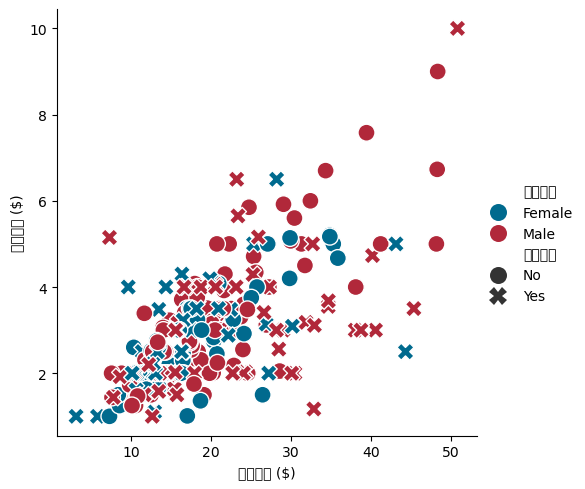

In [72]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",  #颜色展示"客人性别"
    style="是否吸烟",  #marker样式展示"是否吸烟"
    palette=["#006a8e", "#b1283a"],
    kind='scatter',
    s=150)

### 7.1.6 四个变量散点图-点颜色+size变化

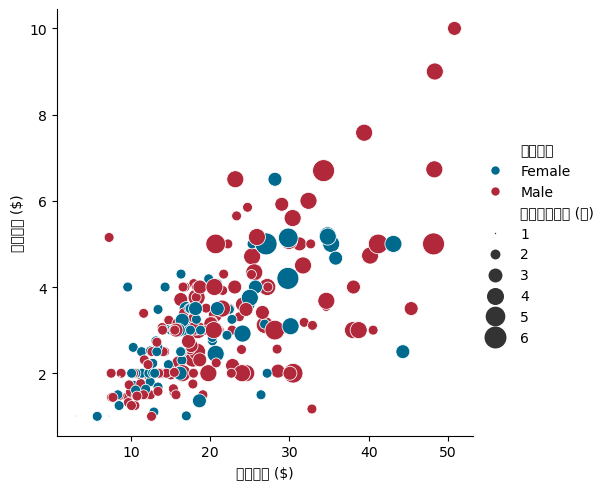

In [75]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    size="一起就餐人数 (个)",  #点大小按照变量"一起就餐人数 (个)"渐变
    sizes=(1, 250),  #设置点相对大小波动范围
    palette=["#006a8e", "#b1283a"],
    kind='scatter')

### 7.1.7 散点图-简说多子图

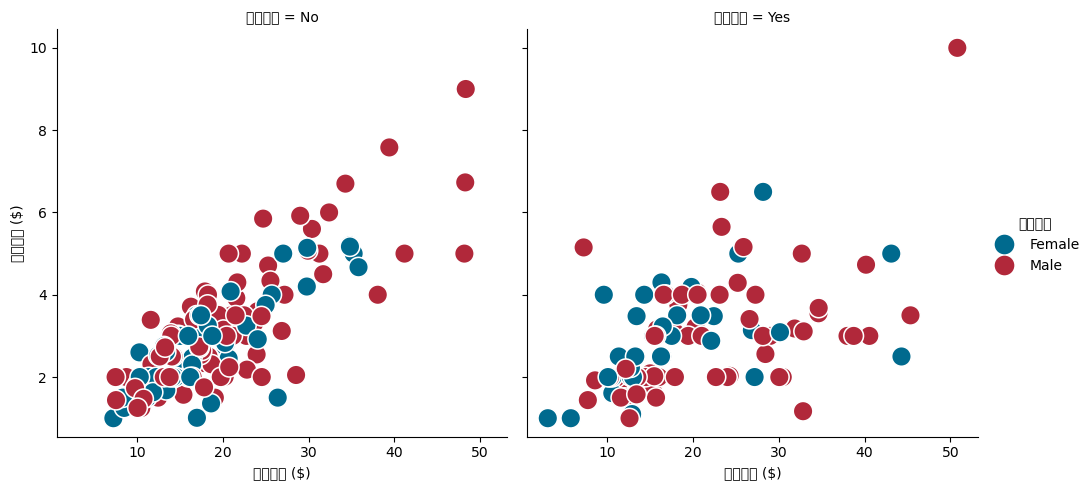

In [78]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    col="是否吸烟",  #行方向按照"是否吸烟"绘制子图
    palette=["#006a8e", "#b1283a"],
    s=200)

### 7.1.9 散点图-按列分面多子图 

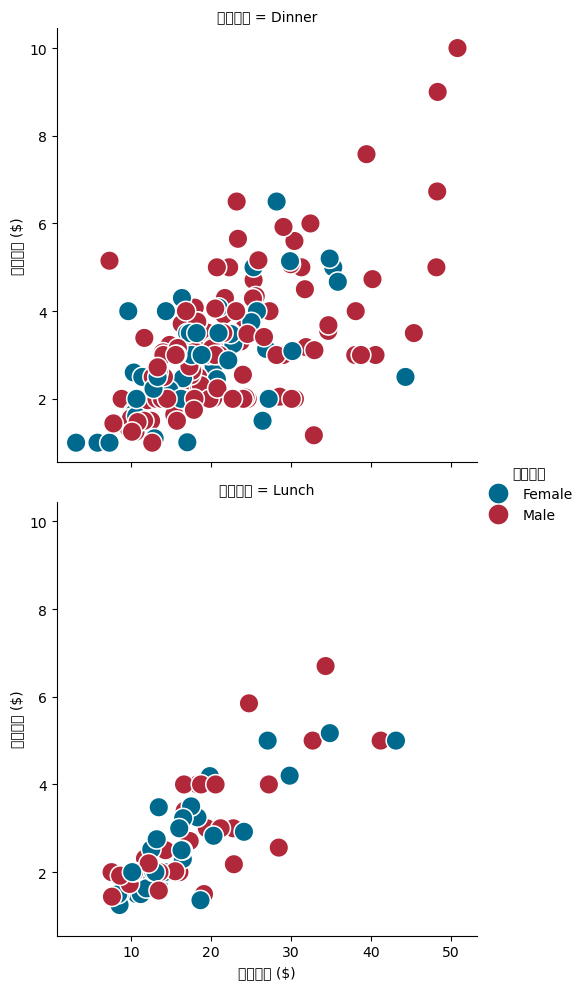

In [81]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    row="就餐时间",  #列方向按照"就餐时间"绘制子图
    palette=["#006a8e", "#b1283a"],
    s=200)

### 7.1.10 散点图-按行列分面多子图 

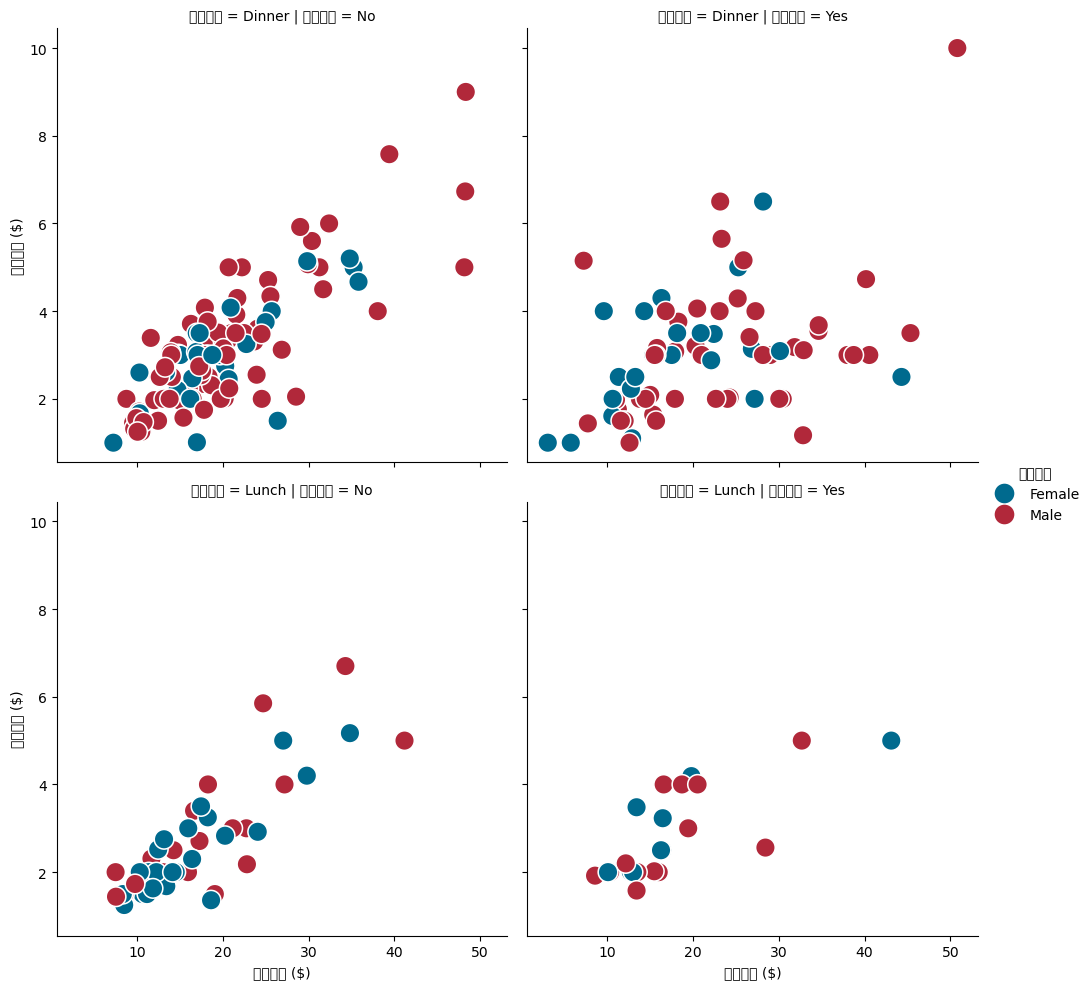

In [84]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    col="是否吸烟",  #行方向按照"是否吸烟"绘制子图
    row="就餐时间",  #列方向按照"就餐时间"绘制子图
    palette=["#006a8e", "#b1283a"],
    s=200)

### 7.1.11 散点图-按行列分面多子图+自定义子图顺序

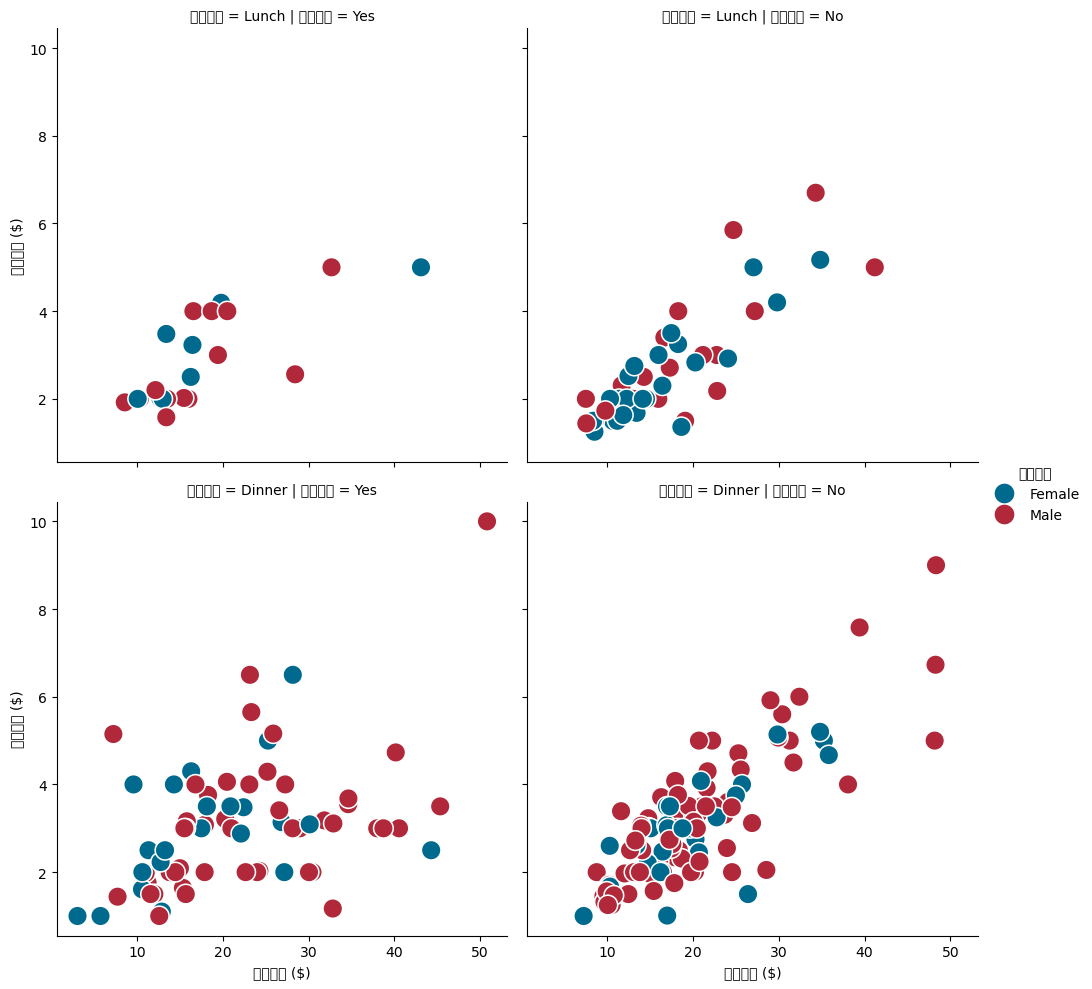

In [87]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    col="是否吸烟",
    row="就餐时间",
    col_order=("Yes", "No"),  #自定义行方向子图顺序("Yes", "No")
    row_order=("Lunch", "Dinner"),  #自定义列方向子图顺序("Lunch", "Dinner")
    palette=["#006a8e", "#b1283a"],
    s=200)

### 7.1.12 散点图-按行列分面多子图+自定义行子图个数

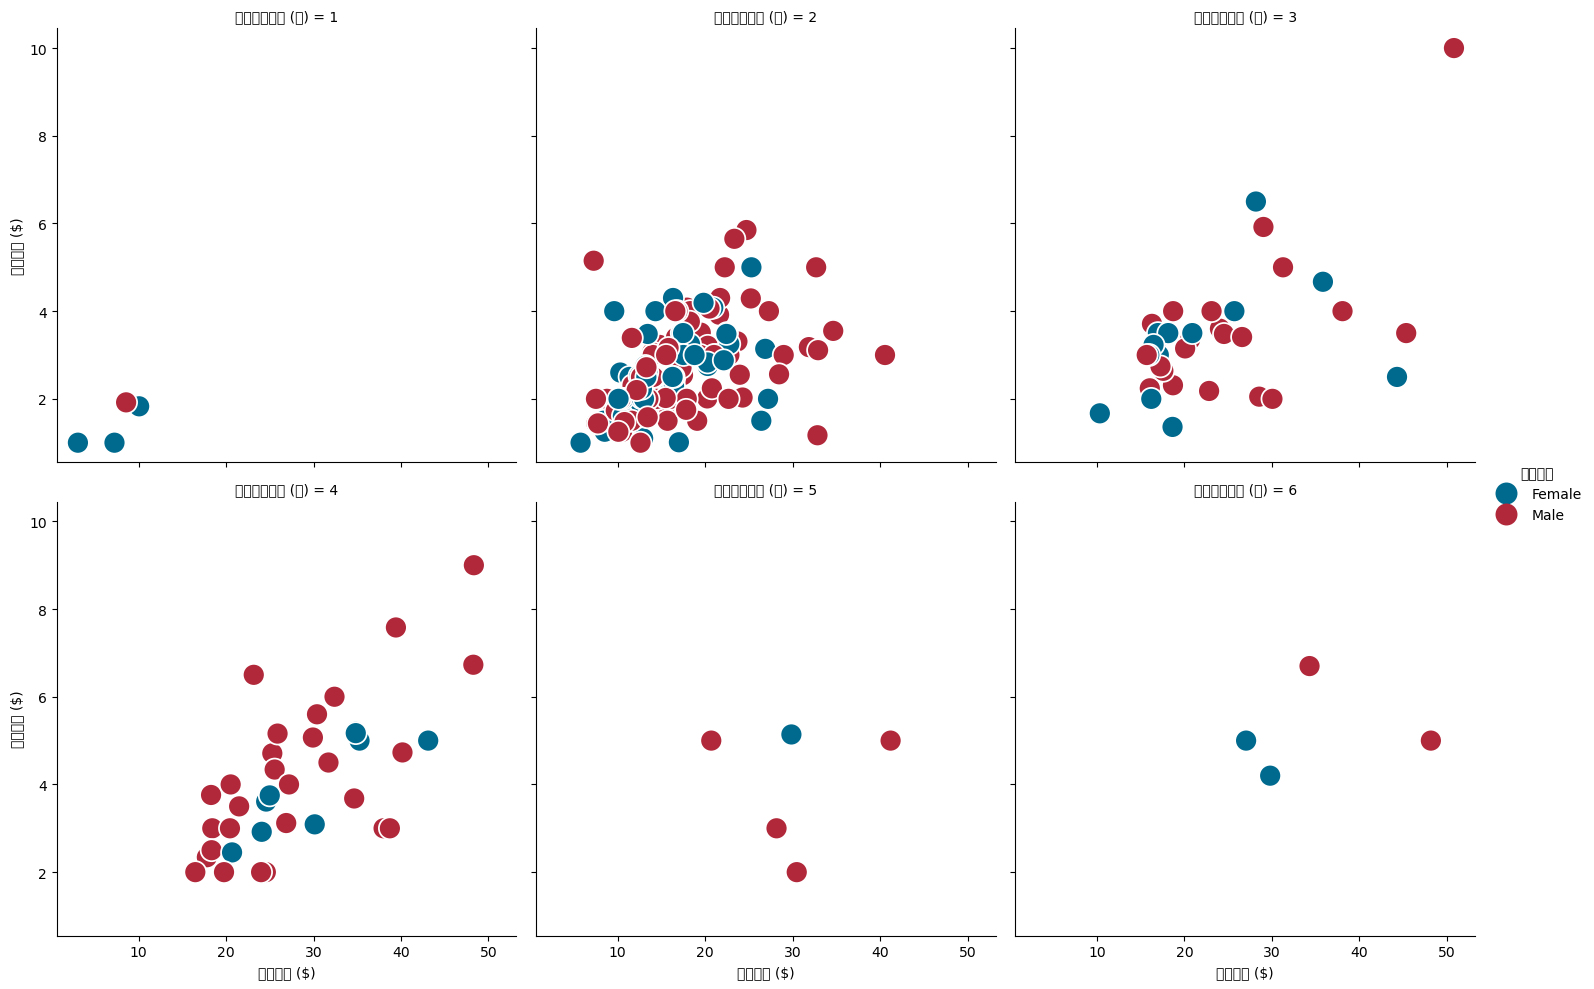

In [90]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    col="一起就餐人数 (个)",
    col_wrap=3,  #自定义每行绘制3个子图
    palette=["#006a8e", "#b1283a"],
    s=250)  #点大小设置

### 7.1.13 散点图细节设置

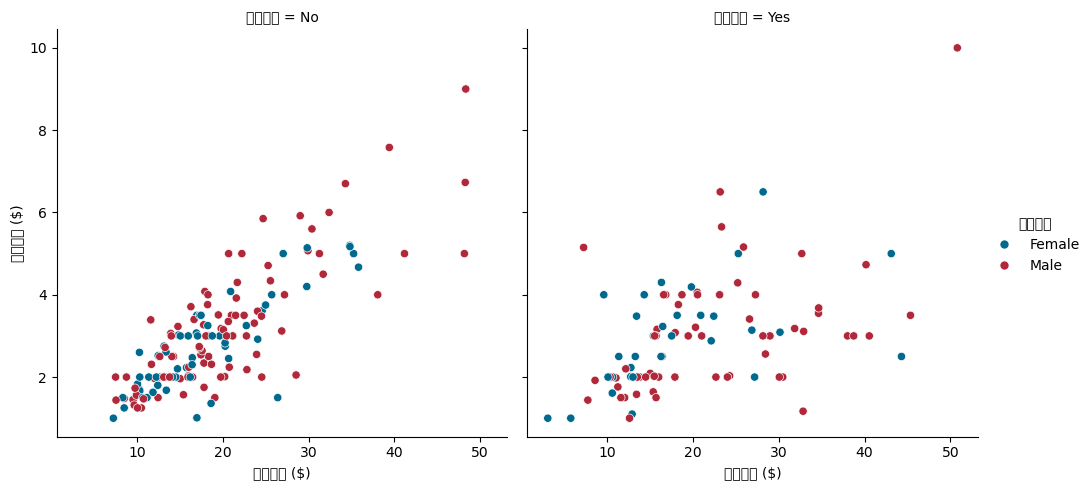

In [93]:
# 点size
sns.relplot(data=tips,
            x="消费金额 ($)",
            y="小费金额 ($)",
            hue="客人性别",
            col="是否吸烟",
            palette=["#006a8e", "#b1283a"])

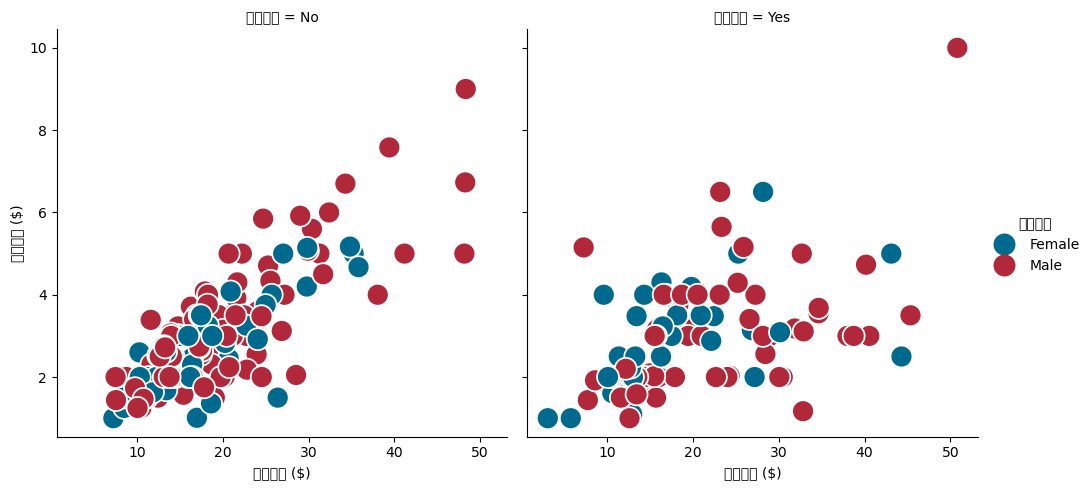

In [95]:
sns.relplot(
    data=tips,
    x="消费金额 ($)",
    y="小费金额 ($)",
    hue="客人性别",
    col="是否吸烟",
    palette=["#006a8e", "#b1283a"],
    s=250,  #s参数设置点size
)

<Axes: xlabel='消费金额 ($)', ylabel='小费金额 ($)'>

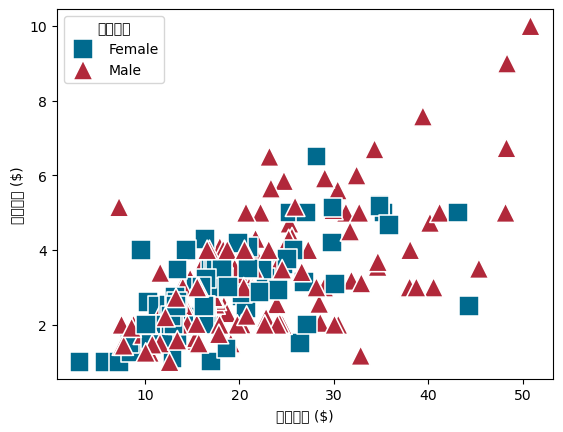

In [97]:
# 点marker
sns.scatterplot(data=tips,
                x="消费金额 ($)",
                y="小费金额 ($)",
                hue="客人性别",
                style="客人性别",
                palette=["#006a8e", "#b1283a"],
                s=200,
                markers={
                    "Female": "s",
                    "Male": "^"
                })  #markers设置marker为正方形（'s'）和三角形（'^'）

<Axes: xlabel='消费金额 ($)', ylabel='小费金额 ($)'>

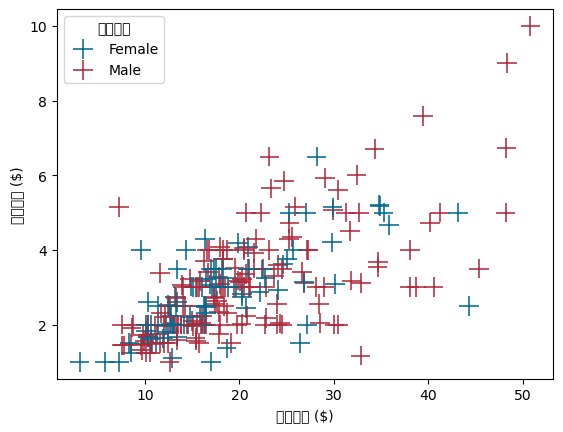

In [99]:

sns.scatterplot(data=tips,
                x="消费金额 ($)",
                y="小费金额 ($)",
                hue="客人性别",
                style="客人性别",
                palette=["#006a8e", "#b1283a"],
                s=200,
                markers="+")  #markers设置为十字架形（'+'）

## 7.2 折线图（12种）

### 7.2.1 两个变量折线图-时间序列

#### 方法1

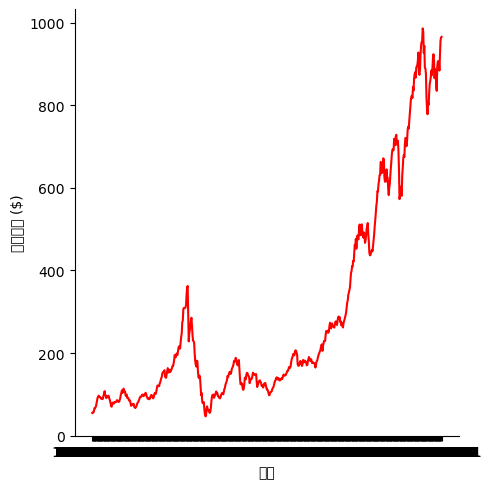

In [106]:
dowjones = pd.read_csv("C:/Users/qinqi/Documents/01SeanBornDoc/sns_data/dowjones.csv")

sns.relplot(
    data=dowjones,
    x="日期",
    y="股票价格 ($)",
    kind="line",  #通过kind参数指定折线图，kind="line"
    color="red")

<Axes: xlabel='日期', ylabel='股票价格 ($)'>

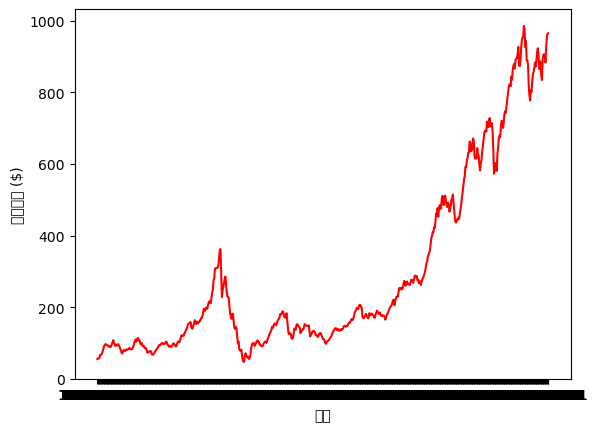

In [108]:
sns.lineplot(data=dowjones, x="日期", y="股票价格 ($)", color="red")

### 7.2.2 两个变量折线图-置信区间

In [111]:
fmri= pd.read_csv("C:/Users/qinqi/Documents/01SeanBornDoc/sns_data/fmri.csv")

测量对象  测量时间  刺激事件      大脑区域    fMRI信号
0     s13    18  stim  parietal -0.017552
1      s5    14  stim  parietal -0.080883
2     s12    18  stim  parietal -0.081033
3     s11    18  stim  parietal -0.046134
4     s10    18  stim  parietal -0.037970
...   ...   ...   ...       ...       ...
1059   s0     8   cue   frontal  0.018165
1060  s13     7   cue   frontal -0.029130
1061  s12     7   cue   frontal -0.004939
1062  s11     7   cue   frontal -0.025367
1063   s0     0   cue  parietal -0.006899

[1064 rows x 5 columns]

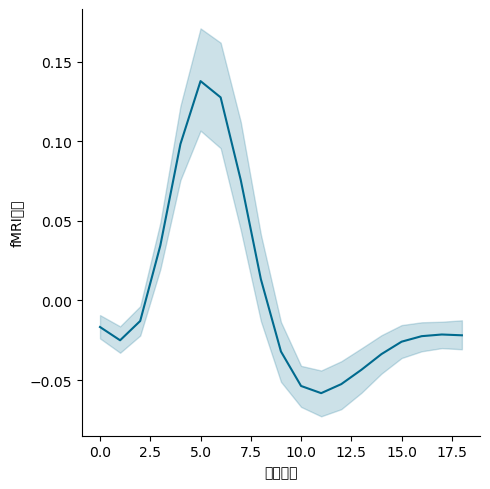

In [113]:
# 方法1
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    kind="line",
    errorbar=('ci', 95),  #添加围绕均值的95%置信区间
    color="#006a8e")

<Axes: xlabel='测量时间', ylabel='fMRI信号'>

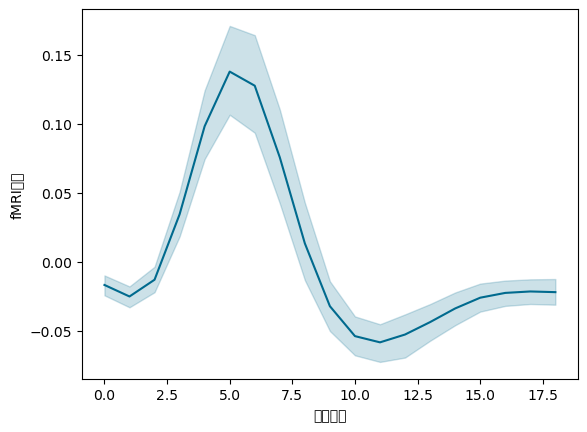

In [115]:
# 方法2
sns.lineplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    errorbar=('ci', 95),  #添加围绕均值的95%置信区间
    color="#006a8e")

### 7.2.3 三个变量折线图-线颜色变化

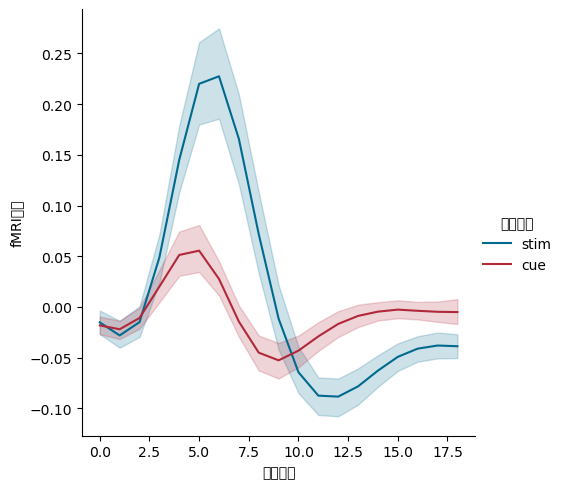

In [118]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    kind="line",
    errorbar=('ci', 95),
    hue="刺激事件",  #通过hue参数传入第三个变量，设置颜色
    palette=["#006a8e", "#b1283a"])

### 7.2.4 三个变量折线图-线型变化

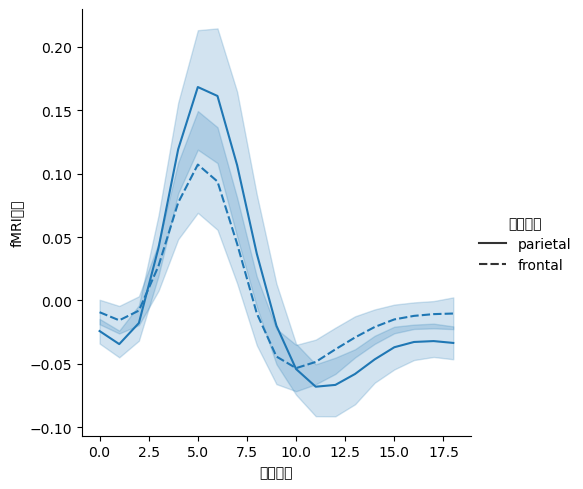

In [121]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    kind="line",
    errorbar=('ci', 95),
    style="大脑区域",  #通过style参数传入第三个变量，设置线型
)

### 7.2.5 四个变量折线图-颜色+线型变化

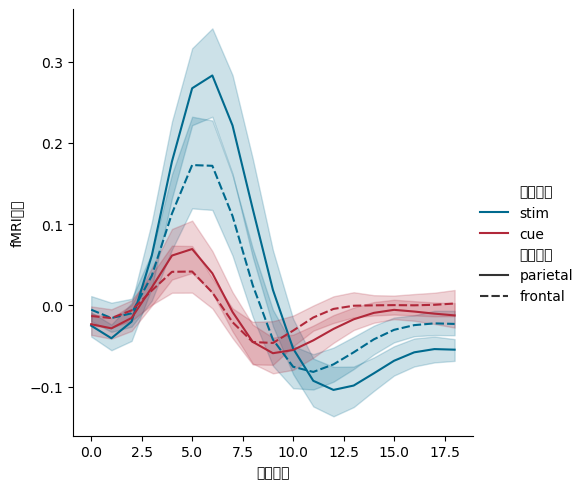

In [124]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    kind="line",
    errorbar=('ci', 95),
    hue="刺激事件",  #通过hue参数传入第三个变量，设置颜色
    style="大脑区域",  #通过style参数传入第四个变量，设置线型
    palette=["#006a8e", "#b1283a"])

### 7.2.6 折线图-按行分面多子图

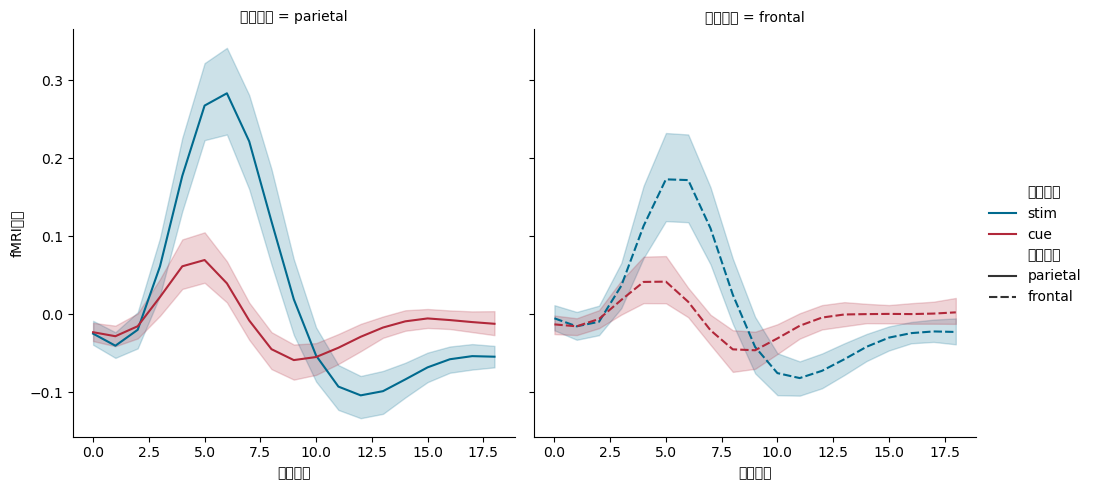

In [127]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    hue="刺激事件",
    style="大脑区域",
    col="大脑区域",  #行方向按照"大脑区域"绘制子图
    kind="line",
    palette=["#006a8e", "#b1283a"])

### 7.2.7 折线图-按列分面多子图

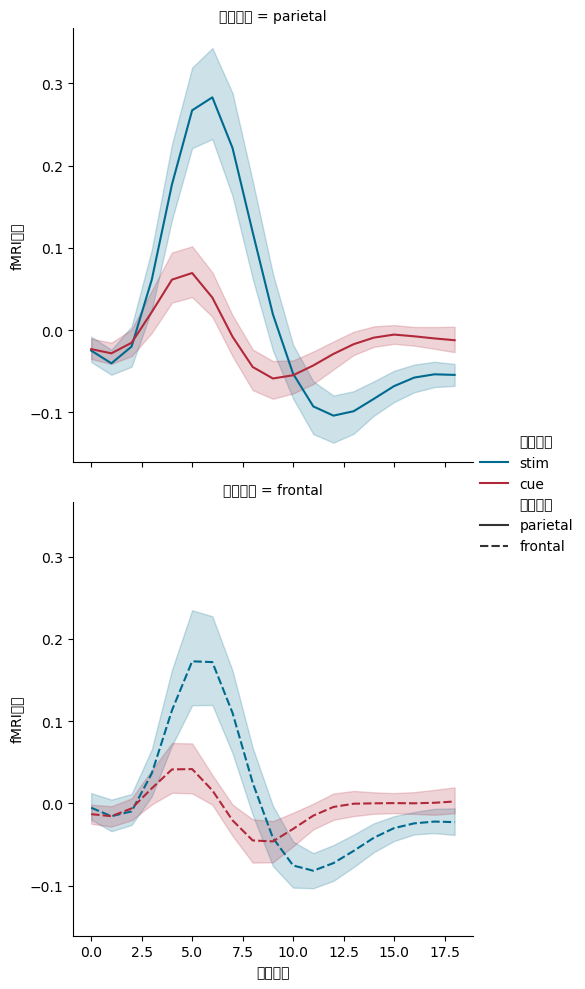

In [130]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    hue="刺激事件",
    style="大脑区域",
    row="大脑区域",  #列方向按照"大脑区域"绘制子图
    kind="line",
    palette=["#006a8e", "#b1283a"])

### 7.2.8 折线图-按行列分面多子图

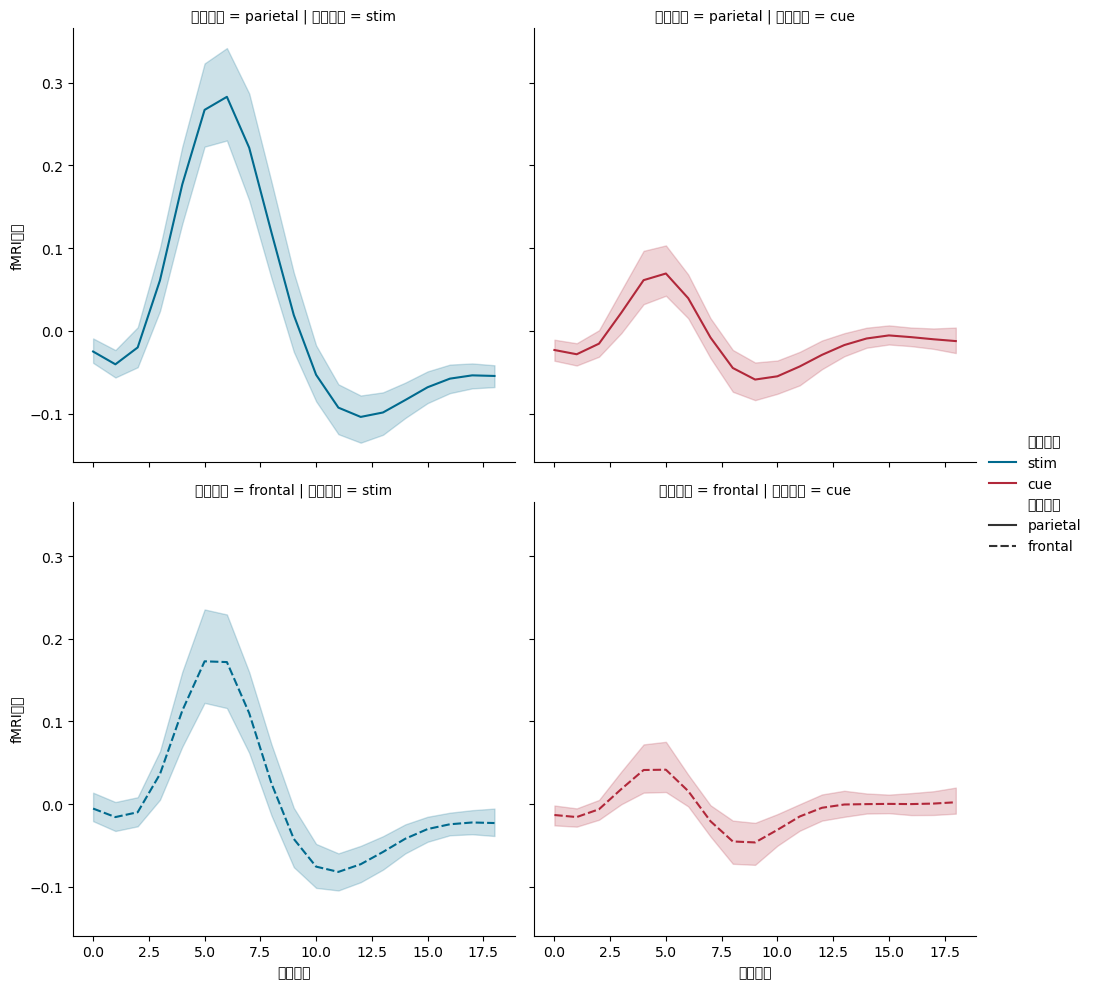

In [133]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    hue="刺激事件",
    style="大脑区域",
    col="刺激事件",  #行方向按照"刺激事件"绘制子图
    row="大脑区域",  #列方向按照"大脑区域"绘制子图
    kind="line",
    palette=["#006a8e", "#b1283a"])

### 7.2.9 折线图-按行列分面多子图+自定义子图顺序

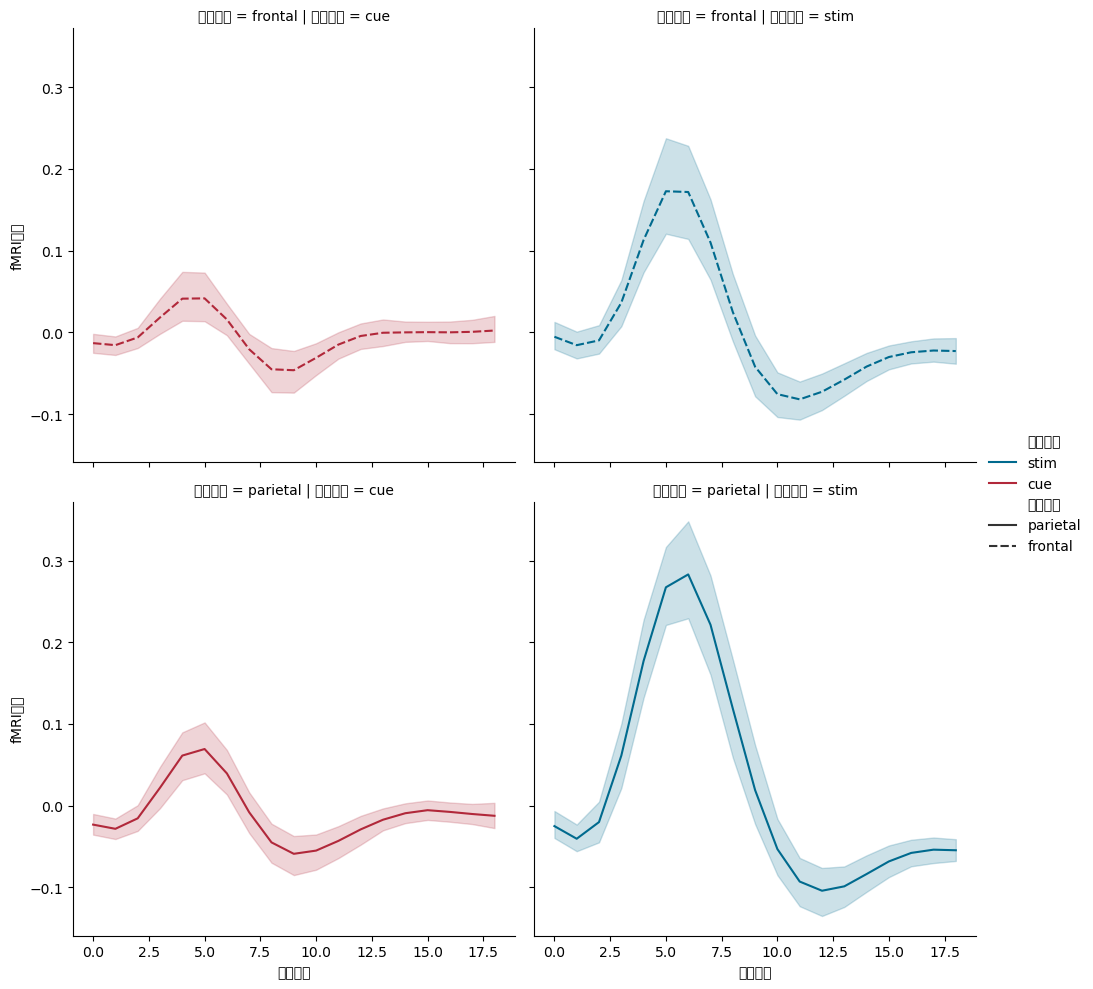

In [137]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    hue="刺激事件",
    style="大脑区域",
    col="刺激事件",
    row="大脑区域",
    col_order=("cue", "stim"),  #自定义行方向子图顺序("cue", "stim")
    row_order=("frontal", "parietal"),  #自定义列方向子图顺序("frontal", "parietal")
    kind="line",
    palette=["#006a8e", "#b1283a"])

### 7.2.10 折线图-误差棒

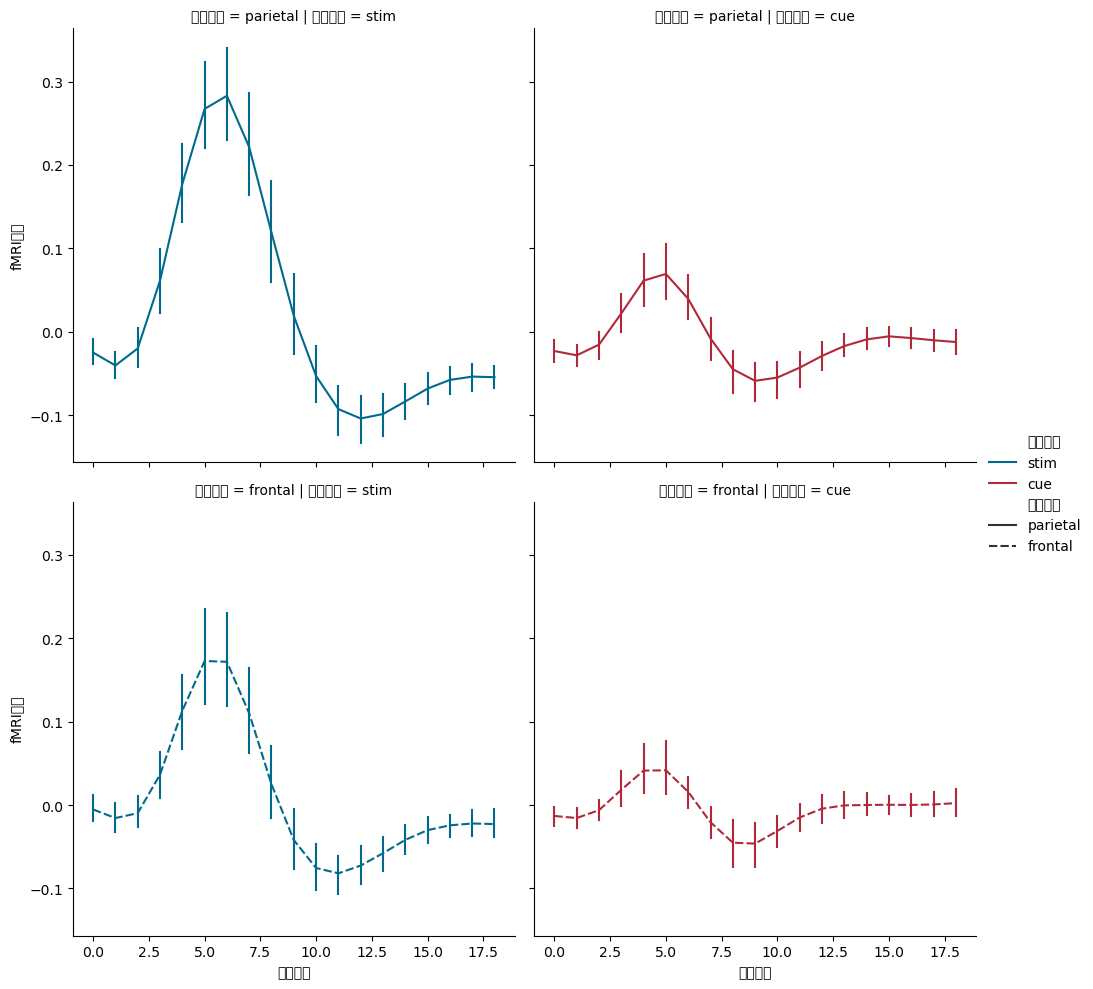

In [140]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    hue="刺激事件",
    style="大脑区域",
    col="刺激事件",
    row="大脑区域",
    kind="line",
    err_style='bars',  #添加误差棒
    palette=["#006a8e", "#b1283a"])

### 7.2.11 折线图-关闭数据聚合

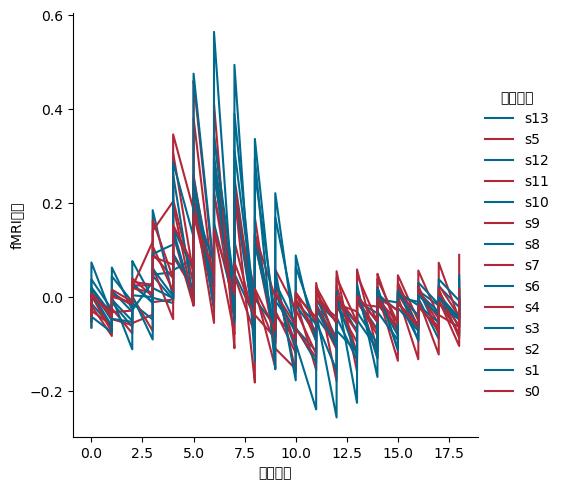

In [143]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    kind="line",
    hue="测量对象", 
    units="测量对象",  #units参数设置按照"测量对象"分组
    estimator=None,  #关闭数据聚合
    palette=["#006a8e", "#b1283a"])

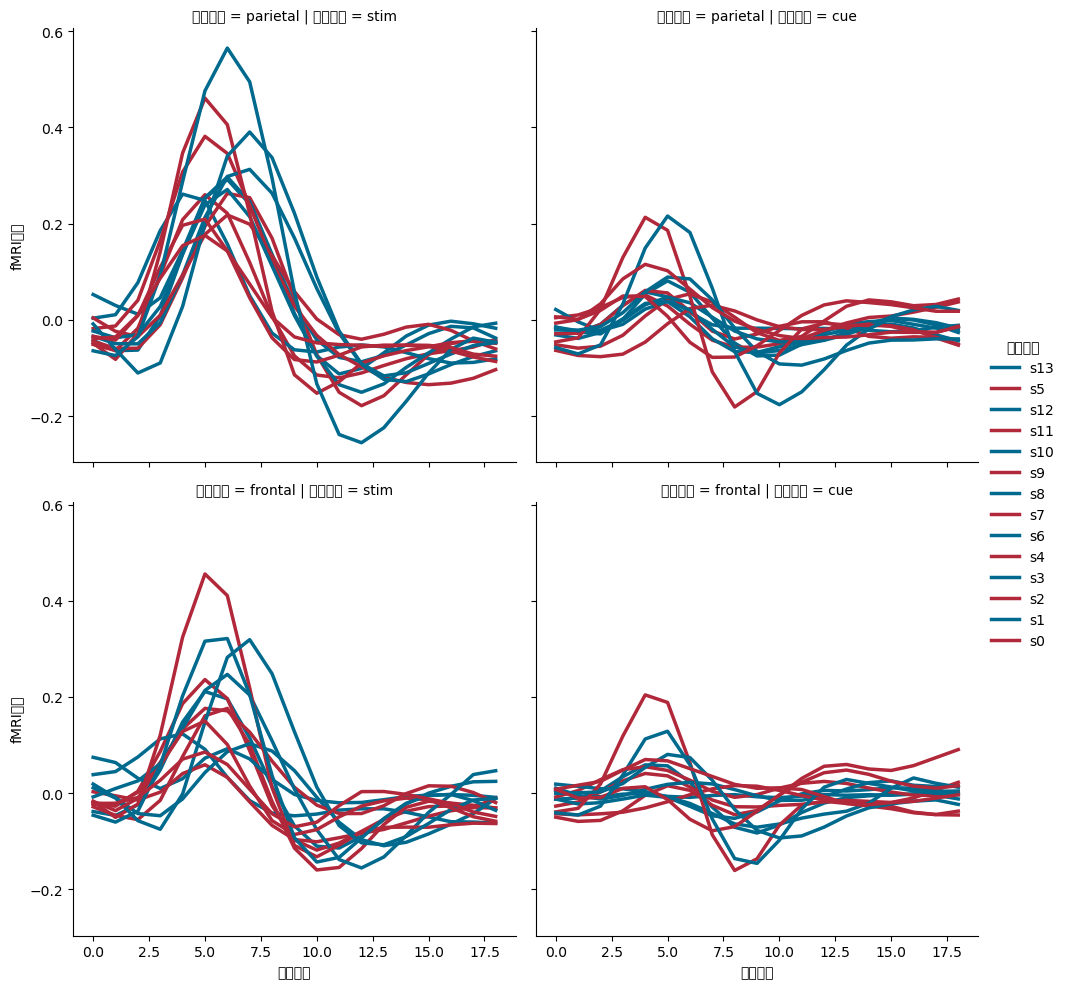

In [145]:
sns.relplot(
    data=fmri,
    x="测量时间",
    y="fMRI信号",
    hue="测量对象",
    col="刺激事件",  #行分面
    row="大脑区域",  #列分面
    kind="line",
    estimator=None,
    lw=2.5,
    palette=["#006a8e", "#b1283a"])

### 7.2.12 折线图-格子图

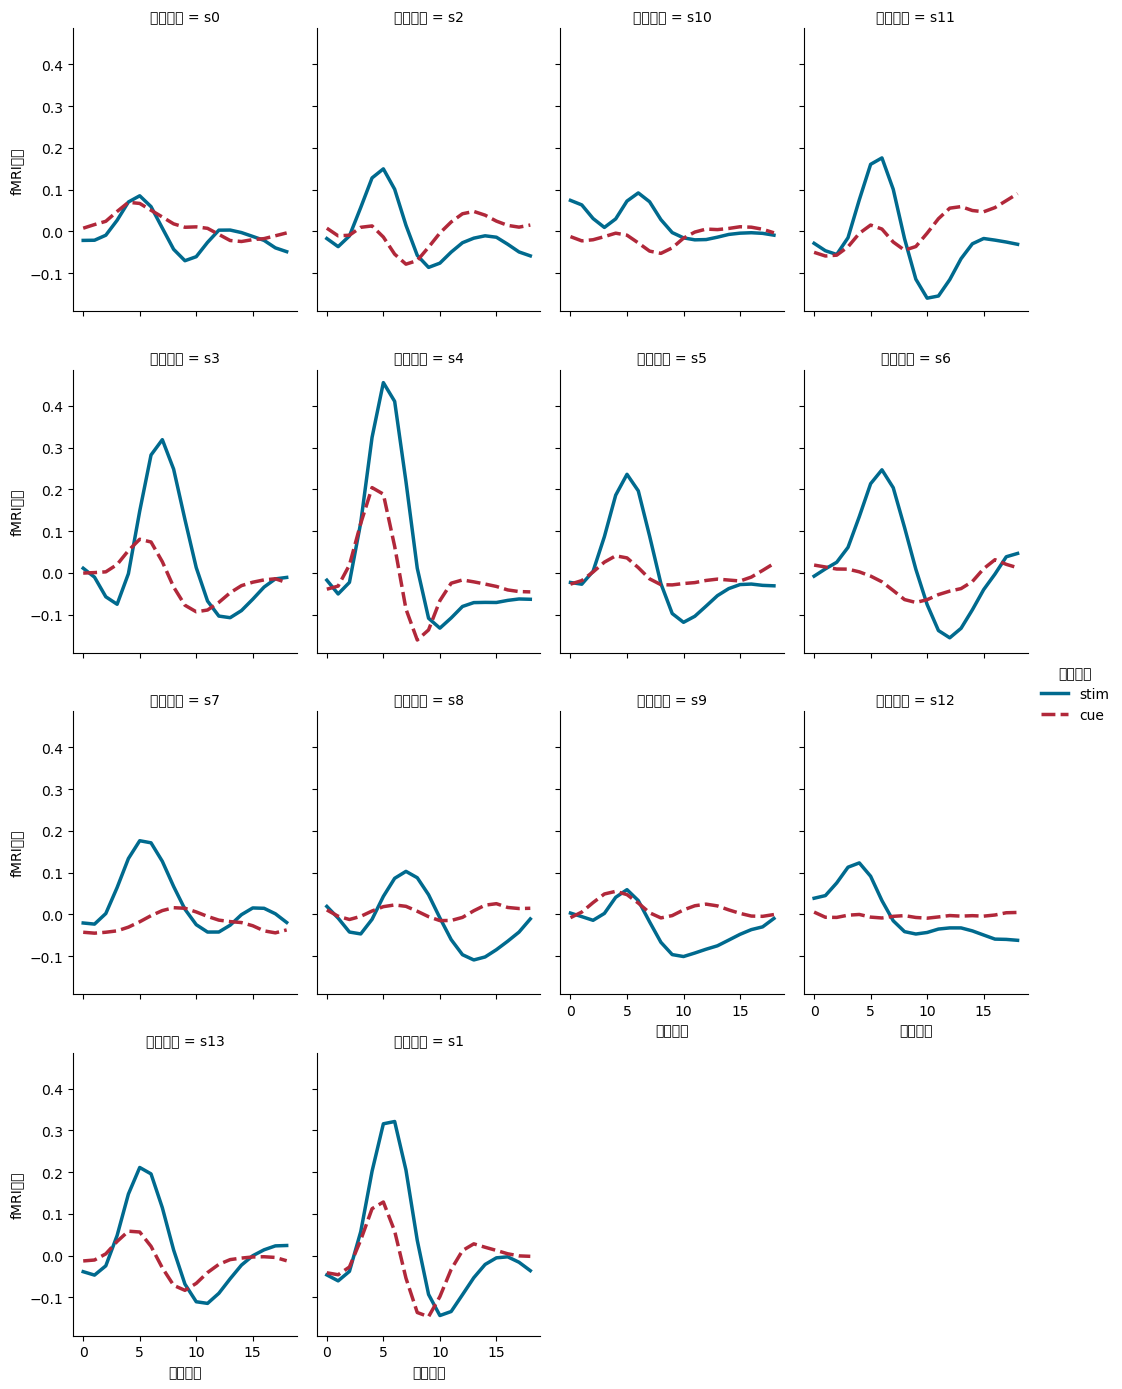

In [148]:
sns.relplot(
    data=fmri[fmri["大脑区域"] == "frontal"],
    kind="line",
    x="测量时间",
    y="fMRI信号",
    hue="刺激事件",
    style="刺激事件",
    col="测量对象",  #帮助在"测量对象"变量的多水平上观察其影响力
    estimator=None,
    col_wrap=4,
    height=3.5,
    aspect=.75,
    linewidth=2.5,
    palette=["#006a8e", "#b1283a"])

## 8.1 直方图（18种）

### 8.1.1 直方图-垂直方向

### 8.1.1 直方图-垂直方向

In [152]:
penguins = pd.read_csv("C:/Users/qinqi/Documents/01SeanBornDoc/sns_data/penguins.csv")

企鹅的种类         岛屿  喙长 (毫米)  喙深 (毫米)  鳍长 (毫米)      体重      性别
0    Adelie  Torgersen     39.1     18.7    181.0  3750.0    MALE
1    Adelie  Torgersen     39.5     17.4    186.0  3800.0  FEMALE
2    Adelie  Torgersen     40.3     18.0    195.0  3250.0  FEMALE
3    Adelie  Torgersen      NaN      NaN      NaN     NaN     NaN
4    Adelie  Torgersen     36.7     19.3    193.0  3450.0  FEMALE
..      ...        ...      ...      ...      ...     ...     ...
339  Gentoo     Biscoe      NaN      NaN      NaN     NaN     NaN
340  Gentoo     Biscoe     46.8     14.3    215.0  4850.0  FEMALE
341  Gentoo     Biscoe     50.4     15.7    222.0  5750.0    MALE
342  Gentoo     Biscoe     45.2     14.8    212.0  5200.0  FEMALE
343  Gentoo     Biscoe     49.9     16.1    213.0  5400.0    MALE

[344 rows x 7 columns]

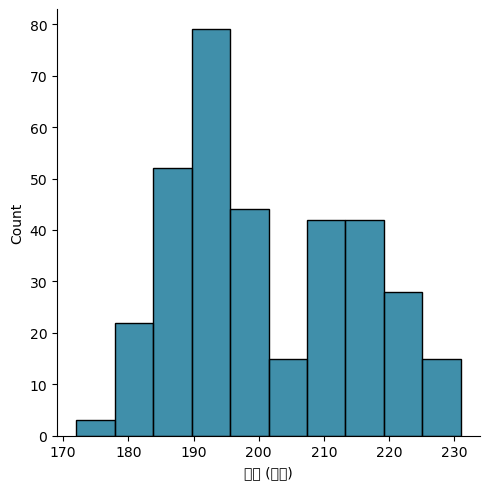

In [154]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",  #垂直直方图
    kind='hist',  #通过kind参数指定直方图，kind="hist"
    color="#006a8e")

### 8.1.2 直方图-水平方向

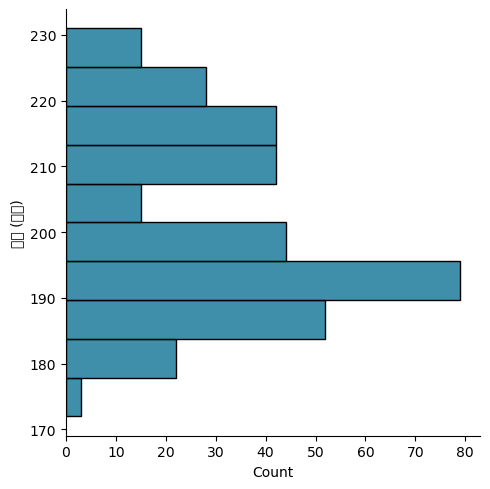

In [157]:
sns.displot(
    penguins,
    y="鳍长 (毫米)",  #水平直方图
    kind='hist',  #通过kind参数指定直方图，kind="hist"
    color="#006a8e")

### 8.1.3 直方图-指定分箱数

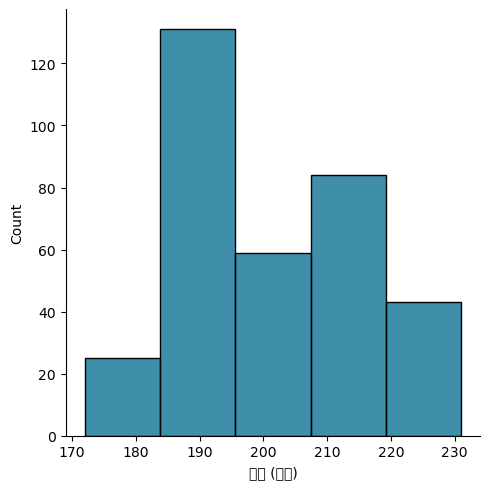

In [160]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    bins=5,  #指定分箱数为5，即柱子个数
    color="#006a8e")

### 8.1.4 直方图-自定义分箱断点

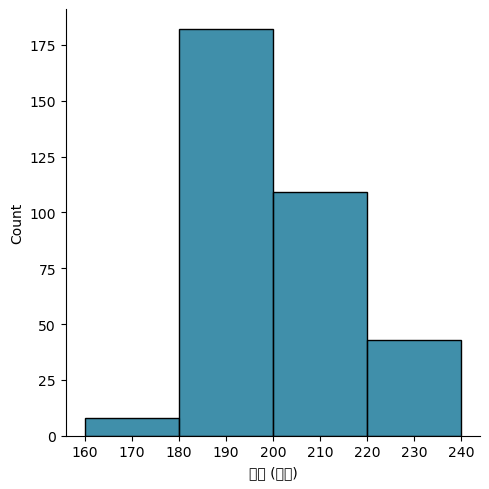

In [163]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    bins=[160, 180, 200, 220, 240],  #自定义箱子的断点
    color="#006a8e")

### 8.1.5 直方图-离散数据条形图

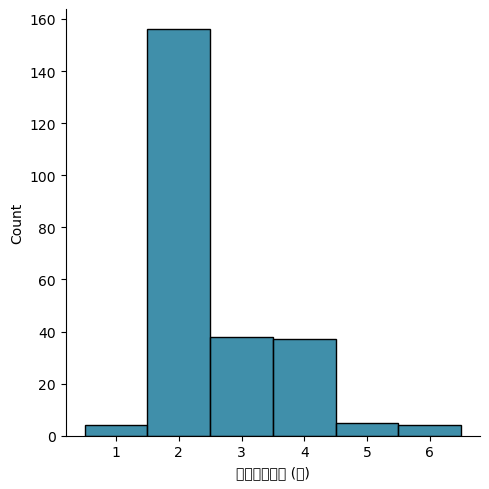

In [166]:
sns.displot(
    tips,
    x="一起就餐人数 (个)",
    kind='hist',
    discrete=True,  #相当于条形图，适用于离散数据
    color="#006a8e")

### 8.1.6 直方图-设置箱区间宽度

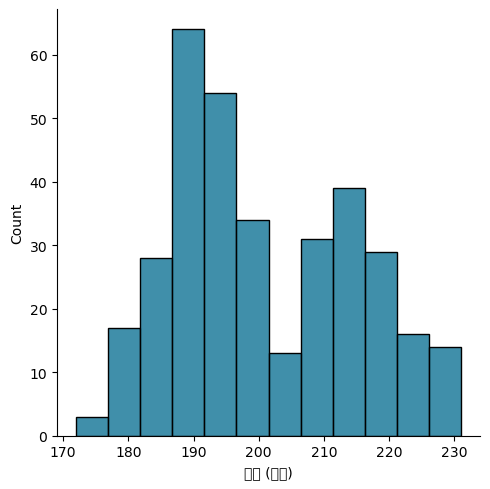

In [169]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    binwidth=5,  #设置箱宽，即每个箱子区间宽度
    color="#006a8e")

### 8.1.7 直方图-设置箱区间相对宽度

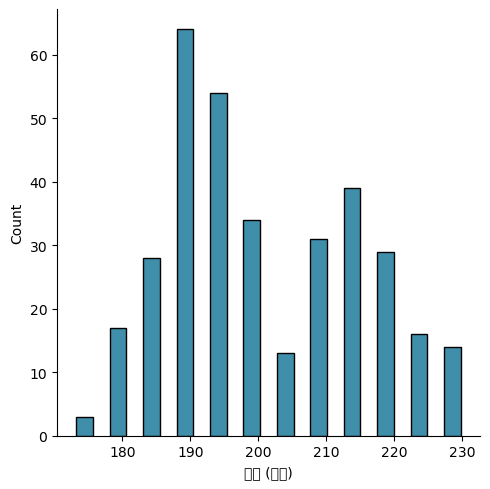

In [172]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    binwidth=5,
    shrink=.5,  #设置箱区间相对宽度
    color="#006a8e")

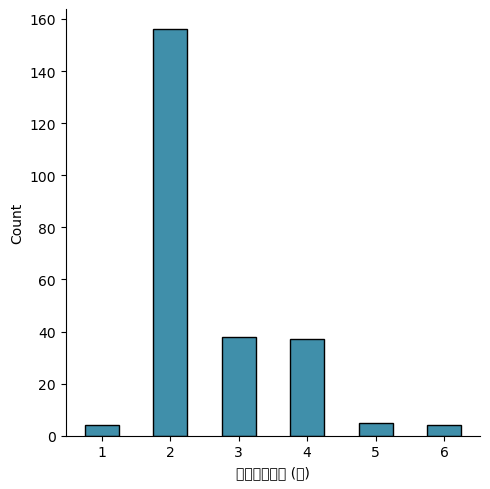

In [174]:
sns.displot(
    tips,
    x="一起就餐人数 (个)",
    kind='hist',
    discrete=True,
    shrink=.5,  #设置箱区间相对宽度
    color="#006a8e")

### 8.1.8 直方图-箱子填充

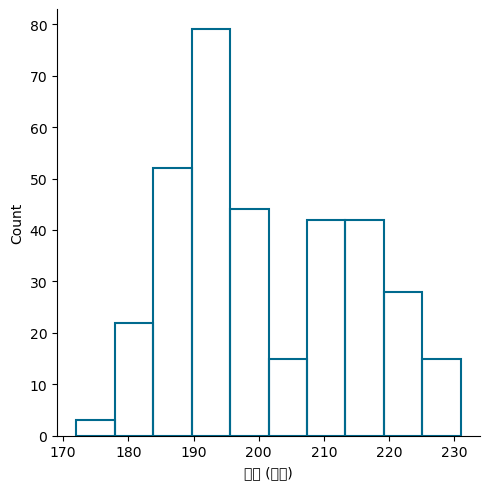

In [177]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    fill=False,  #fill设置箱子填充
    color="#006a8e")

### 8.1.9 直方图-箱子呈现方式

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

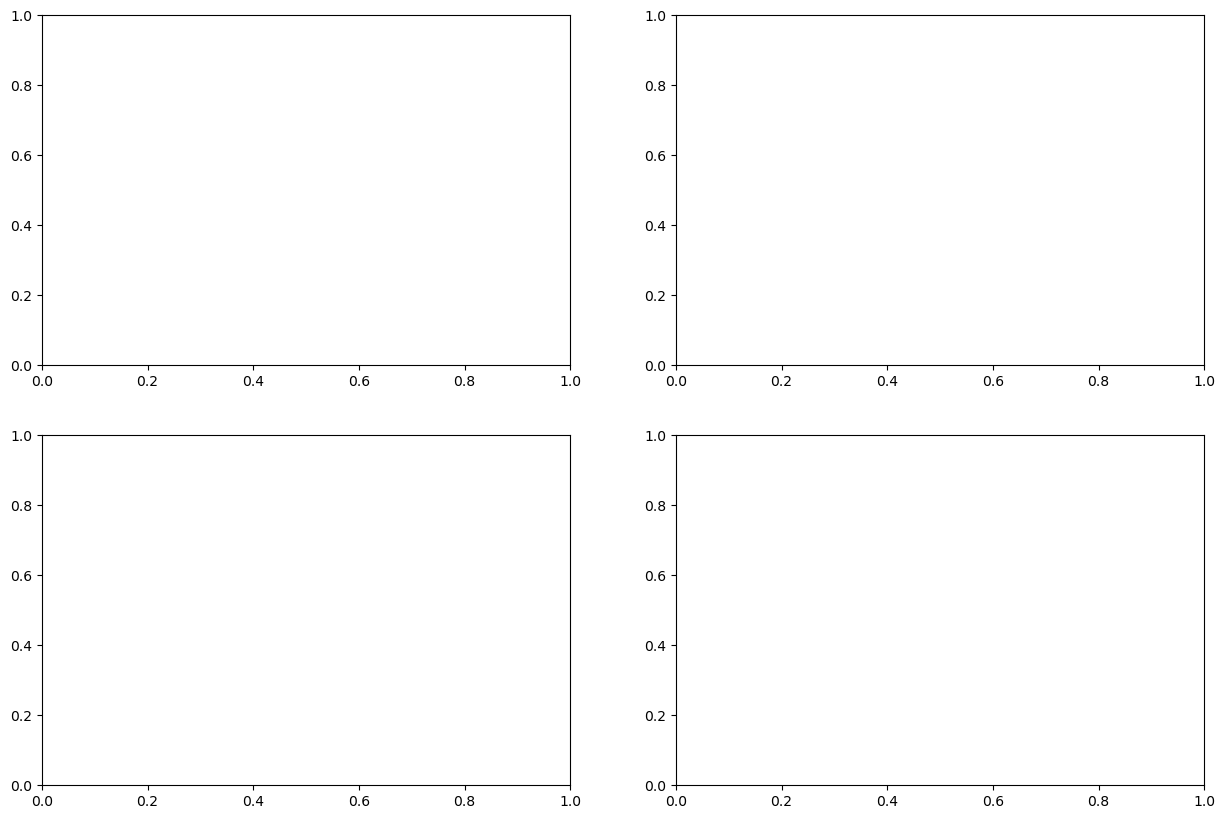

In [184]:
element_values = ["bars", "step", "poly"]  #三种箱子呈现方式，默认为"bars"
num_rows = 2 #“proportion”, “percent”, “count”
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
for i, element in enumerate(element_values):
    sns.histplot(
        penguins,
        x="鳍长 (毫米)",
        element=element,  #指定箱子呈现方式
        ax=axes[i],
        color="#006a8e")
    axes[i].set_title(f"element='{element}'", fontsize=14, color="blue")

plt.tight_layout()
plt.show()

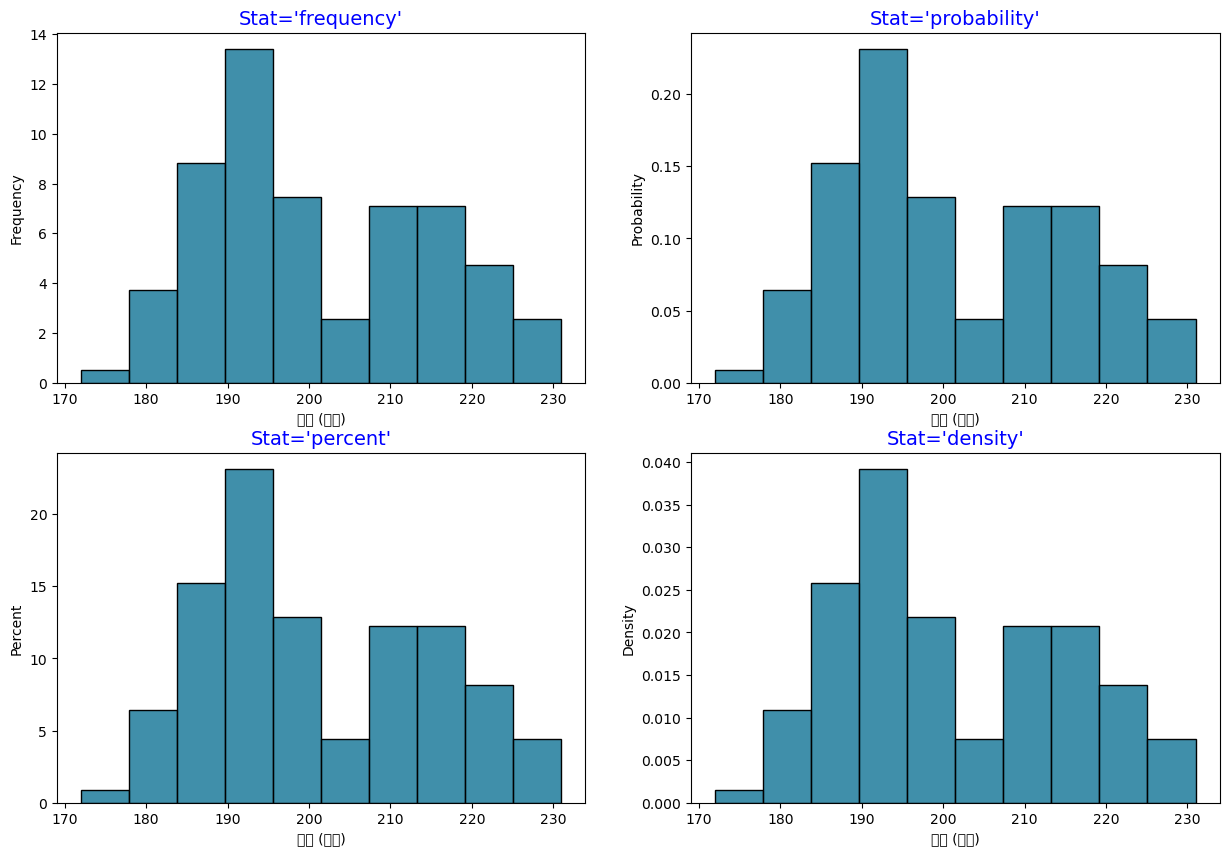

In [186]:
# ### 8.1.10 直方图-数据统计方式

# In[50]:

stat_values = ["frequency", "probability", "percent", "density"]
num_rows = 2 #“proportion”, “percent”, “count”
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
for i, stat in enumerate(stat_values):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(
        penguins,
        x="鳍长 (毫米)",
        stat=stat,  #设置数据统计方式
        ax=axes[row, col],
        color="#006a8e")
    axes[row, col].set_title(f"Stat='{stat}'", fontsize=14, color="blue")

### 8.1.11 分组直方图-图层叠加

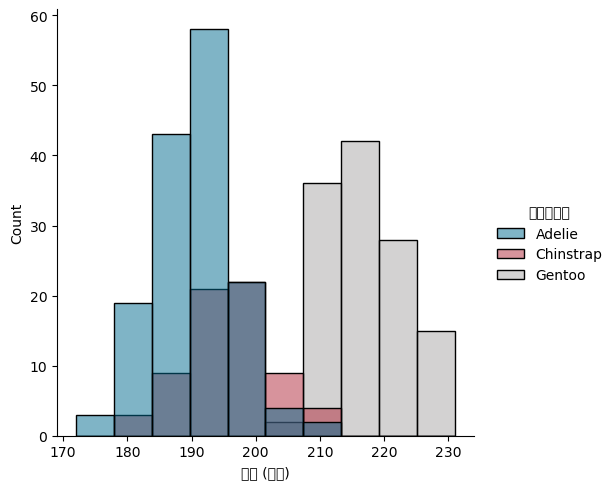

In [189]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    hue="企鹅的种类",  #hue指定分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    multiple='layer'  #指定按照'layer'叠加
)

### 8.1.12 分组直方图-堆积叠加

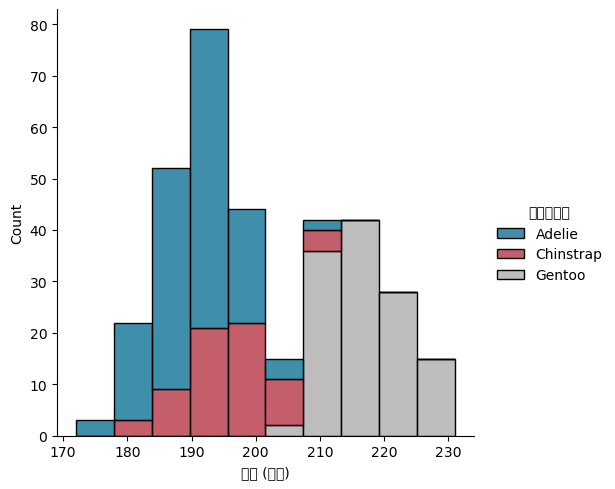

In [192]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    hue="企鹅的种类",  #hue指定分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    multiple="stack")  #堆叠叠加

### 8.1.13 分组直方图-分组

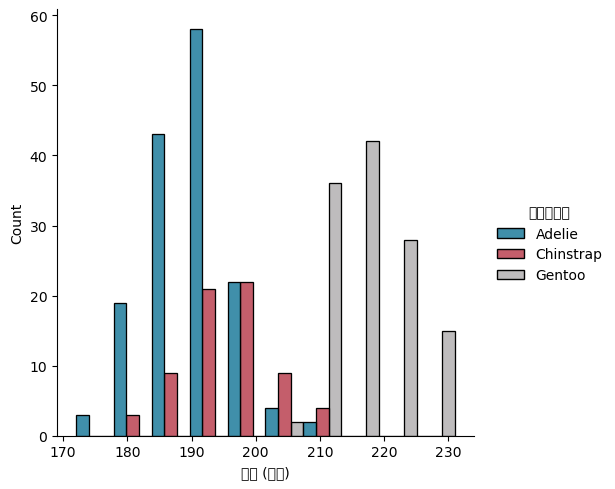

In [195]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    hue="企鹅的种类",  #hue指定分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    multiple="dodge")  #分组

### 8.1.14 分组直方图-百分比堆积

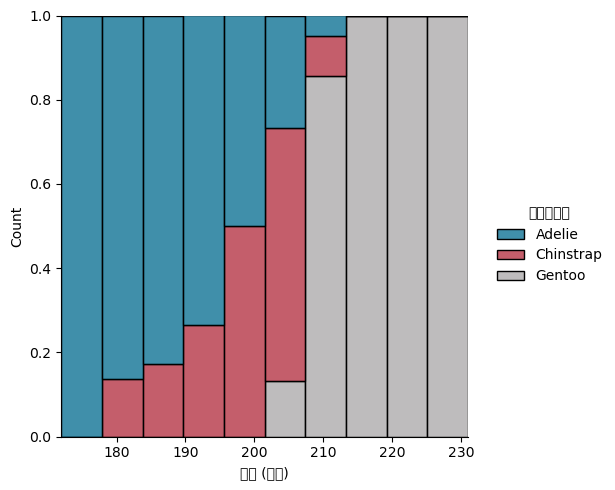

In [198]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    hue="企鹅的种类",  #hue指定分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    multiple="fill")  #百分比堆积

### 8.1.15 双变量直方图-heatmap直方图

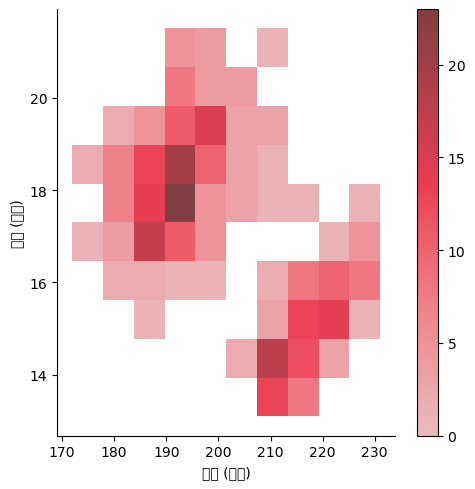

In [201]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",  #变量1
    y="喙深 (毫米)",  #变量2
    kind='hist',
    color="#b1283a",
    cbar=True)

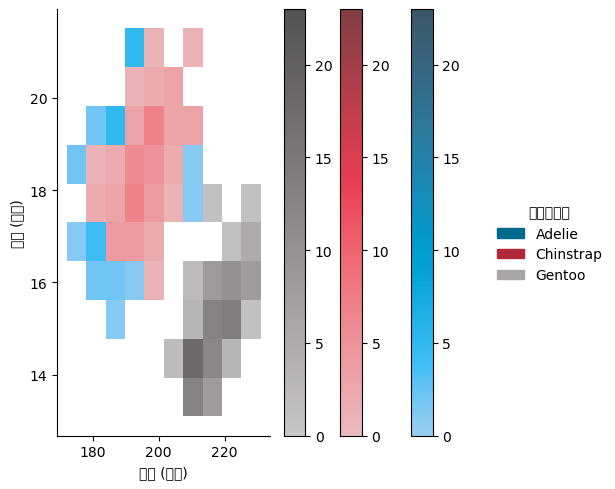

In [203]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    y="喙深 (毫米)",
    kind='hist',
    hue="企鹅的种类",  #hue指定分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    cbar=True)

### 8.1.16 累加直方图

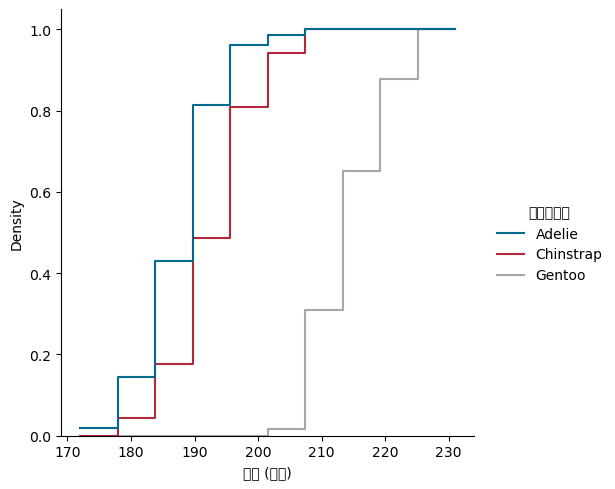

In [206]:
sns.displot(
    data=penguins,
    x="鳍长 (毫米)",
    element="step",  #设置数据统计方式为step
    hue="企鹅的种类",
    fill=False,  #非填充
    cumulative=True,  #设置随着箱子增加而累加计数
    stat="density",
    common_norm=False,
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
)

### 8.1.17 histplot实现直方图

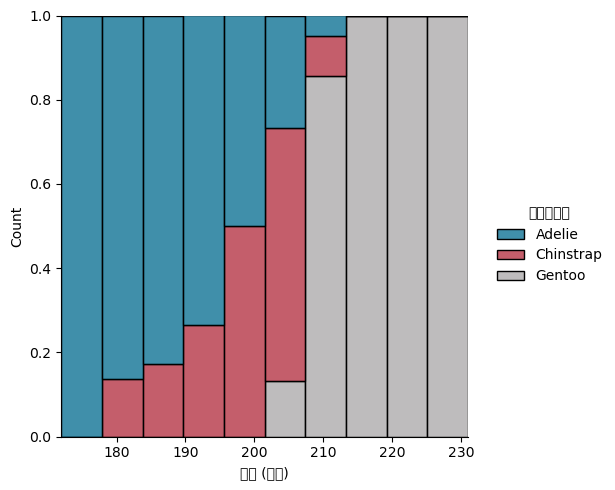

In [209]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    hue="企鹅的种类",  #hue指定分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    multiple="fill")  #百分比堆积

<Axes: xlabel='鳍长 (毫米)', ylabel='Count'>

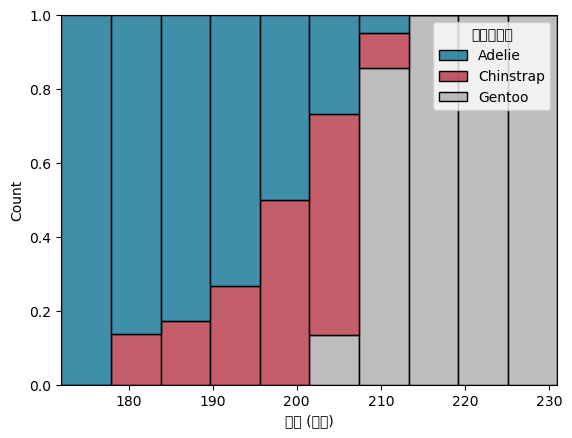

In [211]:
sns.histplot(
    penguins,
    x="鳍长 (毫米)",
    hue="企鹅的种类",  #hue指定分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    multiple="fill")  #百分比堆积

### 8.1.18 直方图-按行列分面多子图

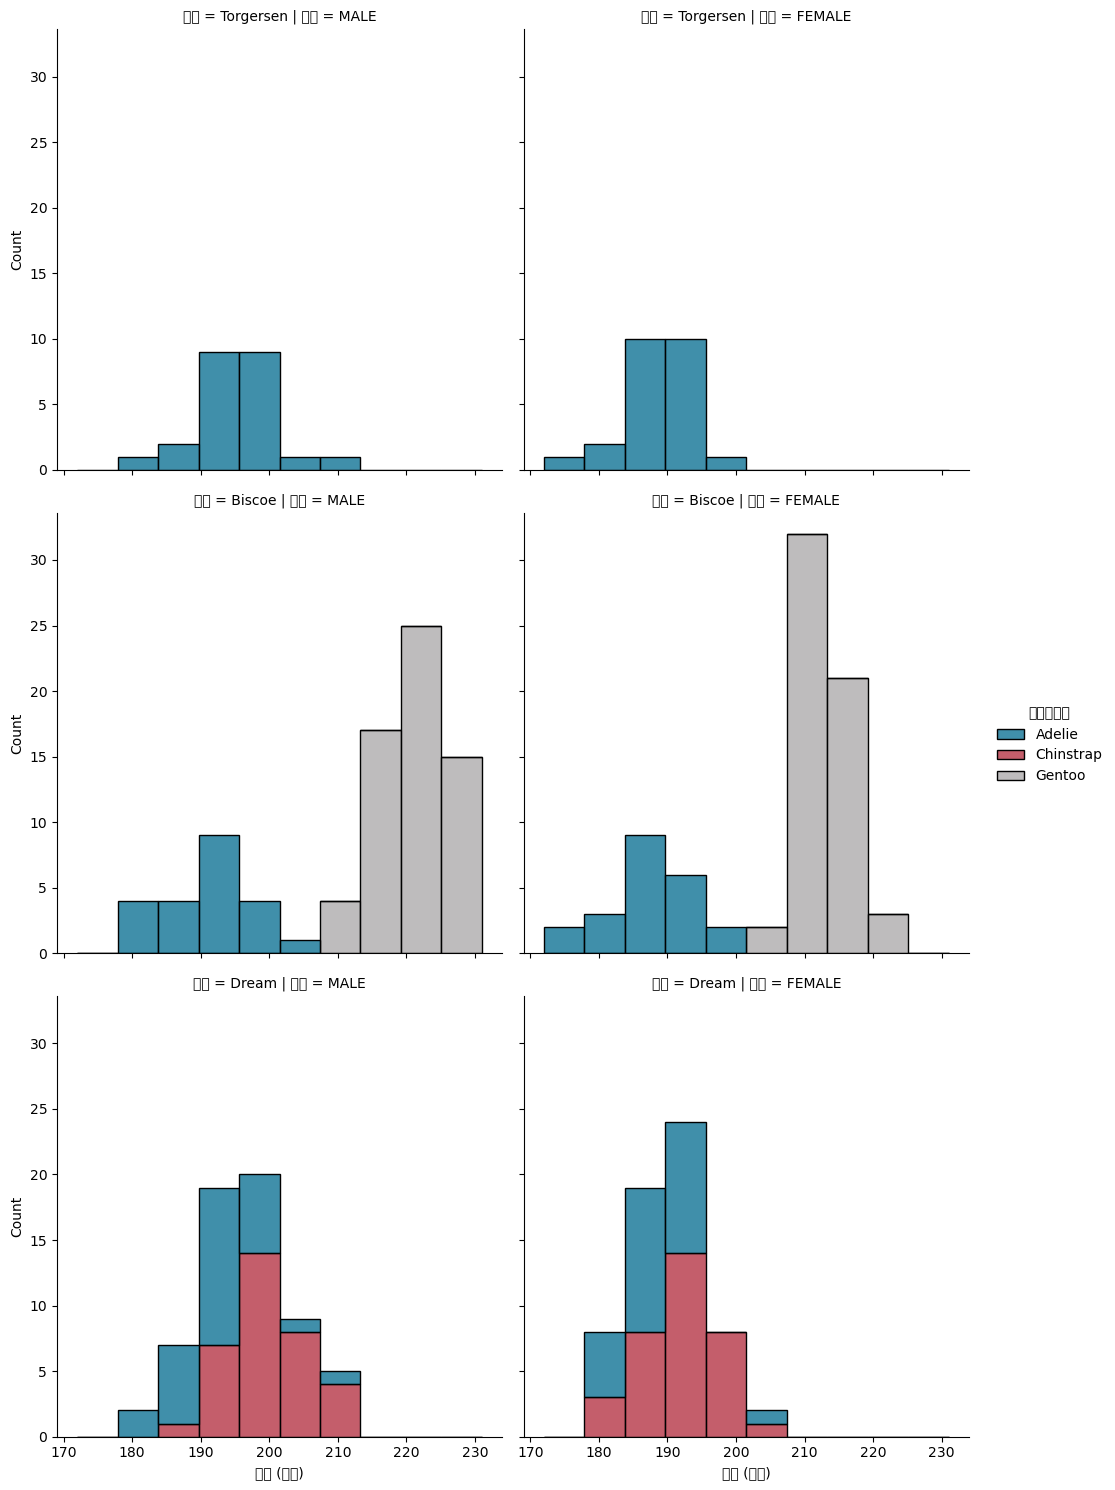

In [214]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='hist',
    hue="企鹅的种类",
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    col="性别",  #列按照"性别"分面
    row="岛屿",  #行按照"岛屿"分面
    multiple="stack")

## 8.2 核密度图（16种）
### 8.2.1 核密度图-垂直方向

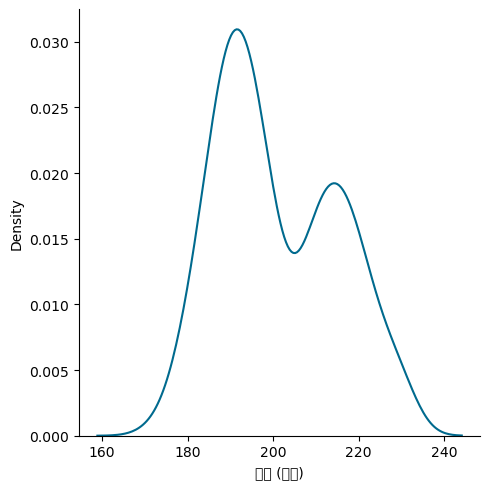

In [217]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",  #垂直核密度图
    kind='kde',  #通过kind参数指定核密度图，kind="kde"
    color="#006a8e")

### 8.2.2 核密度图-水平方向

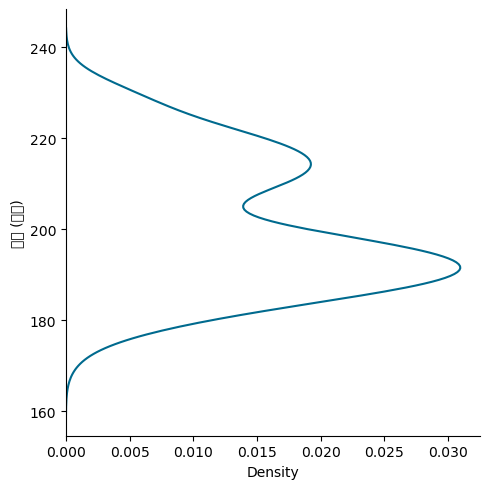

In [220]:
sns.displot(
    penguins,
    y="鳍长 (毫米)",  #水平核密度图
    kind='kde',  #通过kind参数指定核密度图，kind="kde"
    color="#006a8e")

### 8.2.3 核密度图-平滑带宽

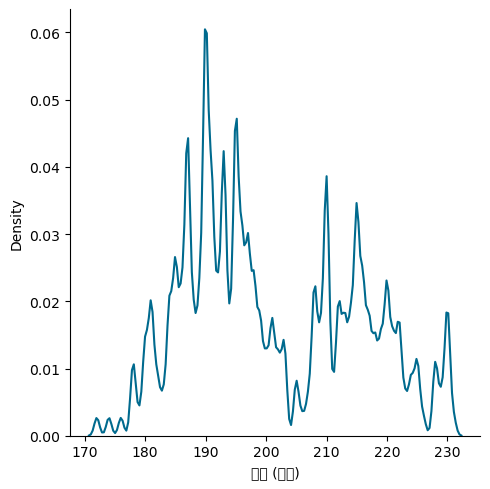

In [223]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='kde',
    bw_adjust=0.1,  # 平滑带宽很窄
    color="#006a8e")

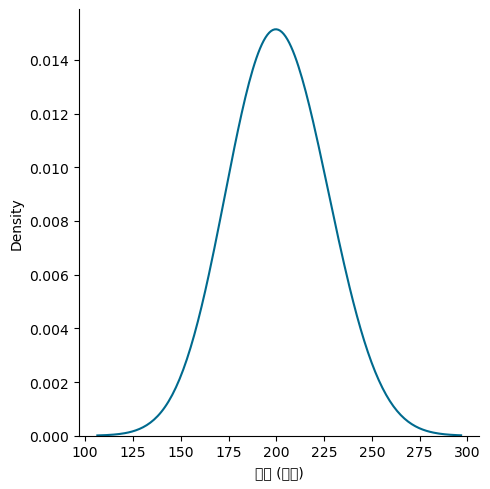

In [225]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='kde',
    bw_adjust=5,  # 平滑带宽很宽
    color="#006a8e")

### 8.2.4 核密度图-曲线裁剪

Text(0.5, 1.0, 'clip区间：(180, 220)')

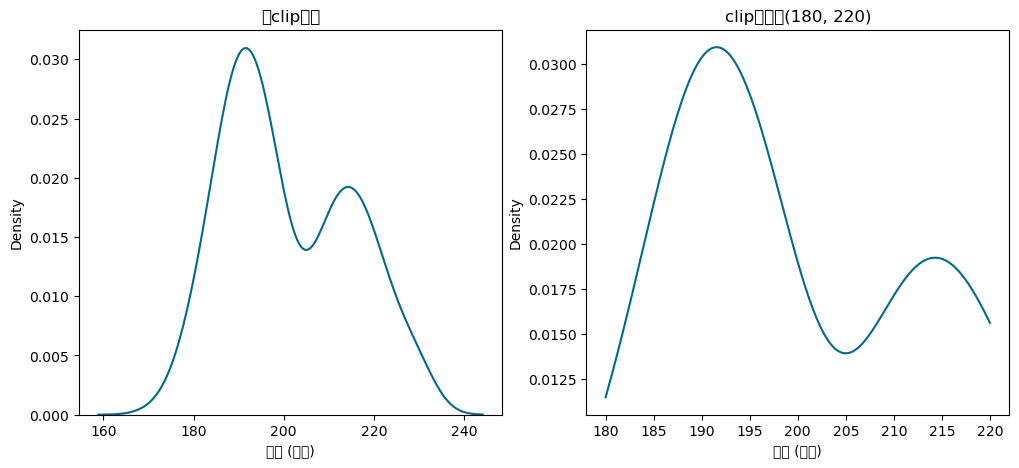

In [228]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.kdeplot(data=penguins, x="鳍长 (毫米)", ax=axes[0], color="#006a8e")
axes[0].set_title("无clip区间")

sns.kdeplot(
    data=penguins,
    x="鳍长 (毫米)",
    ax=axes[1],
    clip=(180, 220),  #设置核密度图显示范围
    color="#006a8e")
axes[1].set_title("clip区间：(180, 220)")

### 8.2.5 核密度图-曲线延伸

Text(0.5, 1.0, ' cut=20')

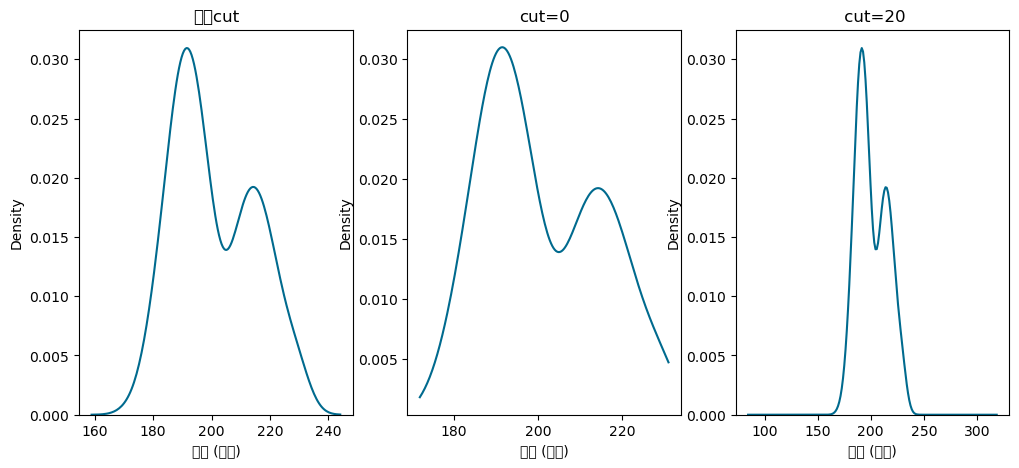

In [231]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
sns.kdeplot(
    data=penguins,
    x="鳍长 (毫米)",
    cut=3,  #默认cut=3
    ax=axes[0],
    color="#006a8e")
axes[0].set_title("默认cut")

sns.kdeplot(
    data=penguins,
    x="鳍长 (毫米)",
    cut=0,  #cut=0
    ax=axes[1],
    color="#006a8e")
axes[1].set_title("cut=0")

sns.kdeplot(
    data=penguins,
    x="鳍长 (毫米)",
    cut=20,  #cut=20
    ax=axes[2],
    color="#006a8e")
axes[2].set_title(" cut=20")

### 8.2.6 核密度图-线下填充

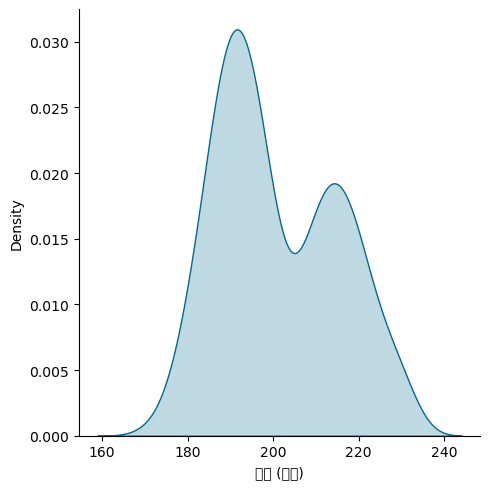

In [234]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='kde',
    fill=True,  # 填充密度曲线下的区域
    color="#006a8e")

### 8.2.7 分组核密度图-图层叠加

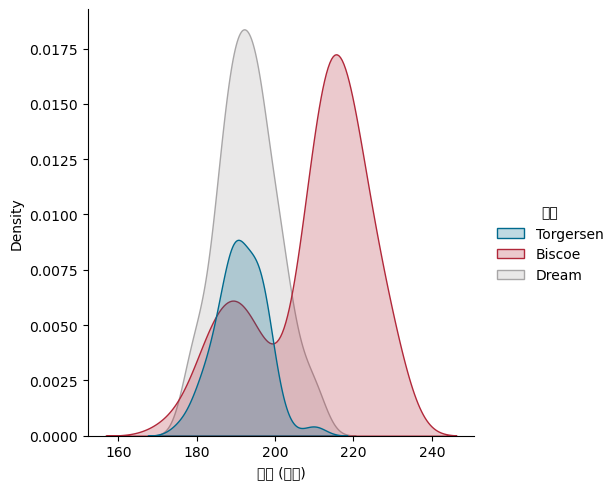

In [237]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='kde',
    hue="岛屿",  #按照变量"岛屿"分组
    fill=True,
    multiple="layer",  #"layer"设置图层叠加
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
)

### 8.2.8 分组核密度图-堆积叠加

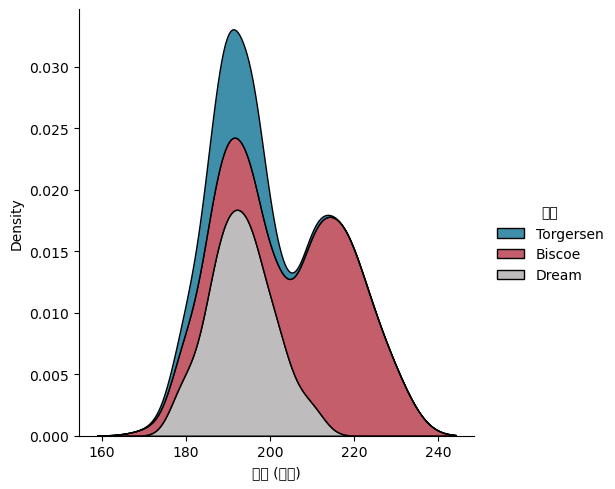

In [240]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='kde',
    hue="岛屿",
    fill=True,
    multiple="stack",  #"stack"设置堆积叠加
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
)


### 8.2.9 分组核密度图-百分比叠加

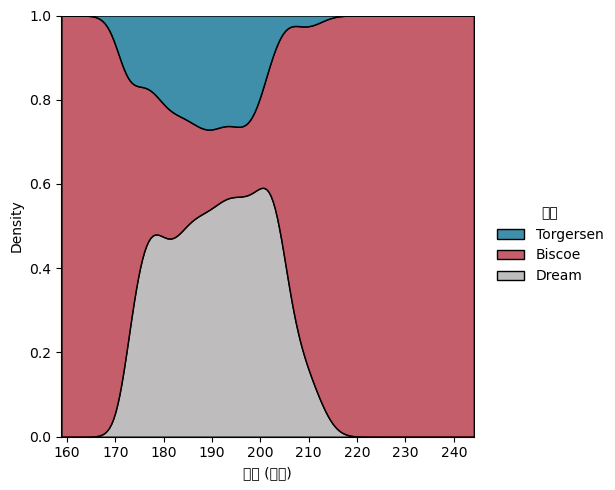

In [243]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='kde',
    hue="岛屿",
    fill=True,
    multiple="fill",  #"fill"设置百分比叠加
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
)

### 8.2.10 双变量核密度图-等值线图

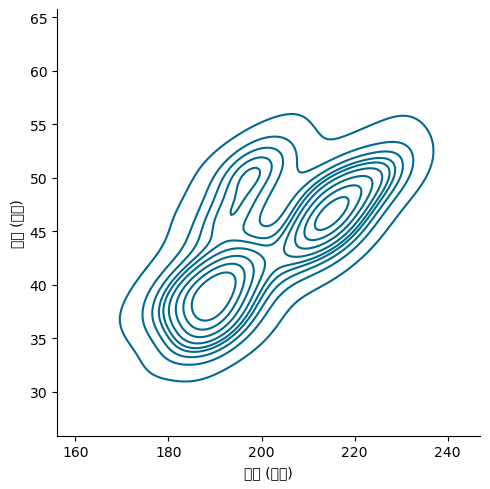

In [246]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",  #指定第二个变量
    kind='kde',
    color="#006a8e")

### 8.2.11 双变量核密度图-填充

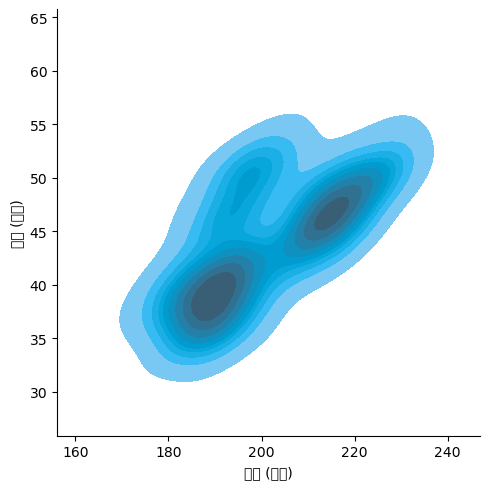

In [249]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    kind='kde',
    fill=True,  #填充
    color="#006a8e")

### 8.2.12 双变量核密度图-填充+分组

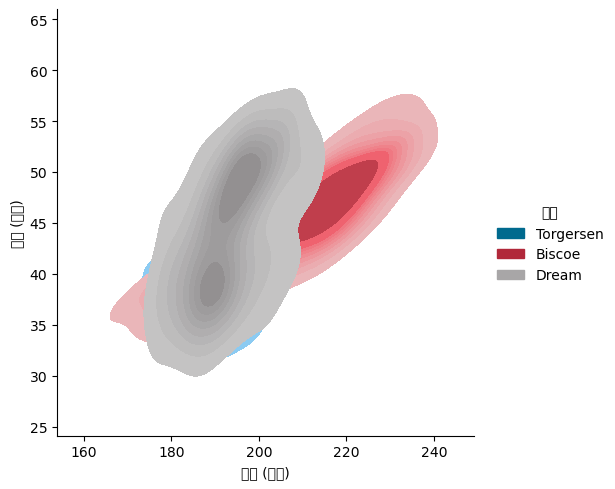

In [252]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    kind='kde',
    fill=True,  #开启填充
    hue="岛屿",  #分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

### 8.2.13 双变量核密度图-不填充+分组

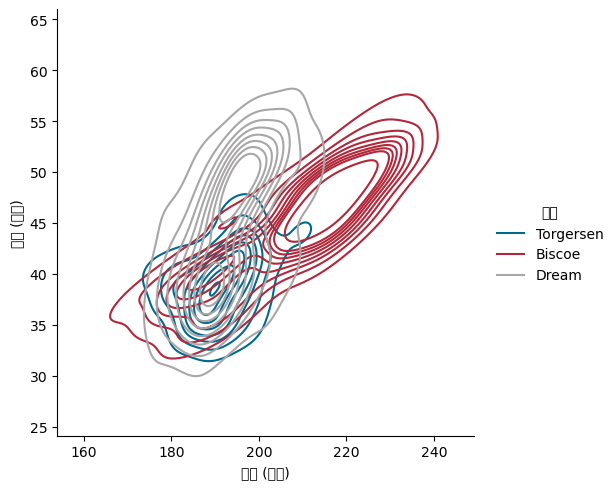

In [255]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    kind='kde',
    fill=False,  #关闭填充
    hue="岛屿", #分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

### 8.2.14 双变量核密度图-轮廓数量

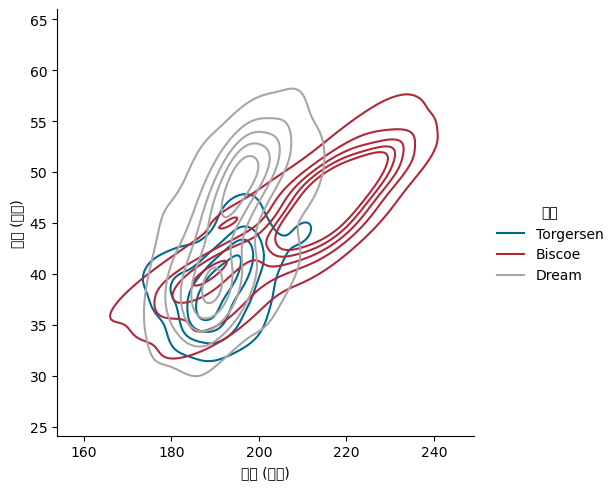

In [258]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    kind='kde',
    fill=False, 
    hue="岛屿", 
    levels=6,  #设置轮廓的数量，默认是10 
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

### 8.2.15 双变量核密度图-等比例水平

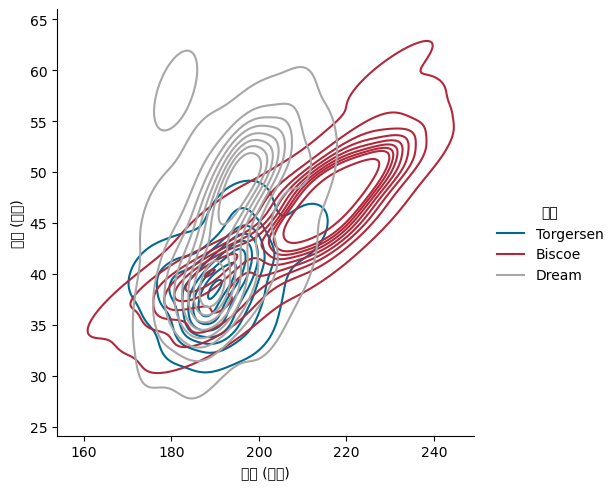

In [261]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    kind='kde',
    fill=False,
    hue="岛屿",
    thresh=0.01,  #等值线的最低等比例水平，默认为0.05
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

### 8.2.16 核密度图-按行列分面多子图

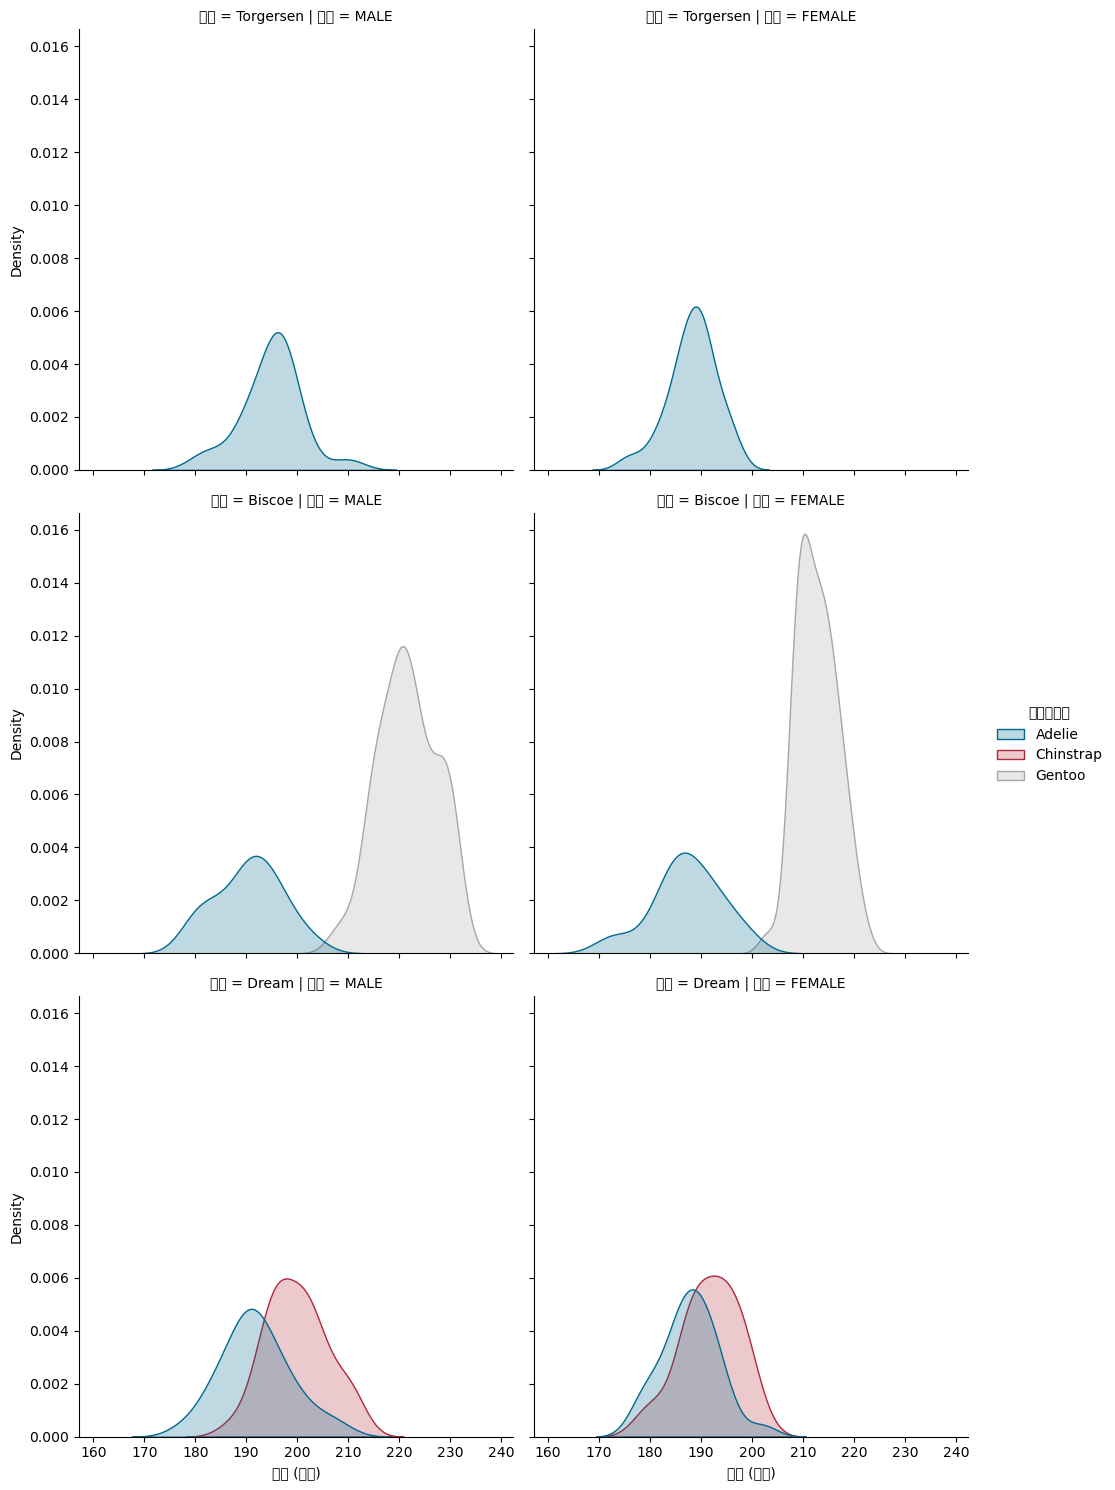

In [264]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    kind='kde',
    hue="企鹅的种类",
    fill=True,
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    col="性别",  #列按照"性别"分面
    row="岛屿",  #行按照"岛屿"分面
    multiple="layer")

## 8.3 累积曲线图（6种）

### 8.3.1 累积曲线图-垂直方向

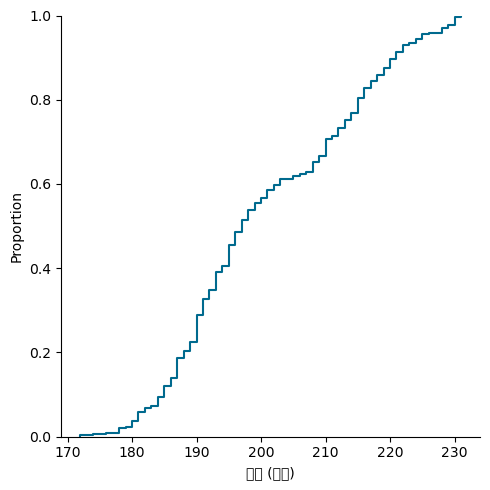

In [267]:
sns.displot(
    data=penguins,
    x="鳍长 (毫米)",  # 设置垂直方向
    kind="ecdf",
    color="#006a8e")

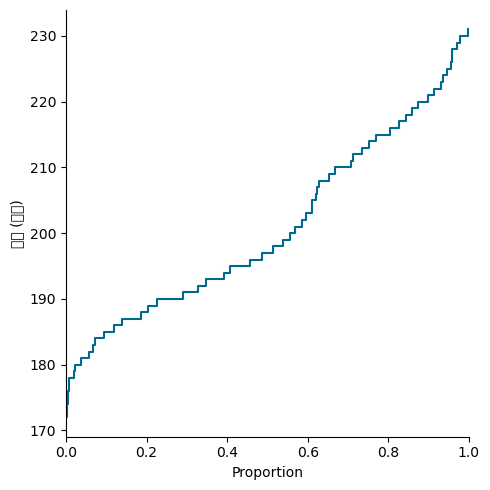

In [269]:
sns.displot(
    data=penguins,
    y="鳍长 (毫米)",  # 设置水平方向
    kind="ecdf",
    color="#006a8e")

### 8.3.3 累积曲线图-数据统计方式

### 8.3.4 累积曲线图-分组

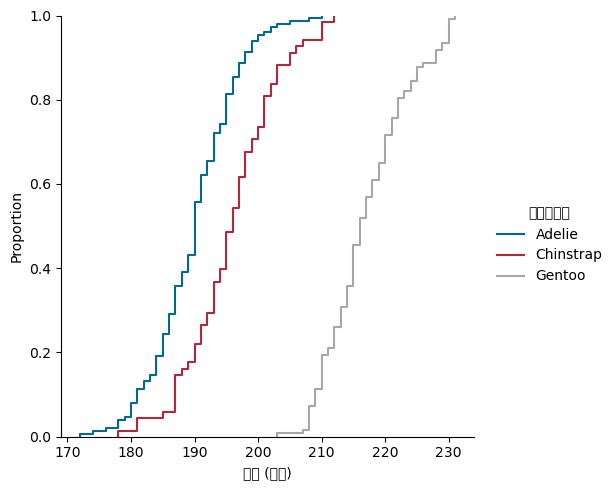

In [281]:
sns.displot(data=penguins,
            x="鳍长 (毫米)",
            hue="企鹅的种类", # hue设置分组
            kind="ecdf",
            palette=["#006a8e", "#b1283a", "#a8a6a7"])

### 8.3.5 累积曲线图-补集累积分布函数

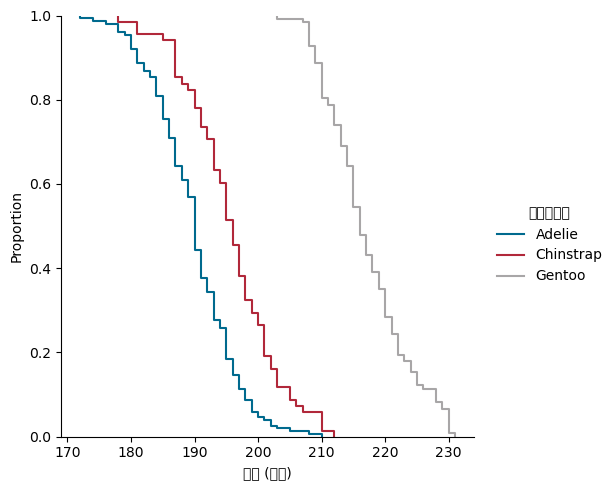

In [284]:
sns.displot(
    data=penguins,
    x="鳍长 (毫米)",
    hue="企鹅的种类",
    complementary=True,  #complementary开启补集累积分布函数complementary CDF (1 - CDF)
    kind="ecdf",
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

### 8.3.6 累积曲线图-按行列分面多子图

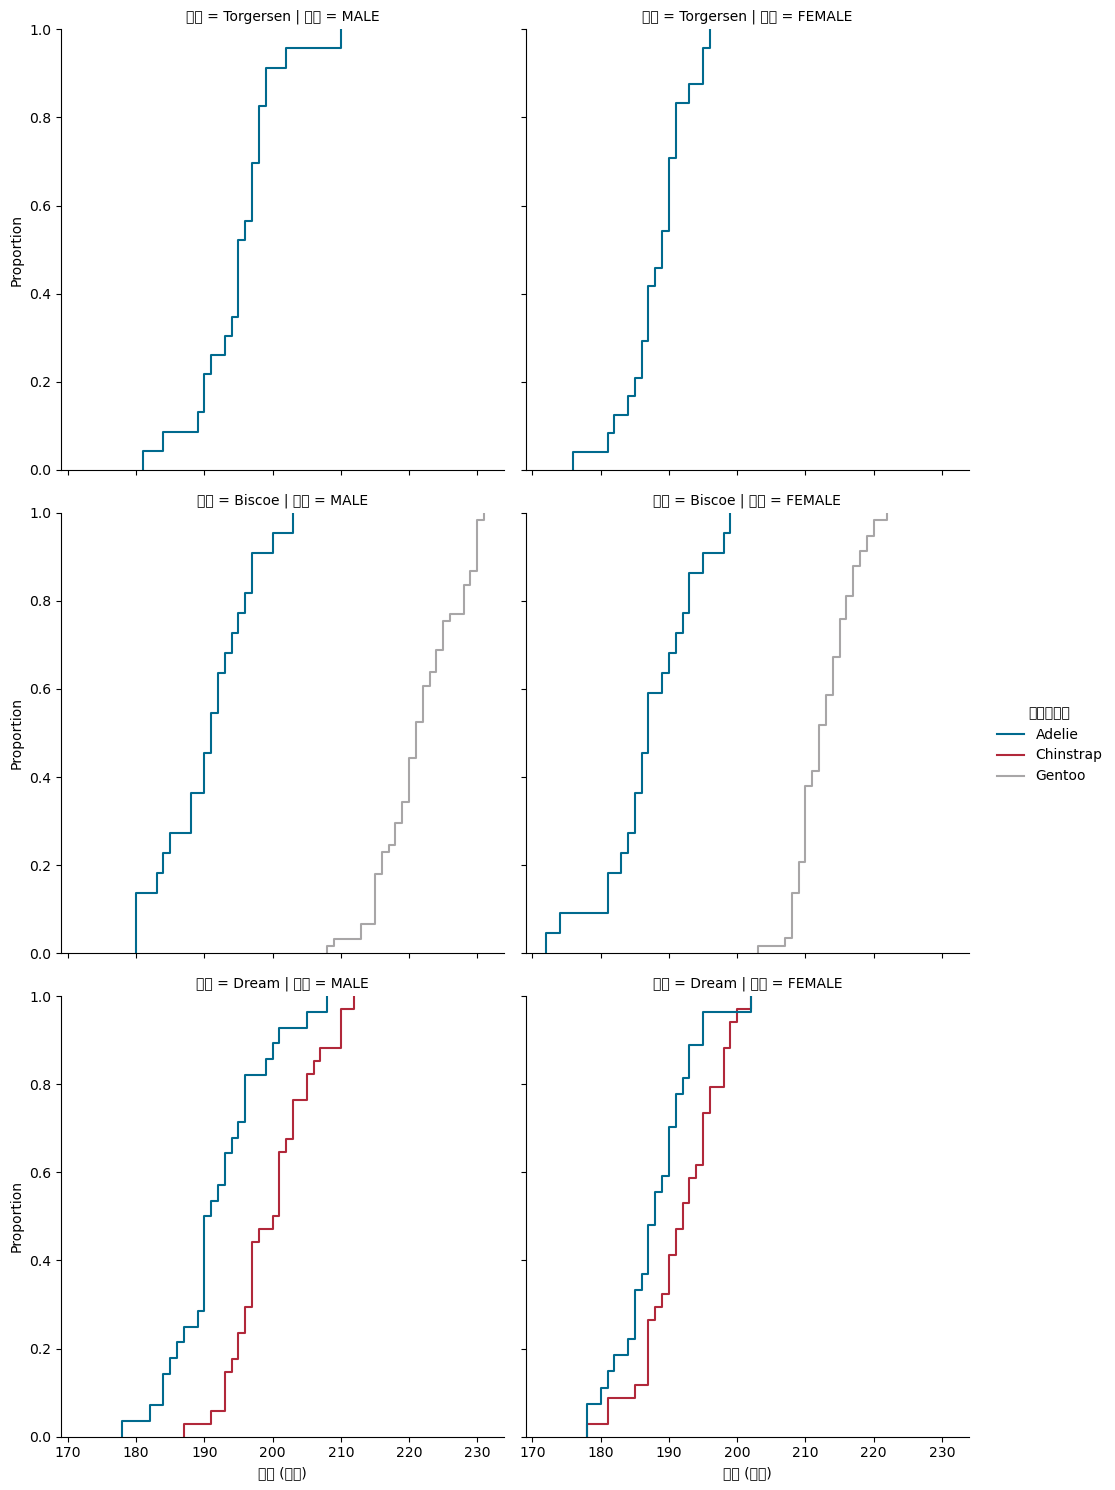

In [287]:
sns.displot(
    penguins,
    x="鳍长 (毫米)",
    hue="企鹅的种类",
    col="性别",  #列按照"性别"分面
    row="岛屿",  #行按照"岛屿"分面
    kind="ecdf",
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
)


## 8.4 轴须图（11种）
### 8.4.1 轴须图-沿着x轴

<Axes: xlabel='鳍长 (毫米)'>

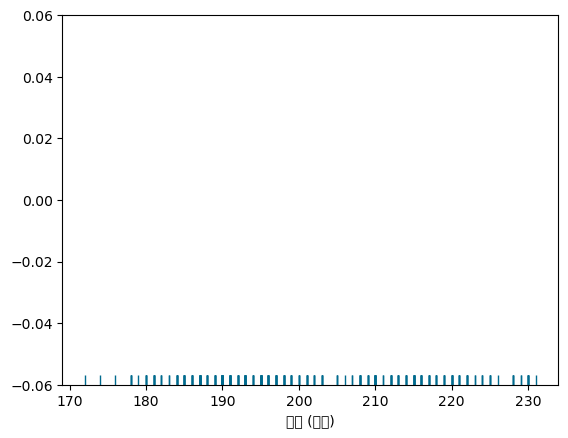

In [290]:
import warnings

# 忽略Seaborn的UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",  #x轴绘制轴须图
    color="#006a8e")

<Axes: ylabel='鳍长 (毫米)'>

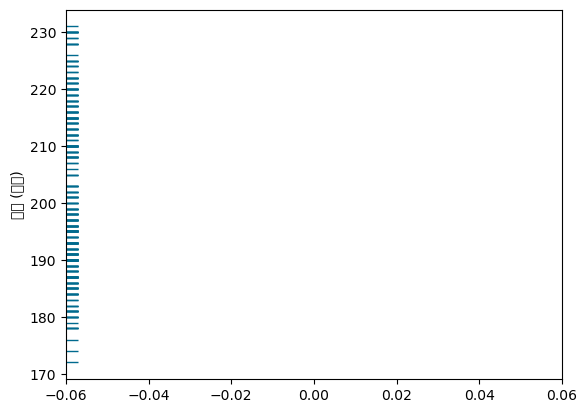

In [292]:
sns.rugplot(
    data=penguins,
    y="鳍长 (毫米)",  #y轴绘制轴须图
    color="#006a8e")

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

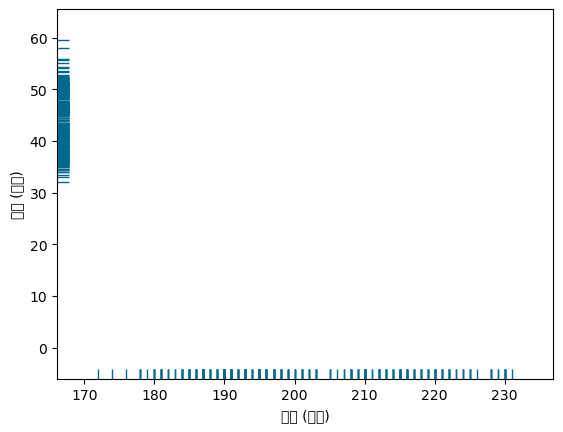

In [294]:

sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",  #x轴绘制轴须图
    y="喙长 (毫米)",  #y轴绘制轴须图
    color="#006a8e")

### 8.4.4 轴须图-轴须“身高”

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

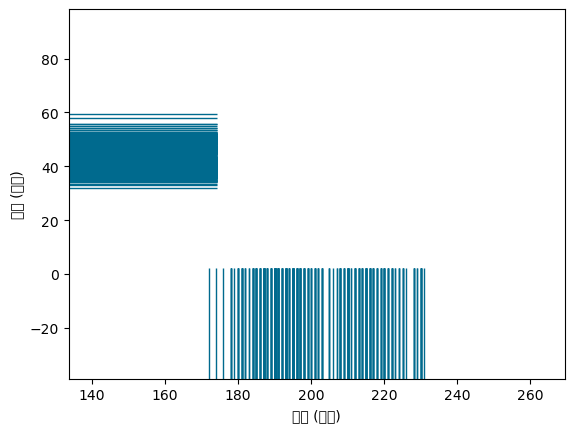

In [297]:
sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    height=0.3,  #设置轴须“身高”，这里数值是须的长度与轴高度比值
    color="#006a8e")

### 8.4.5 轴须图-轴须置于轴外

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

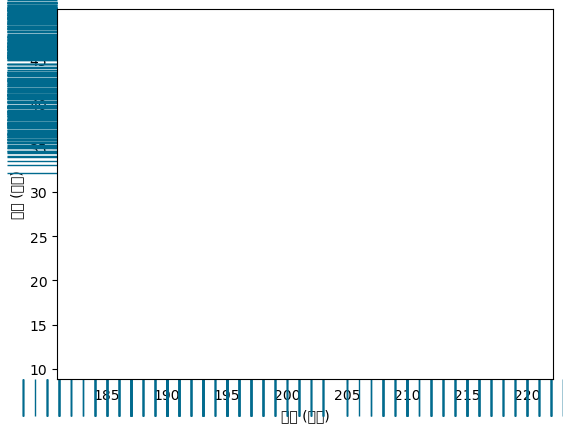

In [300]:
sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    height=-0.1,  #轴须置于轴外
    clip_on=False,  
    color="#006a8e")

### 8.4.6 轴须图-属性个性化

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

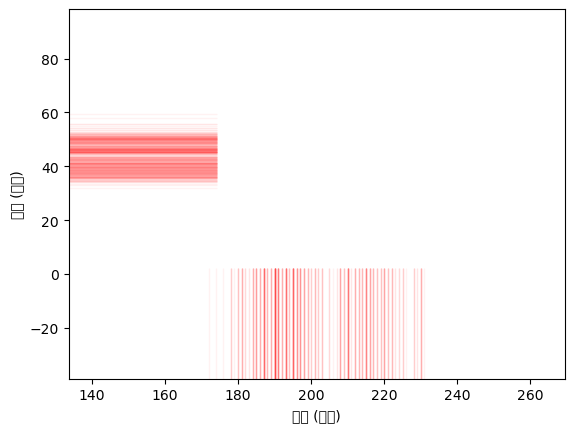

In [303]:
sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    height=0.3,
    lw=0.5,  #线宽 
    alpha=.05,  #线透明度
    color="red"  #线颜色
)


### 8.4.7 轴须图-分组

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

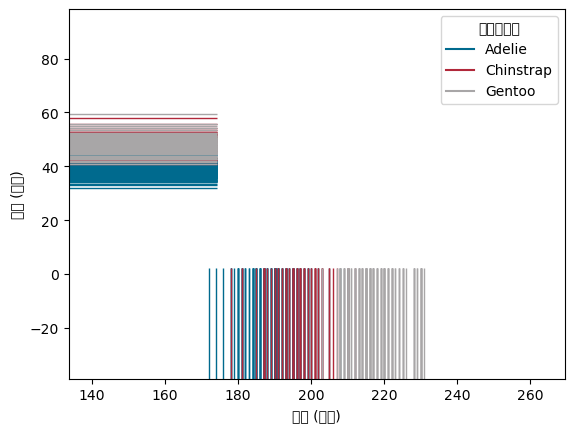

In [306]:
sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    height=0.3,
    hue="企鹅的种类",  #分组
    palette=["#006a8e", "#b1283a", "#a8a6a7"])

### 8.4.8 组合轴须图-axes-level方法

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

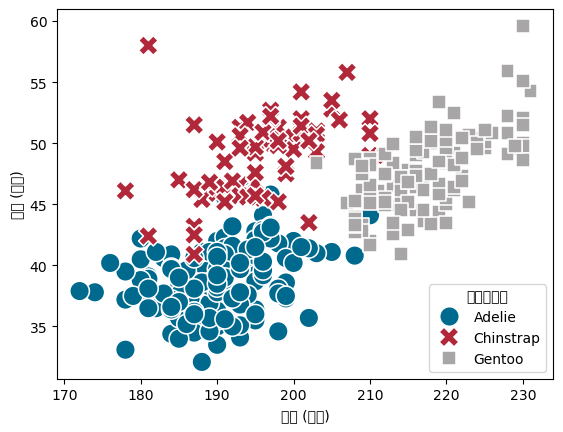

In [309]:
sns.scatterplot(#使用axes-level方法：如上文的scatterplot()、lineplot()等
    data=penguins,  
    x="鳍长 (毫米)",
    y="喙长 (毫米)",
    hue="企鹅的种类",
    style="企鹅的种类",
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    s=200)

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

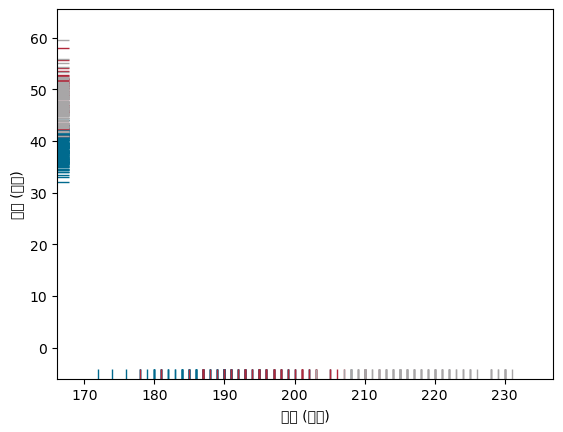

In [311]:
sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",  #x轴轴须图
    y="喙长 (毫米)",  #y轴轴须图
    hue="企鹅的种类",
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    legend=False  #关闭轴轴须图图例
)

<Axes: xlabel='鳍长 (毫米)', ylabel='Density'>

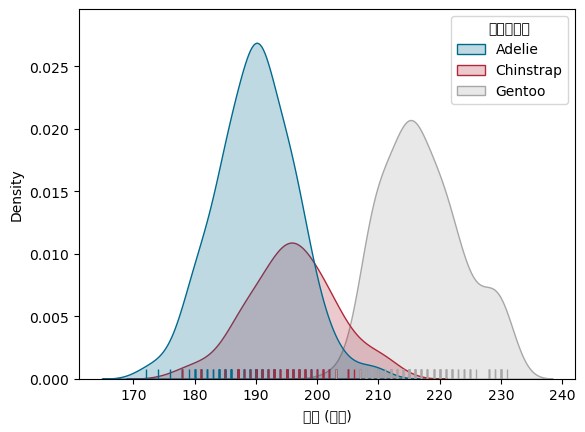

In [317]:
sns.kdeplot(#使用axes-level方法：kdeplot()
    data=penguins,  
    x="鳍长 (毫米)",  #x轴轴须图
    hue="企鹅的种类",
    fill=True,
    multiple="layer",
    palette=["#006a8e", "#b1283a", "#a8a6a7"])
sns.rugplot(data=penguins,
            x="鳍长 (毫米)",
            hue="企鹅的种类",
            palette=["#006a8e", "#b1283a", "#a8a6a7"],
            legend=False)  #关闭轴轴须图图例

### 8.4.9 组合轴须图-displot()方法

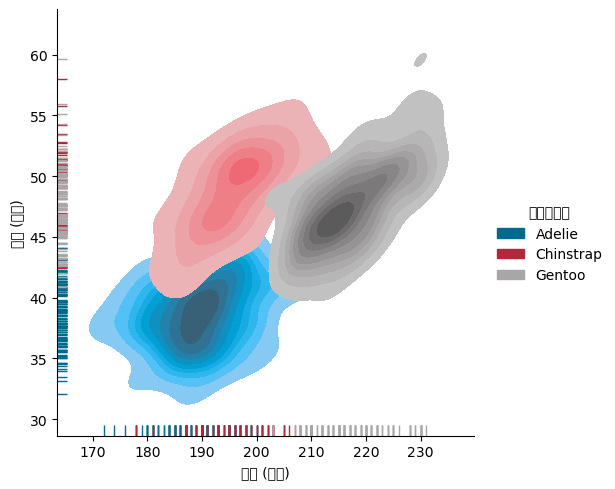

In [320]:
sns.displot(  #使用figure-level方法：displot()
    data=penguins,
    x="鳍长 (毫米)",  #x轴轴须图
    y="喙长 (毫米)",  #y轴轴须图
    hue="企鹅的种类",
    rug=True,  #开启轴须图
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    kind='kde',  #这里只能设置“hist”、“kde”、“ecdf”
    fill=True)

### 8.4.10 组合轴须图-其它figure-level方法

<Axes: xlabel='鳍长 (毫米)', ylabel='喙长 (毫米)'>

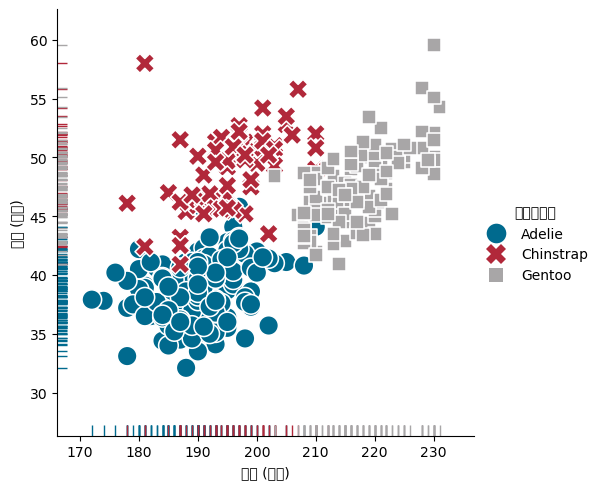

In [323]:
sns.relplot(data=penguins,#使用其它figure-level方法：上文的relplot()、后文的catplot()等
            x="鳍长 (毫米)",
            y="喙长 (毫米)",
            hue="企鹅的种类",
            style="企鹅的种类",
            palette=["#006a8e", "#b1283a", "#a8a6a7"],
            kind='scatter',
            s=200)
sns.rugplot(
    data=penguins,
    x="鳍长 (毫米)",  #x轴轴须图
    y="喙长 (毫米)",  #y轴轴须图
    hue="企鹅的种类",
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    legend=False  #关闭轴轴须图图例
)


### 8.4.11 轴须图-按行列分面多子图

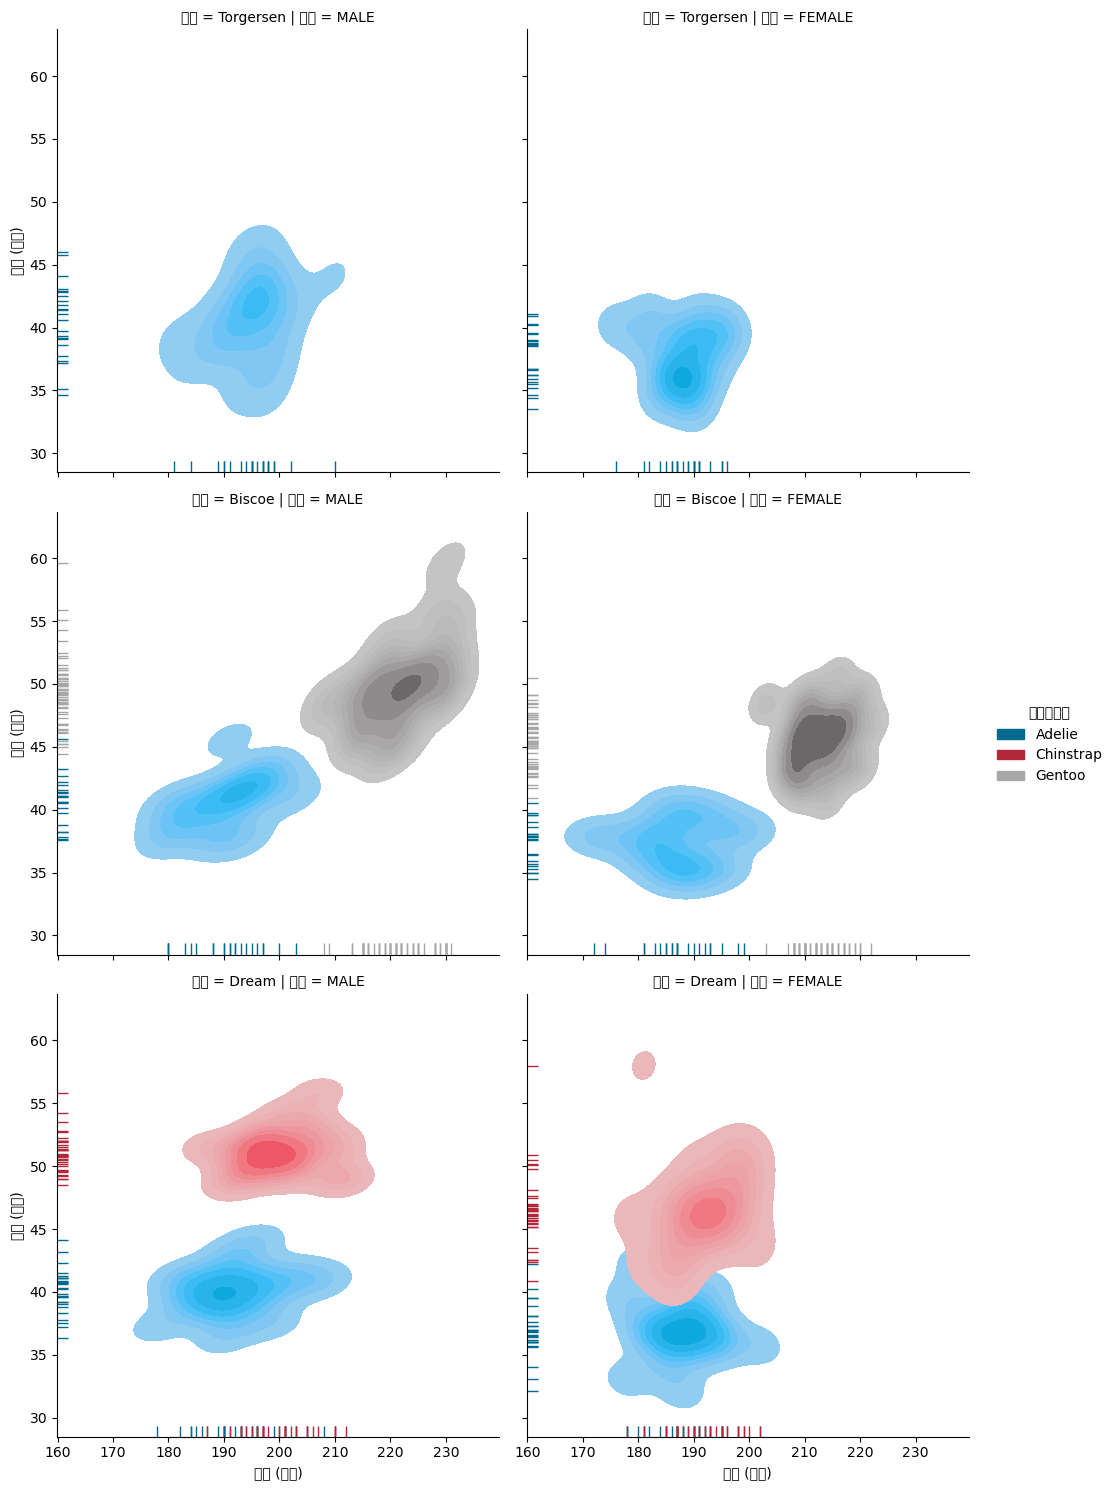

In [326]:
sns.displot(  
    data=penguins,
    x="鳍长 (毫米)",  #x轴轴须图
    y="喙长 (毫米)",  #y轴轴须图
    hue="企鹅的种类",
    rug=True,  #开启轴须图
    col="性别",  #列按照"性别"分面
    row="岛屿",  #行按照"岛屿"分面
    palette=["#006a8e", "#b1283a", "#a8a6a7"],
    kind='kde',  #这里只能设置“hist”、“kde”、“ecdf”
    fill=True)

# 9 分类关系图

## 9.1 分类分布图

### 9.1.1 箱形图（23种）

#### 9.1.1.1 箱形图-垂直方向

In [329]:
titanic = pd.read_csv("C:/Users/qinqi/Documents/01SeanBornDoc/sns_data/titanic.csv")

获救情况  船票等级      性别    年龄  同乘兄弟姐妹/配偶数量  同乘的父母/子女数量       票价 登船港口   船票等级1  \
0       0     3    male  22.0            1           0   7.2500    S   Third   
1       1     1  female  38.0            1           0  71.2833    C   First   
2       1     3  female  26.0            0           0   7.9250    S   Third   
3       1     1  female  35.0            1           0  53.1000    S   First   
4       0     3    male  35.0            0           0   8.0500    S   Third   
..    ...   ...     ...   ...          ...         ...      ...  ...     ...   
886     0     2    male  27.0            0           0  13.0000    S  Second   
887     1     1  female  19.0            0           0  30.0000    S   First   
888     0     3  female   NaN            1           2  23.4500    S   Third   
889     1     1    male  26.0            0           0  30.0000    C   First   
890     0     3    male  32.0            0           0   7.7500    Q   Third   

      乘客分类  是否成年男性 船舱号码        登船港口1 获救情况1  是否独自一人  
0      man    True  NaN  Southampton    no   False  
1    woman   False    C    Cherbourg   yes   False  
2    woman   False  NaN  Southampton   yes    True  
3    woman   False    C  Southampton   yes   False  
4      man    True  NaN  Southampton    no    True  
..     ...     ...  ...          ...   ...     ...  
886    man    True  NaN  Southampton    no    True  
887  woman   False    B  Southampton   yes    True  
888  woman   False  NaN  Southampton    no   False  
889    man    True    C    Cherbourg   yes    True  
890    man    True  NaN   Queenstown    no    True  

[891 rows x 15 columns]

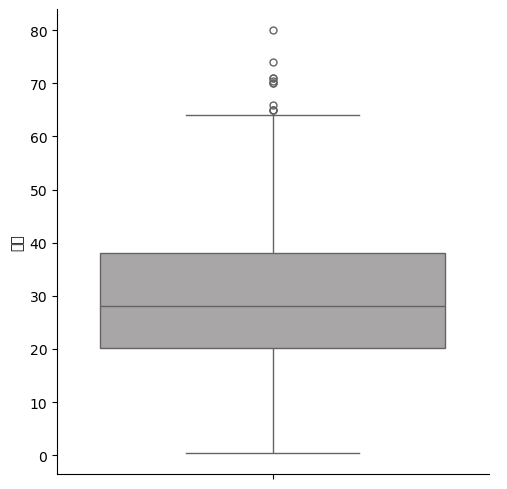

In [331]:
sns.catplot(  #使用catplot(kind="box")方法
    data=titanic,
    y="年龄",  #箱子沿着垂直方向
    kind="box",  #kind指定箱形图"box"
    color="#a8a6a7")

#### 9.1.1.2 箱形图-水平方向

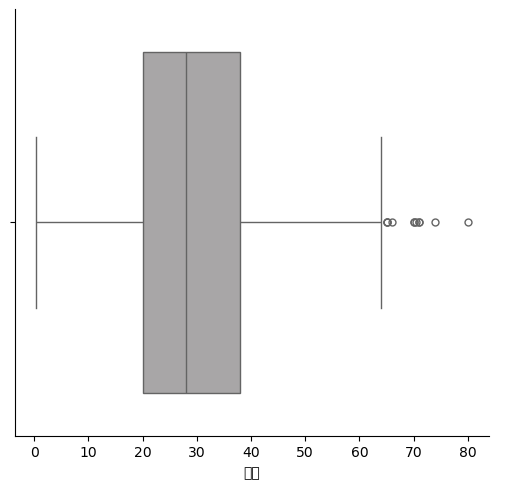

In [334]:
sns.catplot(
    data=titanic,
    x="年龄",  #箱子沿着水平方向
    kind="box",
    color="#a8a6a7")

#### 9.1.1.3 箱形图-箱子宽度

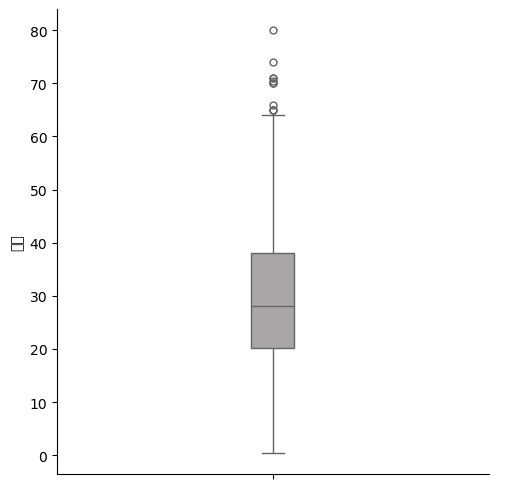

In [337]:
sns.catplot(
    data=titanic,
    y="年龄",
    width=0.1,  #设置箱子宽度
    kind="box",
    color="#a8a6a7")

#### 9.1.1.4 箱形图-箱子填充

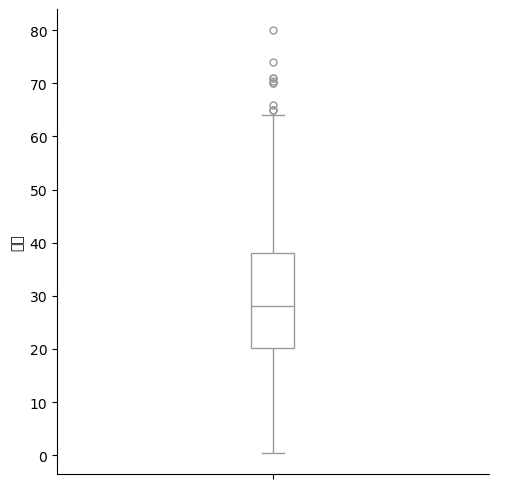

In [340]:
sns.catplot( #使用catplot(kind="box")方法
    data=titanic,
    y="年龄",  
    kind="box",  
    width=0.1,
    color="white" # "white"开启不填充
)

<Axes: ylabel='年龄'>

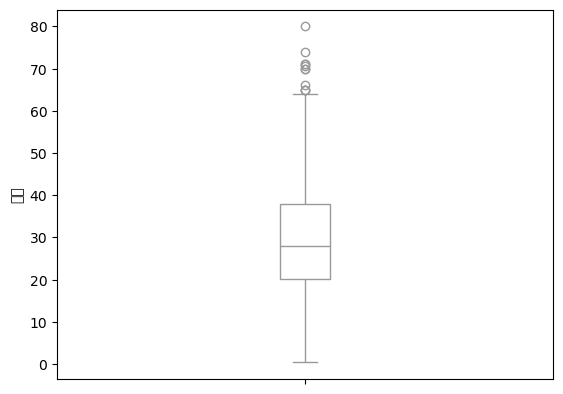

In [342]:
sns.boxplot(  #使用boxplot()方法
    data=titanic,
    y="年龄",
    color="white",  # "white"开启不填充
    width=0.1
)

#### 9.1.1.5 箱形图-异常值点个性化

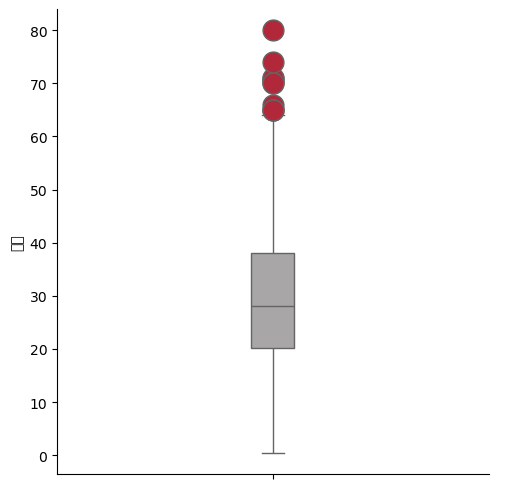

In [345]:
sns.catplot(
    data=titanic,
    y="年龄",
    fliersize=15,  #设置异常值点大小
    flierprops={  #异常值点属性个性化
        'marker': 'o',  #点形状
        'markerfacecolor': '#b1283a',  #点填充色
        'color': '#006a8e',  #点外廓颜色
    },
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.6 箱形图-关闭异常值

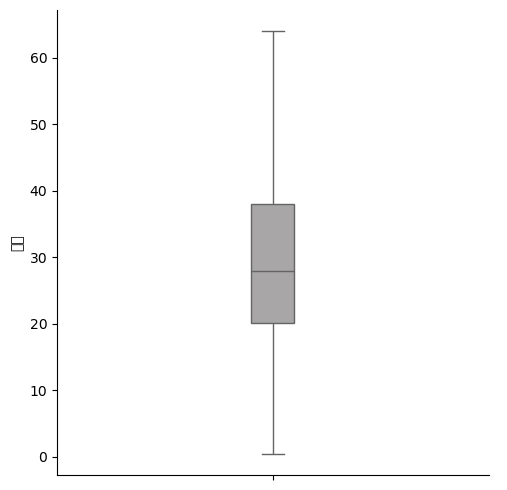

In [348]:
sns.catplot(
    data=titanic,
    y="年龄",
    showfliers=False,  #关闭异常值
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.7 箱形图-上下边缘线个性化

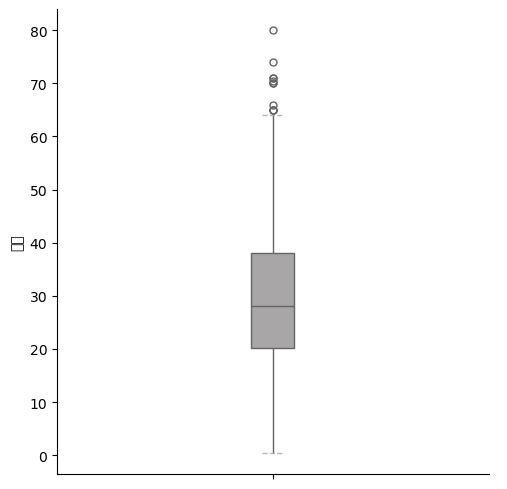

In [351]:
sns.catplot(
    data=titanic,
    y="年龄",
    capprops={  #上下边缘线属性个性化
        'linestyle': '--',  #线型
        'color': '#a8a6a7',  #线颜色
        'linewidth': 1,  #线宽
        'alpha': 0.8  #透明度
    },
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.8 箱形图-关闭上下边缘线

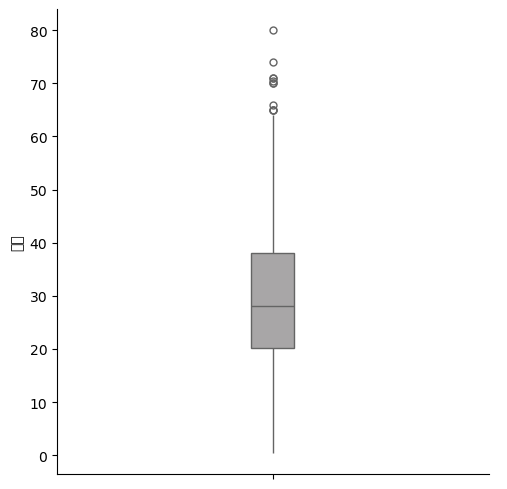

In [354]:
sns.catplot(
    data=titanic,
    y="年龄",
    showcaps=False,  #关闭上下边缘线
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.9 箱形图-须触线个性化

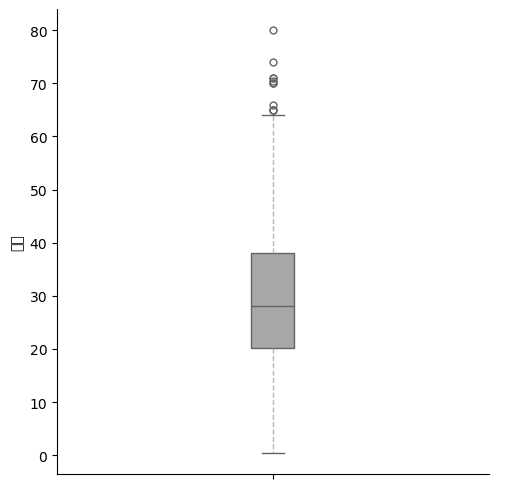

In [357]:
sns.catplot(
    data=titanic,
    y="年龄",
    whiskerprops={  #须触线属性个性化
        'linestyle': '--',  #线型
        'color': '#a8a6a7',  #线颜色
        'linewidth': 1,  #线宽
        'alpha': 0.8  #透明度
    },
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.10 箱形图-箱体个性化

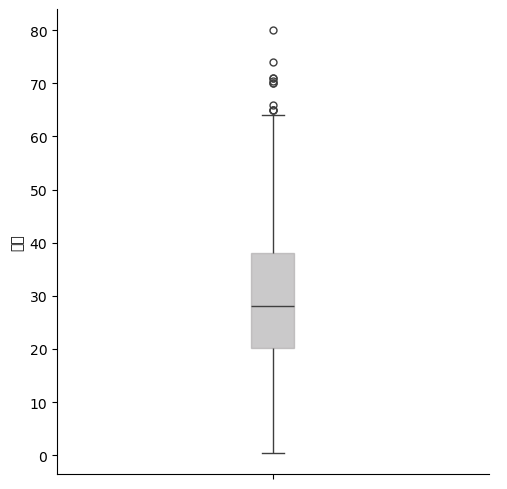

In [360]:
sns.catplot(
    data=titanic,
    y="年龄",
    boxprops={
        'facecolor': '#a8a6a7',  #箱体内部填充的颜色
        'edgecolor': '#a8a6a7',  #箱体边缘线的颜色
        'linewidth': 1,  #箱体边缘线的线宽
        'linestyle': '-',  #箱体边缘线的线型
        'alpha': 0.6  #箱体内部填充的透明度
    },
    width=0.1,
    kind="box")

#### 9.1.1.11 箱形图-添加置信区间

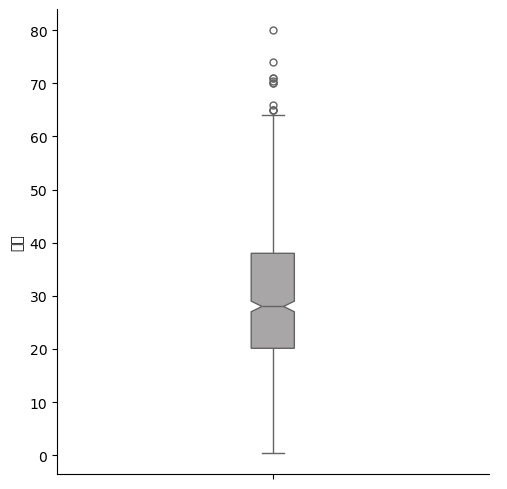

In [363]:
sns.catplot(
    data=titanic,
    y="年龄",
    notch=True,  #添加置信区间，凹口表示围绕中位数的置信区间（CI），位置默认通过高斯的渐近逼近算法计算
    bootstrap=10000,  #当设置bootstrap时，通过bootstrap随机抽样计算凹口位置，介于1000～10000
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.12 箱形图-中位数线个性化

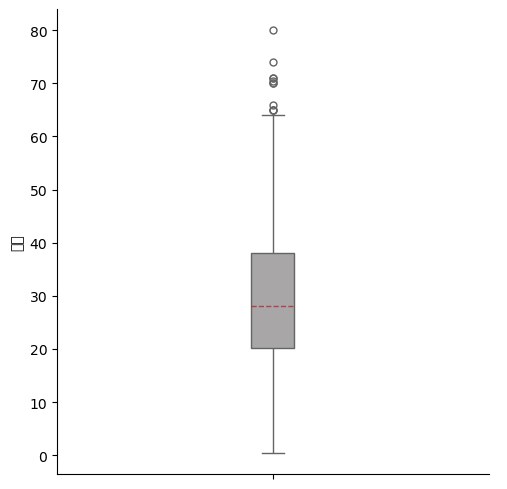

In [366]:
sns.catplot(
    data=titanic,
    y="年龄",
    medianprops={  #中位数属性个性化
        'linestyle': '--',  #线型
        'color': '#b1283a',  #线颜色
        'linewidth': 1,  #线宽
        'alpha': 0.8  #透明度
    },
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.13 箱形图-平均数个性化

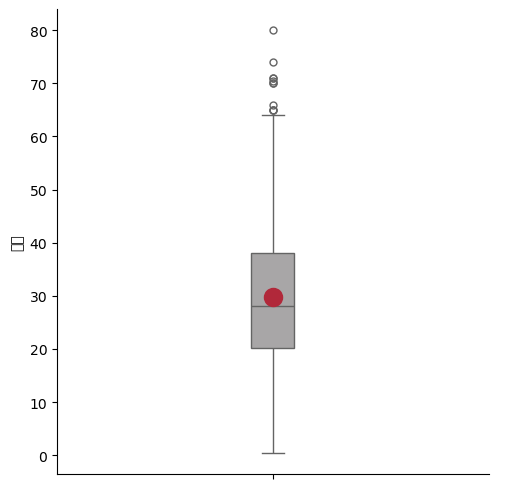

In [369]:
sns.catplot(
    data=titanic,
    y="年龄",
    showmeans=True,  #显示平均数
    meanprops={  #平均数个性化
        'marker': 'o',  #点形状
        'markerfacecolor': '#b1283a',  #点填充色
        'markeredgecolor': '#b1283a',  #点外廓颜色
        'markeredgewidth': 2,  #点外廓线宽
        'markersize': 12  #点大小
    },
    kind="box",
    width=0.1,
    color="#a8a6a7")

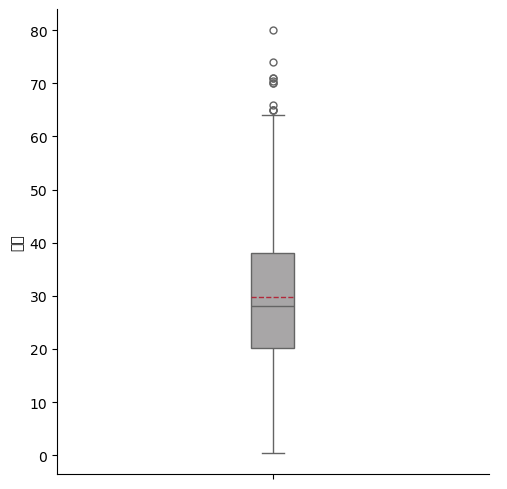

In [371]:
# #### 9.1.1.14 箱形图-平均数线个性化

# In[269]:

sns.catplot(
    data=titanic,
    y="年龄",
    showmeans=True,  #显示平均数
    meanline=True, #显示平均数线
    meanprops={  #平均数线个性化
        'linestyle': '--', #线型
        'color': '#b1283a', #线颜色
        'linewidth': 1, #线宽
    },
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.15 箱形图-所有线线宽

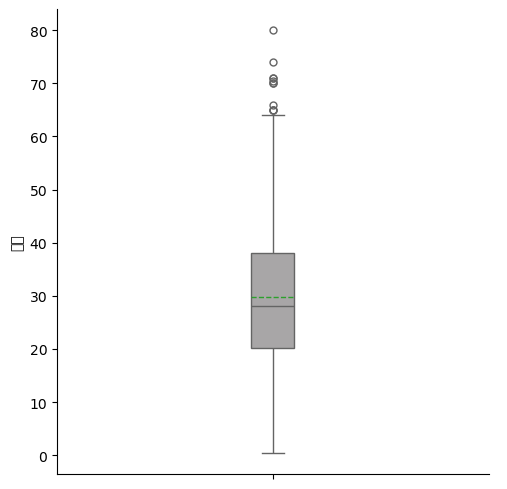

In [374]:
sns.catplot(
    data=titanic,
    y="年龄",
    showmeans=True,  
    meanline=True,  
    linewidth=1,  #设置所有线线宽
    kind="box",
    width=0.1,
    color="#a8a6a7")

#### 9.1.1.16 分组箱形图-垂直方向

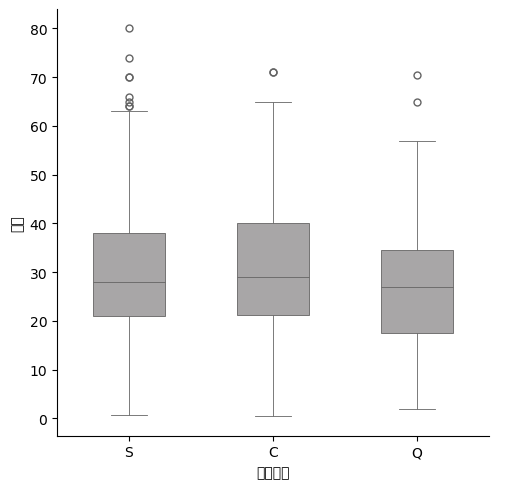

In [377]:
sns.catplot(
    data=titanic,
    x="登船港口",  #设置垂直方向
    y="年龄",
    width=0.5,
    linewidth=0.6,
    kind="box",
    color="#a8a6a7")

#### 9.1.1.17 分组箱形图-水平方向

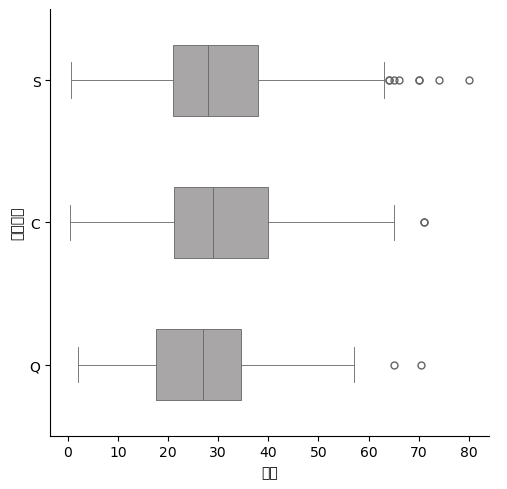

In [380]:
sns.catplot(
    data=titanic,
    y="登船港口",  #设置水平方向
    x="年龄",
    width=0.5,
    linewidth=0.6,
    kind="box",
    color="#a8a6a7")

#### 9.1.1.18 分组箱形图-箱子颜色变化

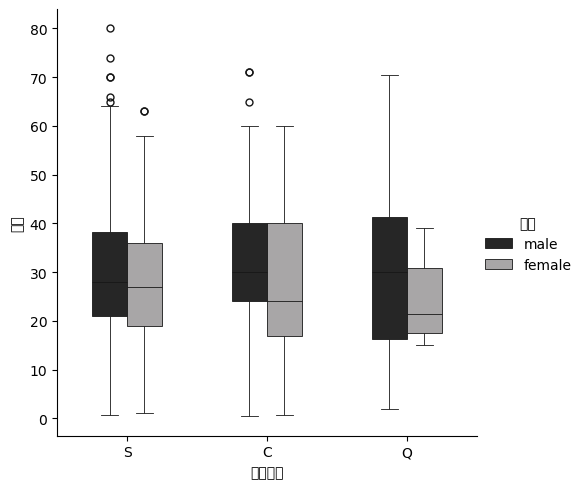

In [383]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",  #箱子颜色随"性别"变化
    width=0.5,
    linewidth=0.6,
    kind="box",
    color="#a8a6a7")

#### 9.1.1.19 分组箱形图-箱子颜色个性化

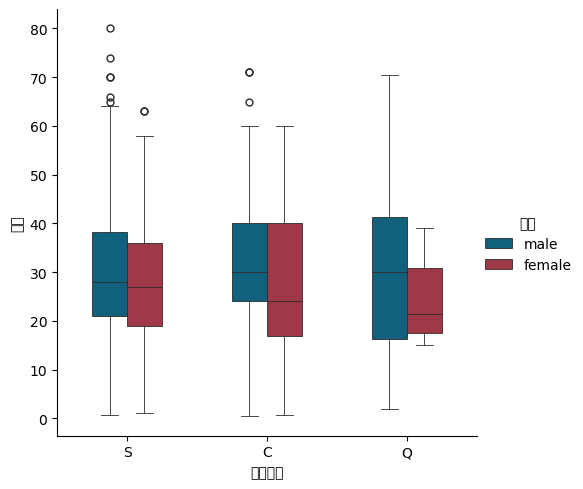

In [386]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    width=0.5,
    linewidth=0.6,
    kind="box",
    palette=["#006a8e", "#b1283a"]  #直接传入颜色色号
)

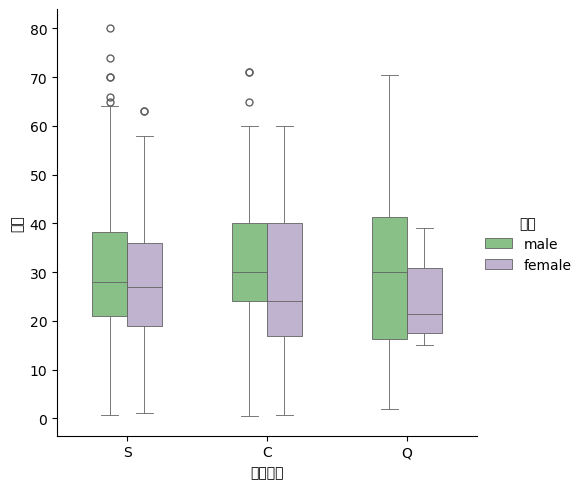

In [388]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    width=0.5,
    linewidth=0.6,
    kind="box",
    palette="Accent"  #使用章节5.3.1.4 mpl_palette中的调色盘
)

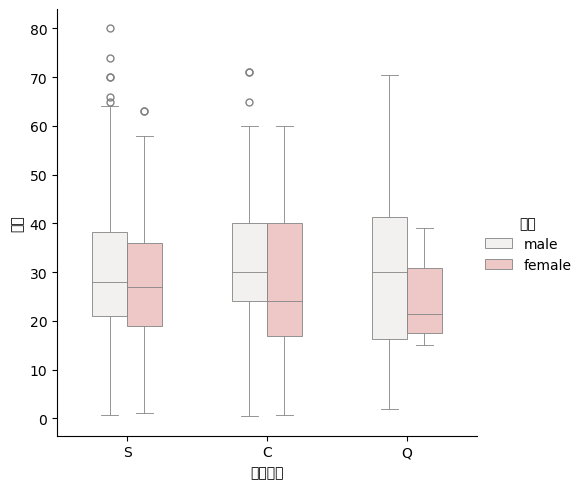

In [390]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    width=0.5,
    linewidth=0.6,
    kind="box",
    palette=sns.light_palette("red").as_hex()  #使用章节5.3.1.3 light_palette方法
)

#### 9.1.1.20 分组箱形图-颜色饱和度

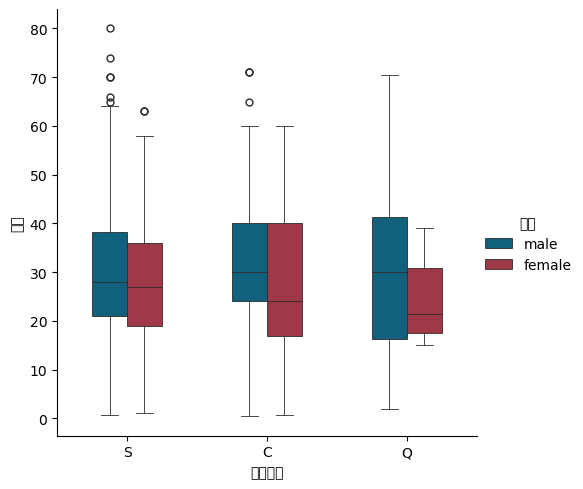

In [393]:
sns.catplot(data=titanic,
            x="登船港口",
            y="年龄",
            hue="性别",
            width=0.5,
            linewidth=0.6,
            kind="box",
            palette=["#006a8e", "#b1283a"])

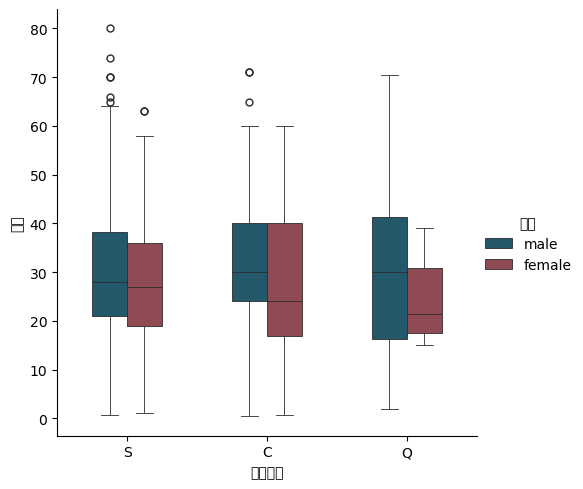

In [395]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    width=0.5,
    linewidth=0.6,
    kind="box",
    palette=["#006a8e", "#b1283a"],
    saturation=0.5,  #设置颜色饱和度
)

#### 9.1.1.21 分组箱形图-箱子间隔

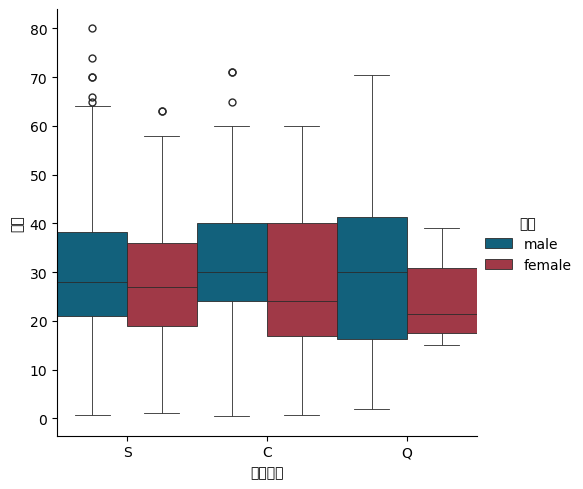

In [398]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    width=1,  #箱子原始间隔
    linewidth=0.6,
    kind="box",
    palette=["#006a8e", "#b1283a"])

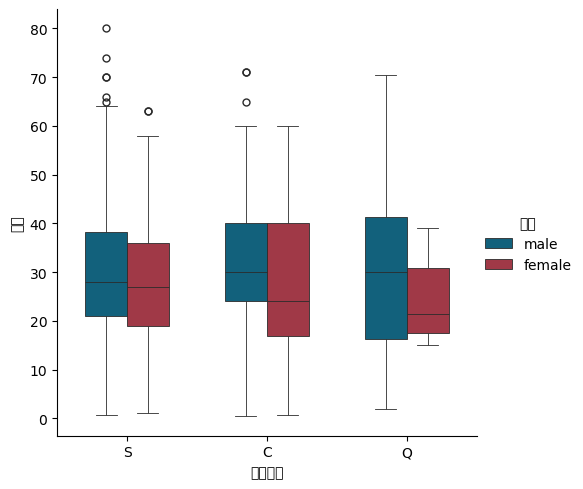

In [400]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    width=0.6,  #放大箱子间隔
    linewidth=0.6,
    kind="box",
    palette=["#006a8e", "#b1283a"])

#### 9.1.1.22 分组箱形图-箱子顺序

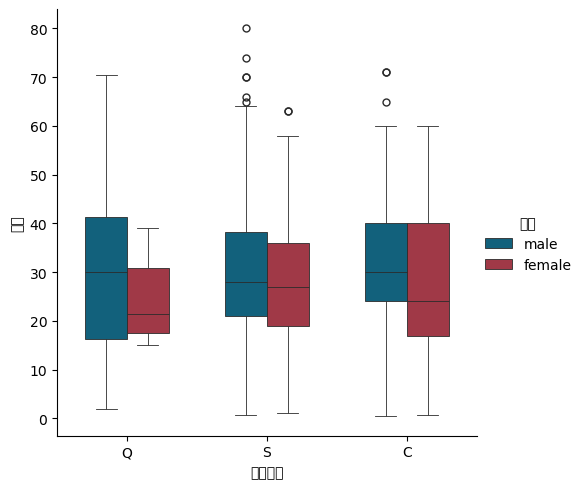

In [403]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    order=["Q","S","C"], #设置箱子顺序为"Q","S","C"
    width=0.6,  
    linewidth=0.6,
    kind="box",
    palette=["#006a8e", "#b1283a"])

#### 9.1.1.23 分组箱形图-按行按列分面多子图

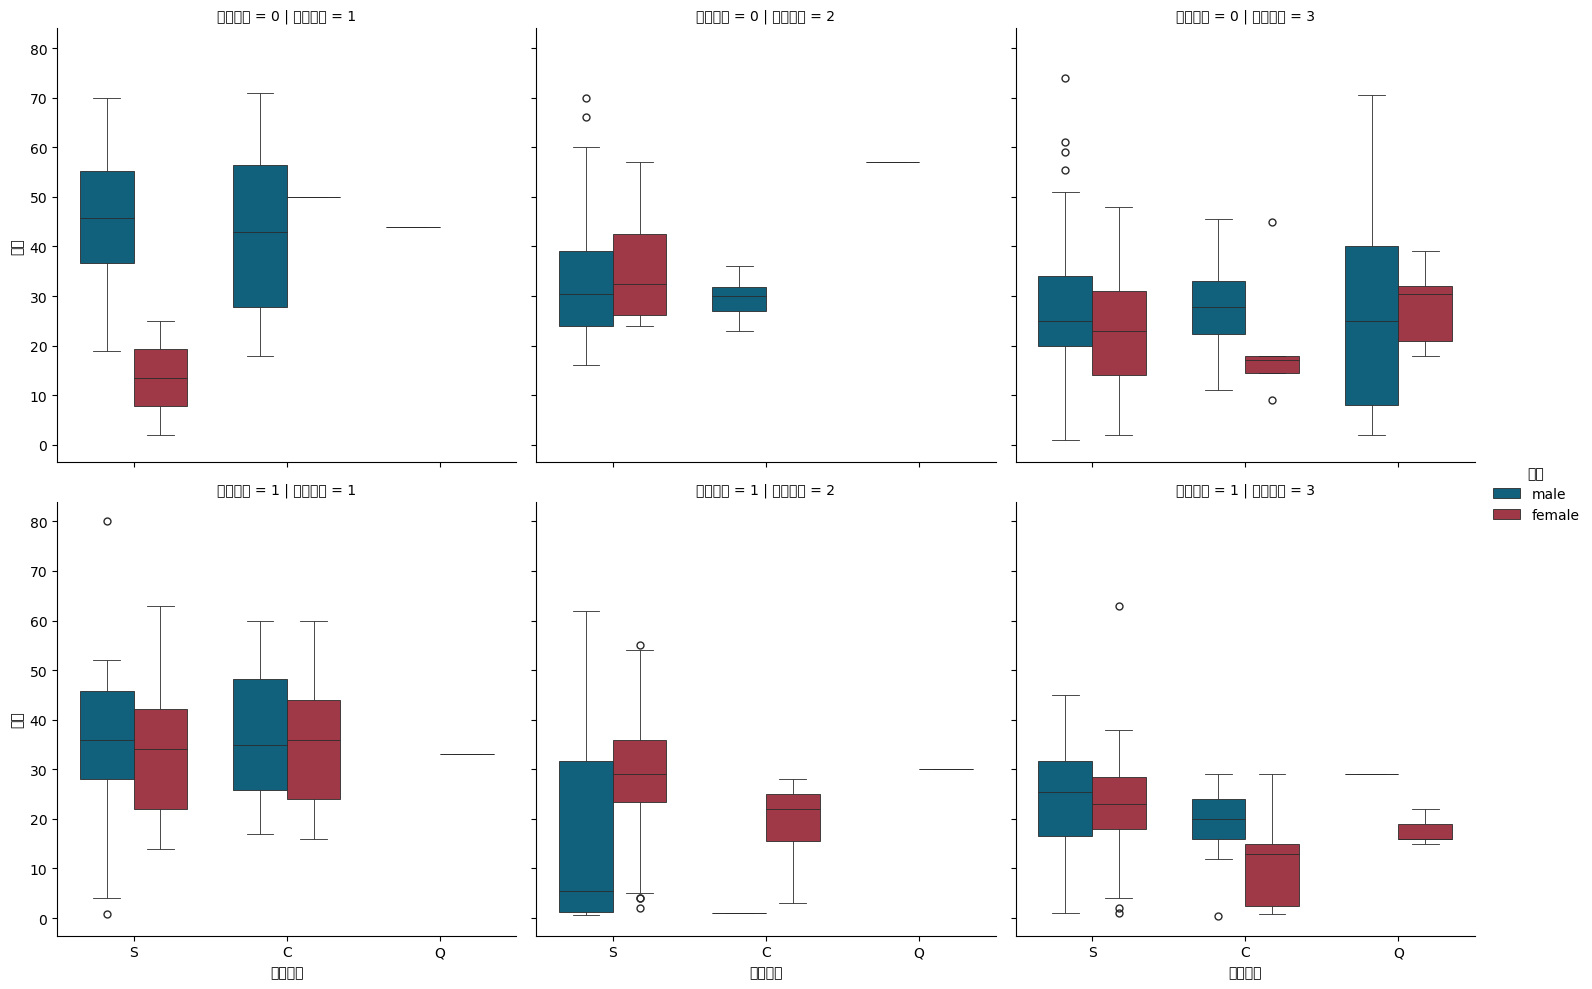

In [406]:
sns.catplot(
    data=titanic,
    x="登船港口",
    y="年龄",
    hue="性别",
    col="船票等级",  #列按照"船票等级"分面
    row="获救情况",  #行按照"获救情况"分面
    width=0.7,
    linewidth=0.6,
    kind="box",
    palette=["#006a8e", "#b1283a"])

### 9.1.2 增强箱形图（24种）

#### 9.1.2.1 增强箱形图-水平方向

#### 9.1.2.2 增强箱形图-垂直方向

In [412]:
diamonds = pd.read_csv("C:/Users/qinqi/Documents/01SeanBornDoc/sns_data/diamonds.csv")

克拉重量         切工 颜色   净度  总深度百分比  桌面比例  价格 ($)  长度 (毫米)  宽度 (毫米)  \
0      0.23      Ideal  E  SI2    61.5  55.0     326     3.95     3.98   
1      0.21    Premium  E  SI1    59.8  61.0     326     3.89     3.84   
2      0.23       Good  E  VS1    56.9  65.0     327     4.05     4.07   
3      0.29    Premium  I  VS2    62.4  58.0     334     4.20     4.23   
4      0.31       Good  J  SI2    63.3  58.0     335     4.34     4.35   
...     ...        ... ..  ...     ...   ...     ...      ...      ...   
53935  0.72      Ideal  D  SI1    60.8  57.0    2757     5.75     5.76   
53936  0.72       Good  D  SI1    63.1  55.0    2757     5.69     5.75   
53937  0.70  Very Good  D  SI1    62.8  60.0    2757     5.66     5.68   
53938  0.86    Premium  H  SI2    61.0  58.0    2757     6.15     6.12   
53939  0.75      Ideal  D  SI2    62.2  55.0    2757     5.83     5.87   

       深度 (毫米)  
0         2.43  
1         2.31  
2         2.31  
3         2.63  
4         2.75  
...        ...  
53935     3.50  
53936     3.61  
53937     3.56  
53938     3.74  
53939     3.64  

[53940 rows x 10 columns]

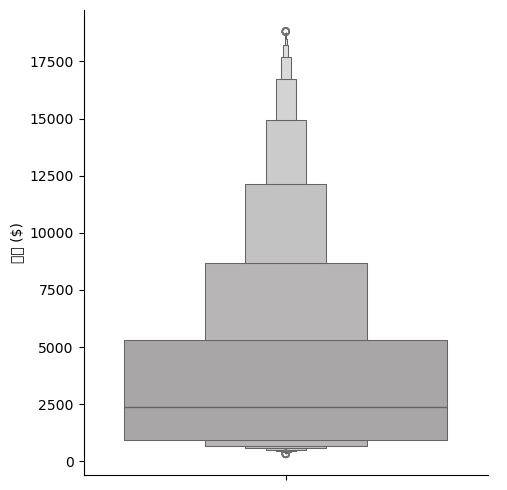

In [414]:
sns.catplot(
    data=diamonds,
    y="价格 ($)",  #垂直方向
    kind="boxen",
    color="#a8a6a7",
)

#### 9.1.2.3 增强箱形图-箱子宽度

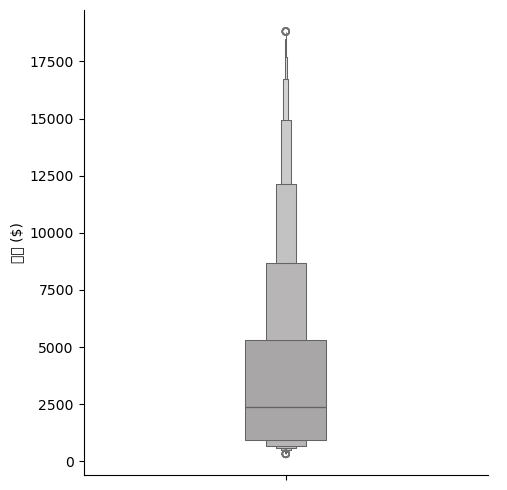

In [417]:
sns.catplot(
    data=diamonds,
    y="价格 ($)",
    width=0.2,  #设置箱子宽度
    kind="boxen",
    color="#a8a6a7")

#### 9.1.2.4 增强箱形图-箱子颜色变化

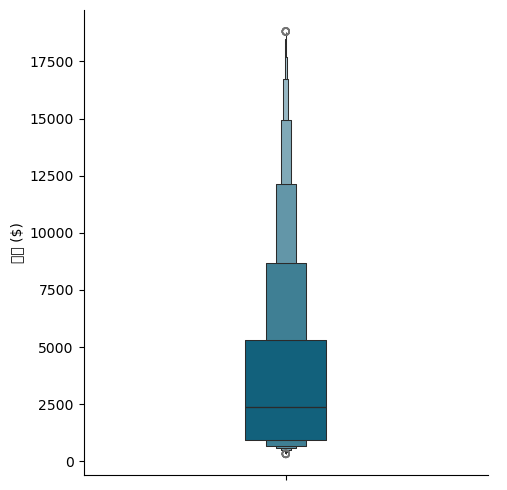

In [420]:
sns.catplot(
    data=diamonds,
    y="价格 ($)",
    width=0.2,
    kind="boxen",
    color="#006a8e",  #设置箱子颜色
)

#### 9.1.2.5 增强箱形图-箱子颜色饱和度

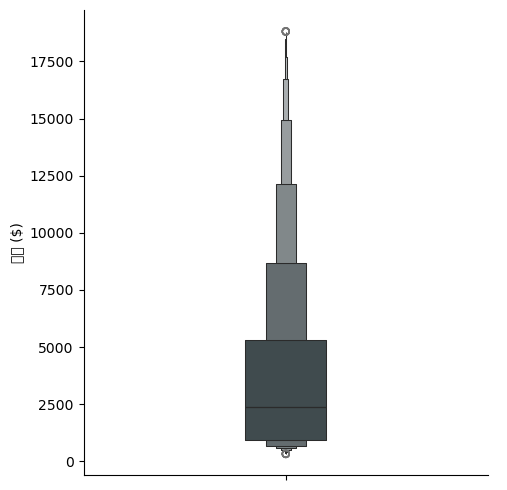

In [423]:
sns.catplot(
    data=diamonds,
    y="价格 ($)",
    width=0.2,
    kind="boxen",
    color="#006a8e",
    saturation=0.1  #设置箱子颜色饱和度
)

#### 9.1.2.6 增强箱形图-所有线线宽

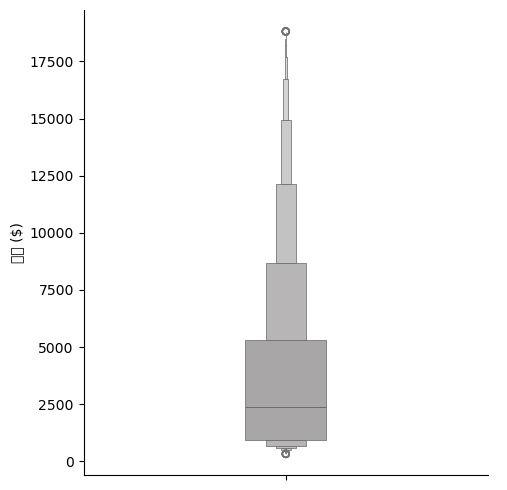

In [426]:
sns.catplot(
    data=diamonds,
    y="价格 ($)",
    width=0.2,
    linewidth=0.5,  #设置所有线线宽，注意和9.1.2.3 增强箱形图-箱子宽度比较变化
    kind="boxen",
    color="#a8a6a7")

#### 9.1.2.7 增强箱形图-关闭异常值

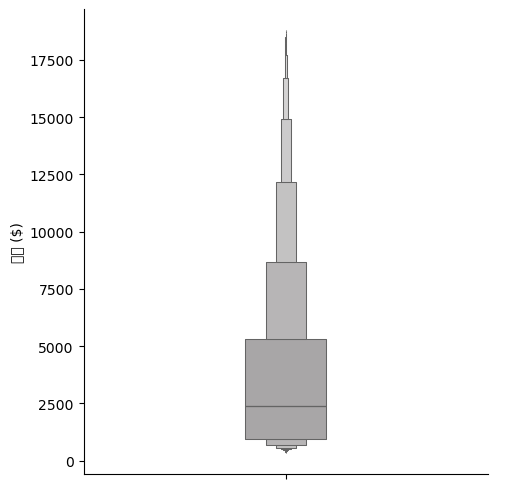

In [429]:
sns.catplot(
    data=diamonds,
    y="价格 ($)",
    width=0.2,
    showfliers=False,  #关闭异常值
    kind="boxen",
    color="#a8a6a7")

#### 9.1.2.8 增强箱形图-箱体个性化

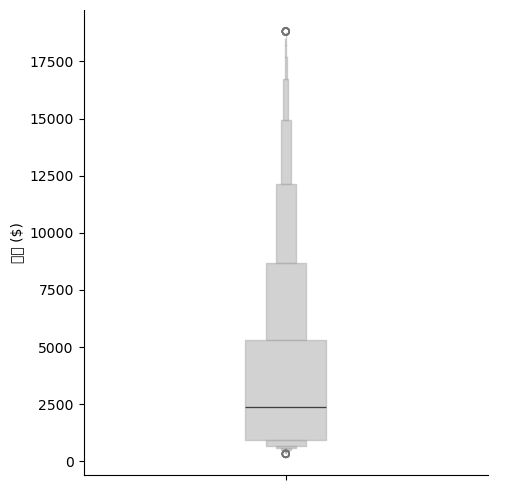

In [432]:
sns.catplot(
    data=diamonds,
    y="价格 ($)",
    width=0.2,
    box_kws={
        'facecolor': '#a8a6a7',  #箱体内部填充的颜色
        'edgecolor': '#a8a6a7',  #箱体边缘线的颜色
        'linewidth': 1,  #箱体边缘线的线宽
        'linestyle': '-',  #箱体边缘线的线型
        'alpha': 0.5  #箱体内部填充的透明度
    },
    kind="boxen",
)